<a href="https://colab.research.google.com/github/Otzirex/Home_Credit_DefaultRisk/blob/main/HRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Abrir directorio y enlistar archivos
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Riesgo_Crediticio'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Riesgo_Crediticio/POS_CASH_balance.csv
/content/drive/MyDrive/Riesgo_Crediticio/application_test.csv
/content/drive/MyDrive/Riesgo_Crediticio/application_train.csv
/content/drive/MyDrive/Riesgo_Crediticio/bureau.csv
/content/drive/MyDrive/Riesgo_Crediticio/bureau_balance.csv
/content/drive/MyDrive/Riesgo_Crediticio/previous_application.csv
/content/drive/MyDrive/Riesgo_Crediticio/HomeCredit_columns_description.csv
/content/drive/MyDrive/Riesgo_Crediticio/sample_submission.csv


In [2]:
# Importacion de bibliotecas y módulos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

Carga de archivos

In [3]:
home_des=pd.read_csv("/content/drive/MyDrive/Riesgo_Crediticio/HomeCredit_columns_description.csv",encoding='Latin-1')
pd.DataFrame(home_des)

Unnamed: 0                         Table                    Row  \
0             1  application_{train|test}.csv             SK_ID_CURR   
1             2  application_{train|test}.csv                 TARGET   
2             5  application_{train|test}.csv     NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv            CODE_GENDER   
4             7  application_{train|test}.csv           FLAG_OWN_CAR   
..          ...                           ...                    ...   
214         217     installments_payments.csv  NUM_INSTALMENT_NUMBER   
215         218     installments_payments.csv        DAYS_INSTALMENT   
216         219     installments_payments.csv     DAYS_ENTRY_PAYMENT   
217         220     installments_payments.csv         AMT_INSTALMENT   
218         221     installments_payments.csv            AMT_PAYMENT   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
214            On which installment we observe payment   
215  When the installment of previous credit was su...   
216  When was the installments of previous credit p...   
217  What was the prescribed installment amount of ...   
218  What the client actually paid on previous cred...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
214                                    NaN  
215  time only relative to the application  
216  time only relative to the application  
217                                    NaN  
218                                    NaN  

[219 rows x 5 columns]

In [4]:
pos_cash=pd.read_csv("/content/drive/MyDrive/Riesgo_Crediticio/POS_CASH_balance.csv")
pos_cash

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943             -31            48.0   
1            1715348      367990             -33            36.0   
2            1784872      397406             -32            12.0   
3            1903291      269225             -35            48.0   
4            2341044      334279             -35            36.0   
...              ...         ...             ...             ...   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                          45.0               Active       0           0  
1                          35.0               Active       0           0  
2                           9.0               Active       0           0  
3                          42.0               Active       0           0  
4                          35.0               Active       0           0  
...                         ...                  ...     ...         ...  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  
10001357                    0.0            Completed       0           0  

[10001358 rows x 8 columns]

In [5]:
app_test=pd.read_csv("/content/drive/MyDrive/Riesgo_Crediticio/application_test.csv")
#app_test

In [6]:
app_train=pd.read_csv("/content/drive/MyDrive/Riesgo_Crediticio/application_train.csv")
app_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [7]:
bur=pd.read_csv("/content/drive/MyDrive/Riesgo_Crediticio/bureau.csv")
#bur

In [ ]:
#bur_bal=pd.read_csv("../input/home-credit-default-risk/bureau_balance.csv")
#bur_bal

In [ ]:
#cc_bal=pd.read_csv("../input/home-credit-default-risk/credit_card_balance.csv")
#cc_bal

In [ ]:
#inst_pay=pd.read_csv("../input/home-credit-default-risk/installments_payments.csv")
#inst_pay

In [8]:
pre_app=pd.read_csv("/content/drive/MyDrive/Riesgo_Crediticio/previous_application.csv")
#pre_app

In [9]:
s_sub=pd.read_csv("/content/drive/MyDrive/Riesgo_Crediticio/sample_submission.csv")
#s_sub

In [43]:
#Obtener información del DF appp_train (columnas, tipos de datos y valores no nulos)
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(57)
memory usage: 286.2 MB


In [11]:
#Obtener numero de filas y columnas
app_train.shape

(307511, 122)

In [12]:
# Obtener la lista de columnas del dataframe
columnas = app_train.columns.tolist()
print(columnas)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [13]:
#Obtencion de valores nulos ppor columna
null_counts = app_train.isnull().sum().sort_values()
print(null_counts.to_string())

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_4          

In [14]:
#Calculo de estadísticas descriptivas para el Df app_train, ordenadas en función de la media en orden descendente

app_train.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

In [15]:
#Calculo de estadísticas descriptivas para las columnas de tipo objeto en el Df app_train, ordenando en función del valor más frecuente en orden descendente

app_train.describe(include='object').T.sort_values(ascending = 0,by = "top").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["freq"], color ="crimson").bar(subset = ["unique"], color ="orange").bar(subset = ["count"], color ="pink")

In [16]:
#iteracion sobre las columnas de tipo objeto y completar  los valores faltantes con la moda de cada columna
for ab in app_train.describe(include='object').columns:
    app_train[ab]=app_train[ab].fillna((app_train[ab].mode()))

In [17]:
# Iteracion sobre las columnas numéricas en el Df app_train rellenando los valores faltantes con la mediana de cada columna
for ac in app_train.describe().columns:
    app_train[ac]=app_train[ac].fillna((app_train[ac].median()))

In [18]:
#Calculo de valores nulos del Df app_test
app_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [44]:
""""Calculo de valores nulos en cada columna del Df app_test, ordenando las columnas por cantidad de valores nulos de manera
descendente y creando un nuevo Df sorted_app_test reordenando las columnas en función del orden obtenido
"""

null_cuenta = app_test.isnull().sum()
sorted_columns = null_cuenta.sort_values(ascending=False)
sorted_app_test = app_test[sorted_columns.index]
print(sorted_app_test)

       SK_ID_CURR  COMMONAREA_MODE  EMERGENCYSTATE_MODE  WALLSMATERIAL_MODE  \
0          100001           0.0203                    0                   5   
1          100005           0.0203                    2                   7   
2          100013           0.0203                    2                   7   
3          100028           0.1176                    0                   4   
4          100038           0.0203                    2                   7   
...           ...              ...                  ...                 ...   
48739      456221           0.0203                    2                   7   
48740      456222           0.0203                    2                   7   
48741      456223           0.0203                    0                   5   
48742      456224           0.0203                    0                   4   
48743      456250           0.0203                    2                   7   

       TOTALAREA_MODE  HOUSETYPE_MODE  FONDKAPREMON

In [20]:
#Itercion de las columnas de tipo objeto en el Df app_test rellenando los valores faltantes con la moda de cada columna
for ca in app_test.describe(include='object').columns:
    app_test[ca]=app_test[ca].fillna((app_test[ca].mode()))

In [22]:
#Iteracion de las columnas numéricas en el Df app_test rellenando los valores faltantes con la mediana de cada columna
for cb in app_test.describe().columns:
    app_test[cb]=app_test[cb].fillna((app_test[cb].median()))

In [23]:
#Obtención de valores nulos por columna
app_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [24]:
#Calculo de valores nulos en cada columna del DataFrame app_test
app_test.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

In [25]:
""" Iteracion sobre las columnas del Df app_train imprimiendo información sobre cada columna, la cantidad de valores únicos,
el recuento de valores para cada valor único y una línea separadora para distinguir entre las columnas
"""
for d in app_train.columns:
    print(d.capitalize())
    print('Number of Unique values:',app_train[d].nunique())
    print("Value Count of ",d.capitalize())
    print(app_train[d].value_counts())
    print("")
    print("****************************")
    print("")

Sk_id_curr
Number of Unique values: 307511
Value Count of  Sk_id_curr
100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

****************************

Target
Number of Unique values: 2
Value Count of  Target
0    282686
1     24825
Name: TARGET, dtype: int64

****************************

Name_contract_type
Number of Unique values: 2
Value Count of  Name_contract_type
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

****************************

Code_gender
Number of Unique values: 3
Value Count of  Code_gender
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

****************************

Flag_own_car
Number of Unique values: 2
Value Count of  Flag_own_car
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

****************************

Flag_own_realty
Number of Unique values: 2
Value 

In [26]:
type(app_train.columns)

pandas.core.indexes.base.Index

In [27]:
"""
creacion de dos listas para separar el DF app__train de acuerdo a los vaalores únicos mas de 100 o menos de 100
"""
e1 = []
e2 = []
for k in app_train.columns:
    if (app_train[k].nunique())<100:
        e1.append(k)
    else:
        e2.append(k)

Histogramas del conjunto de datos


<ipython-input-28-c5f931887ee9>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(15, 6))


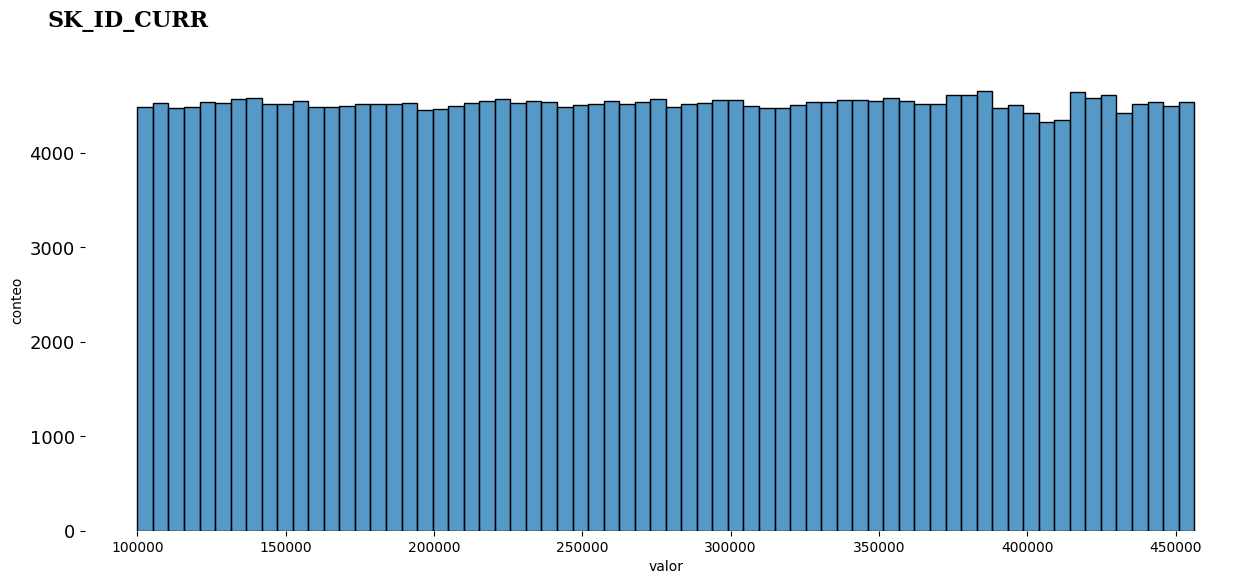

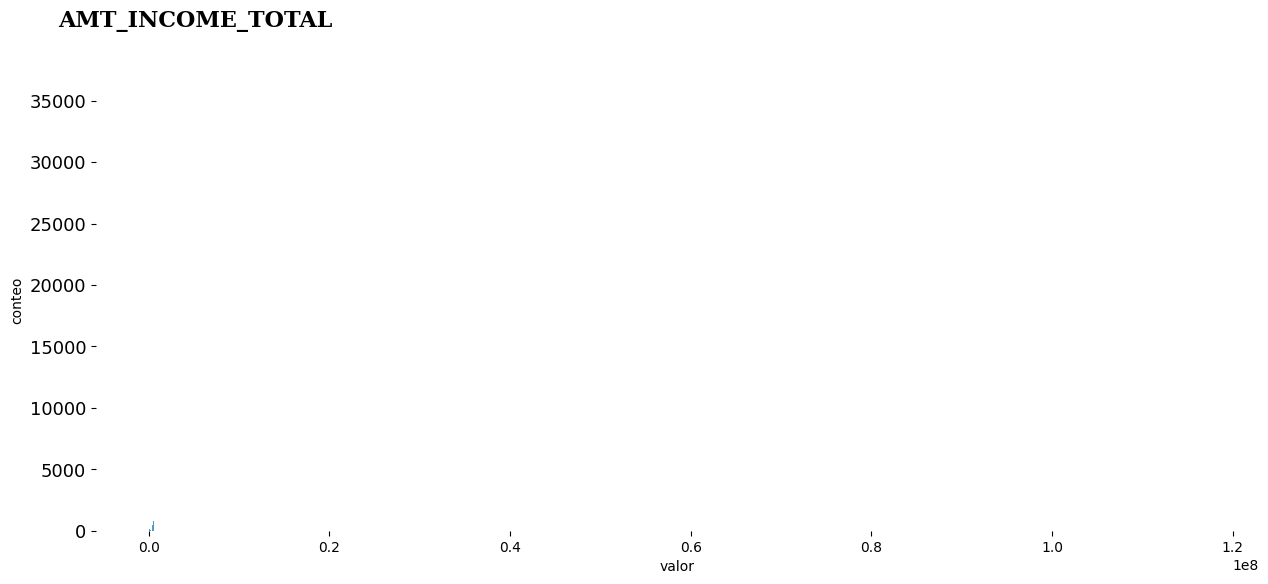

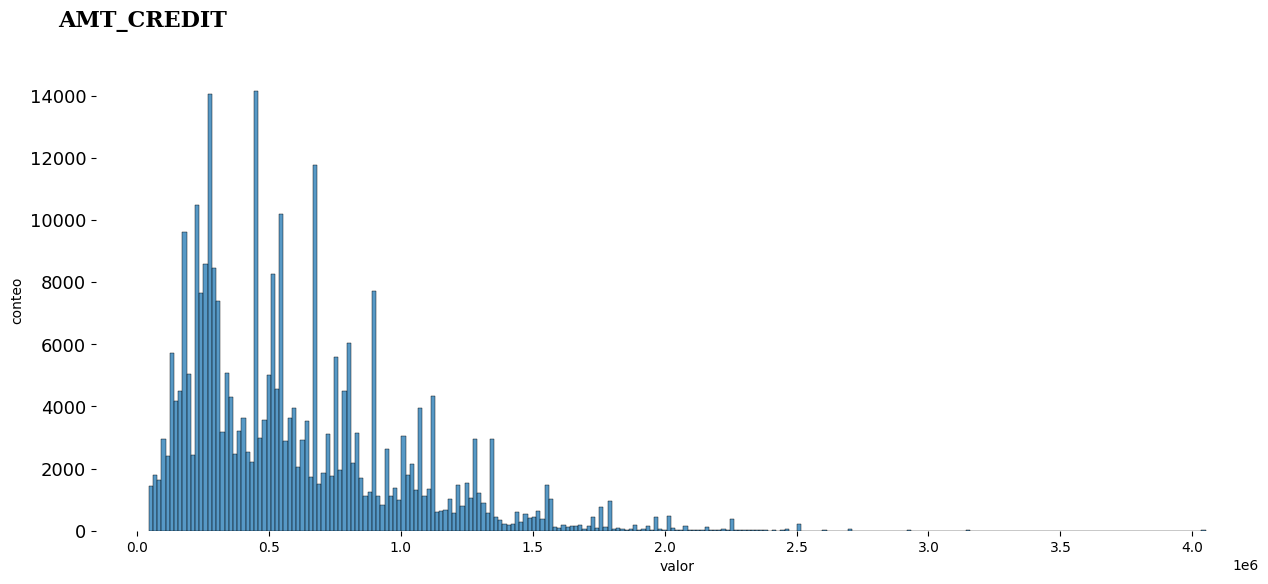

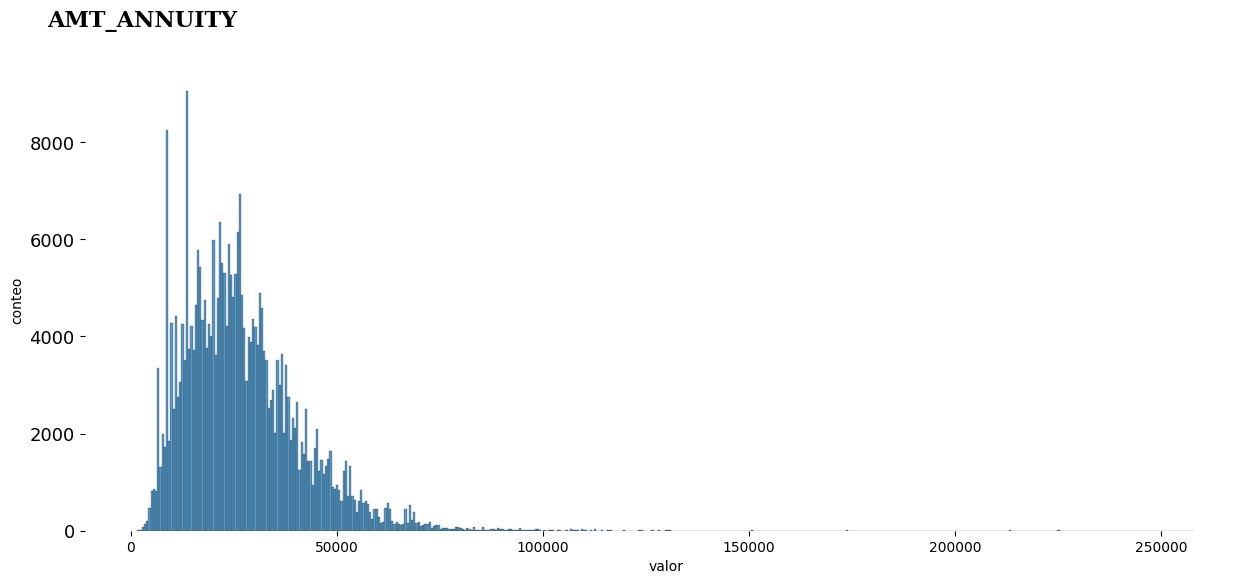

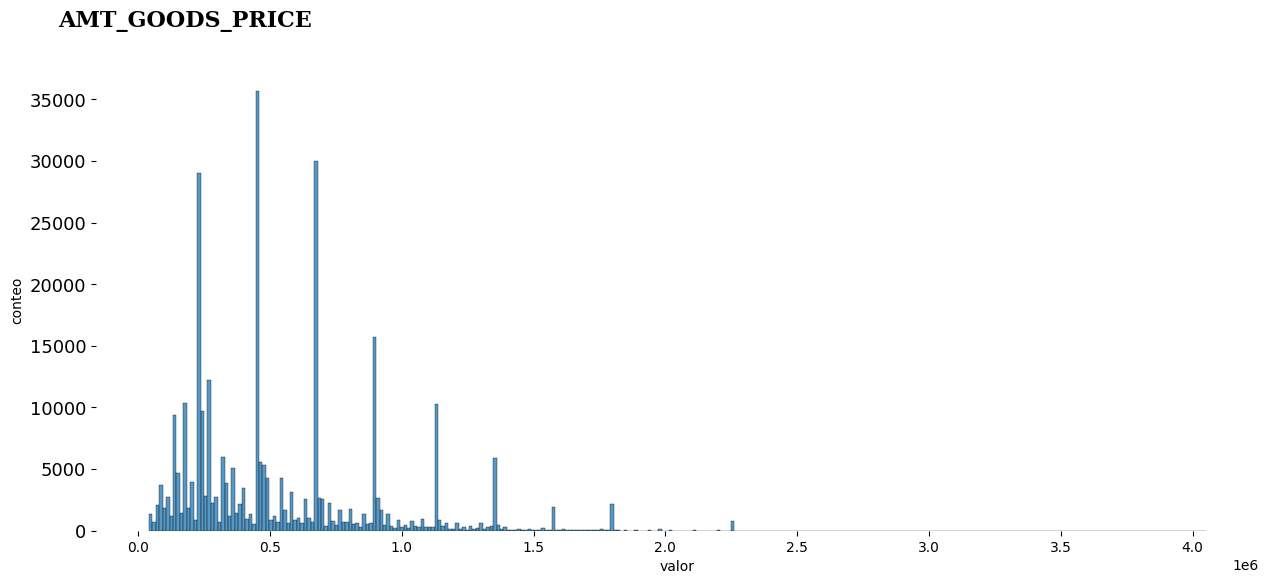

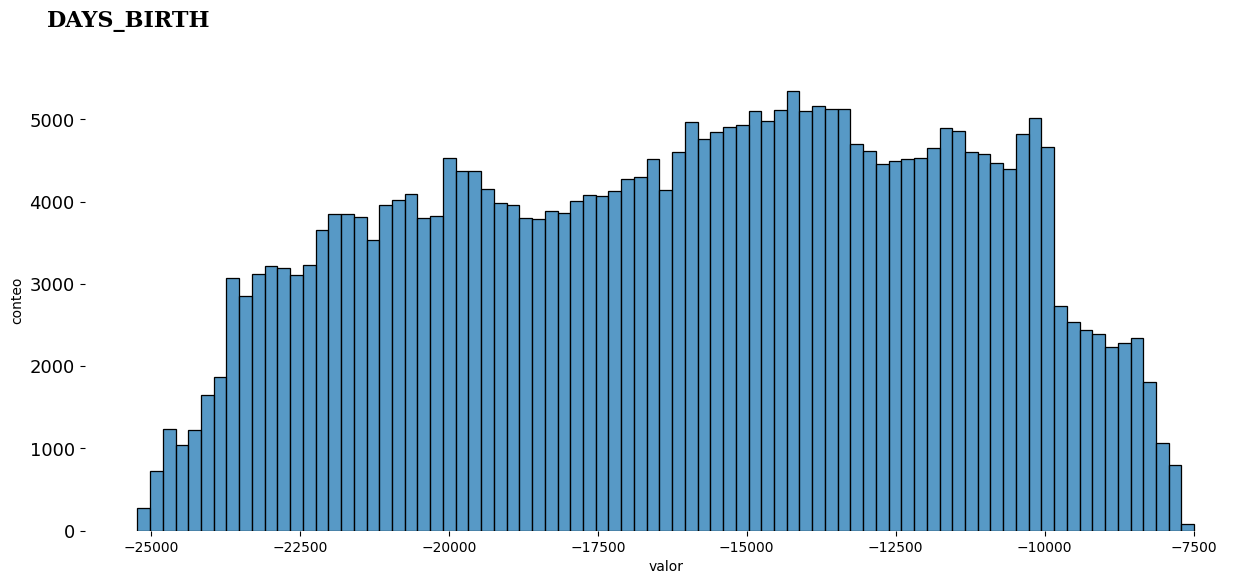

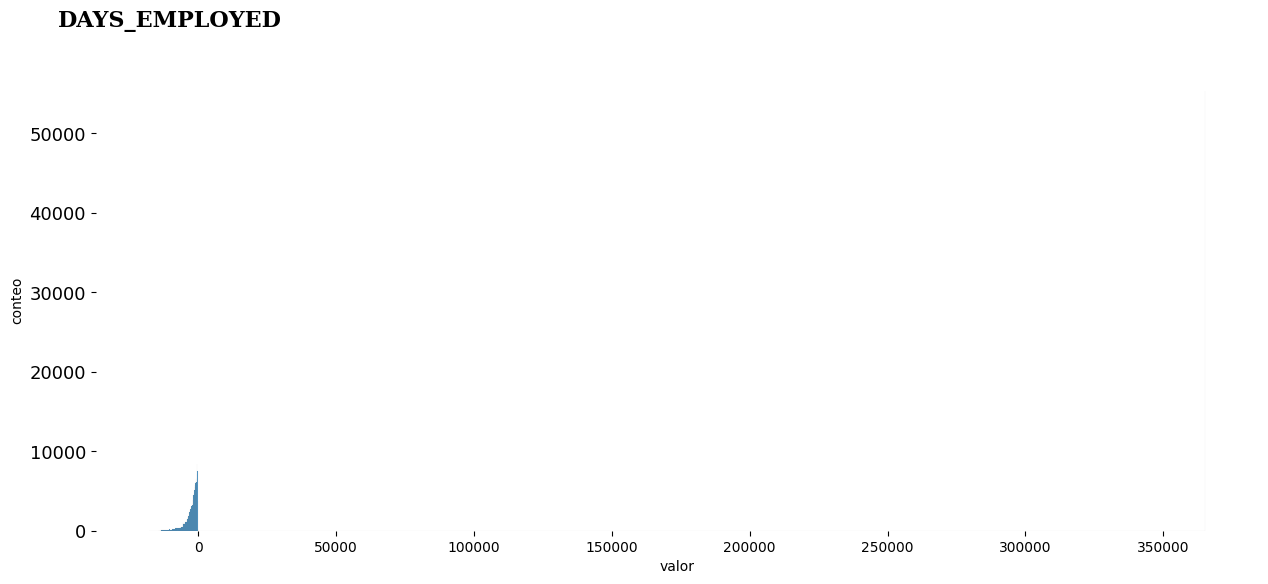

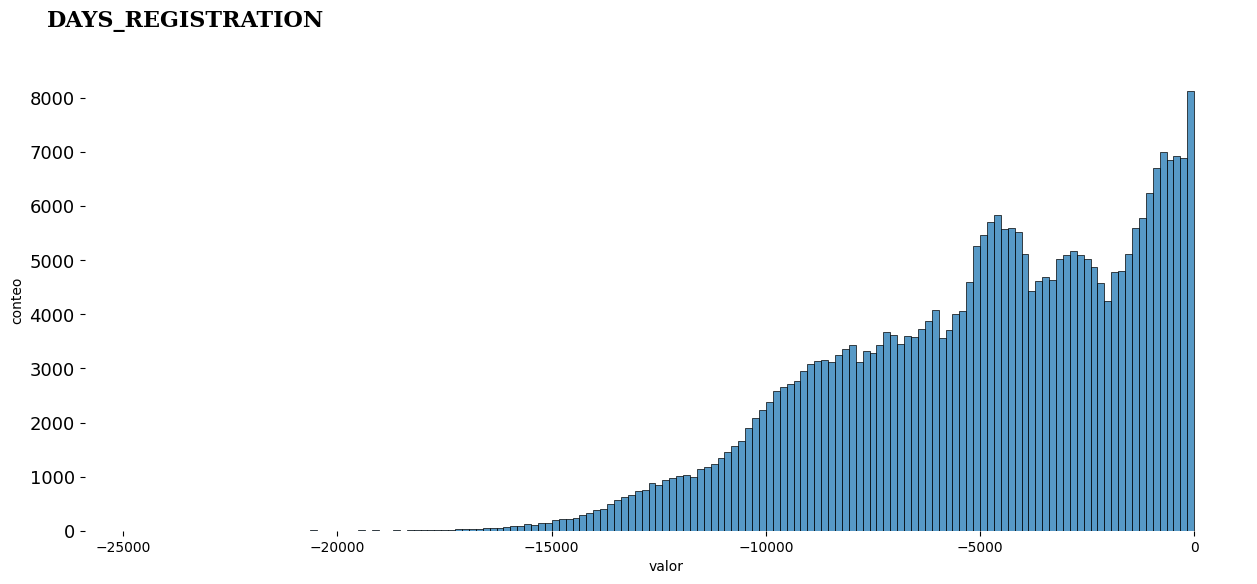

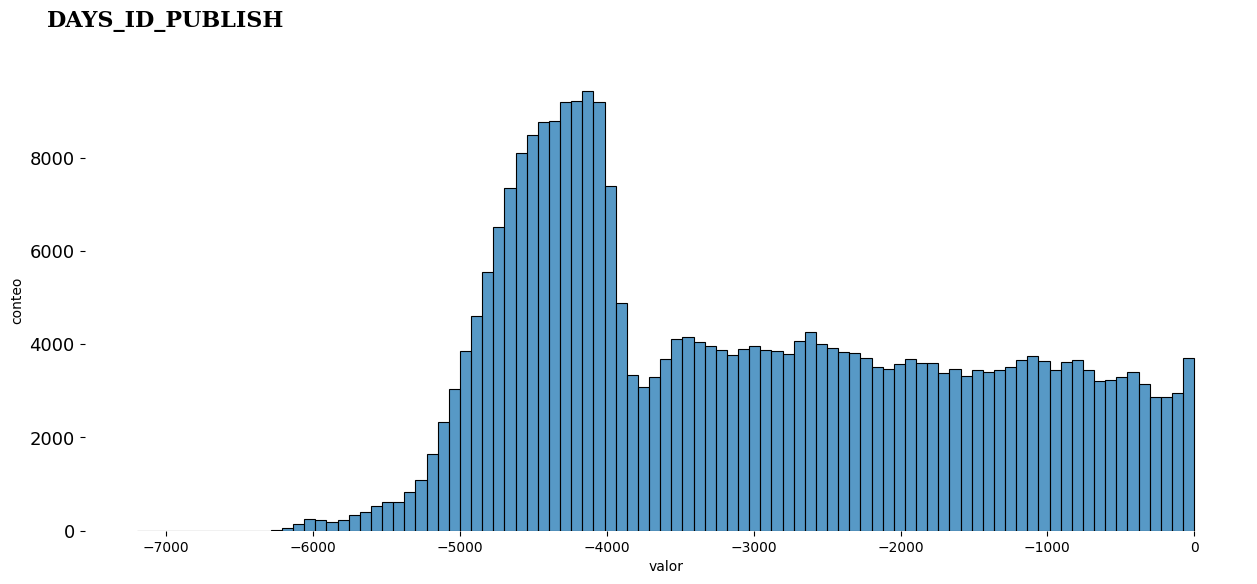

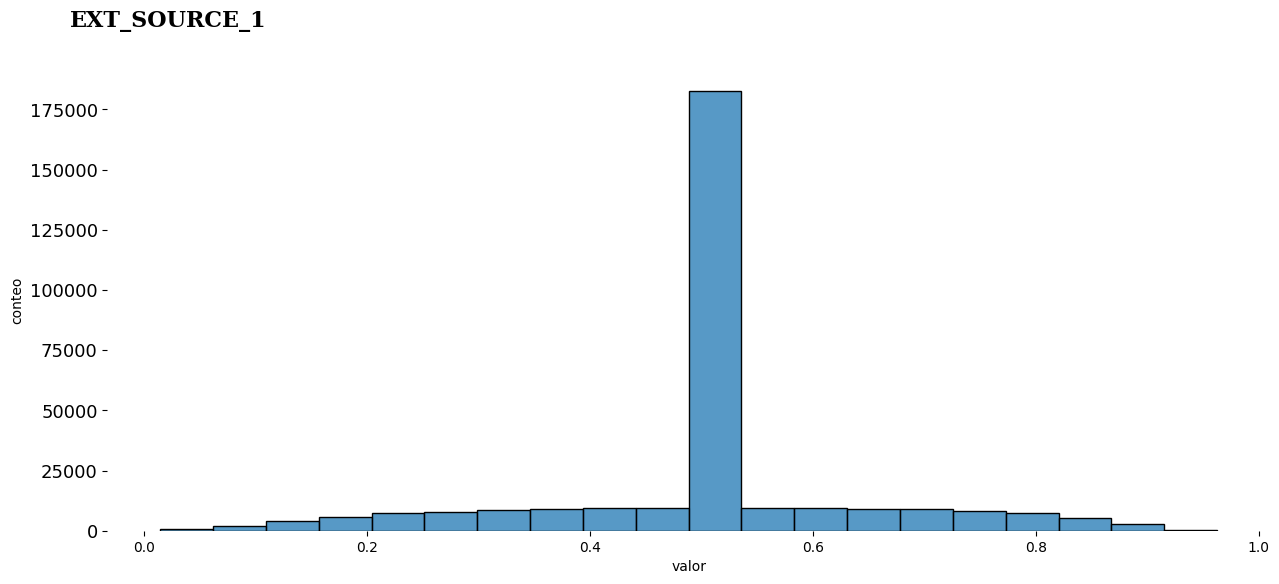

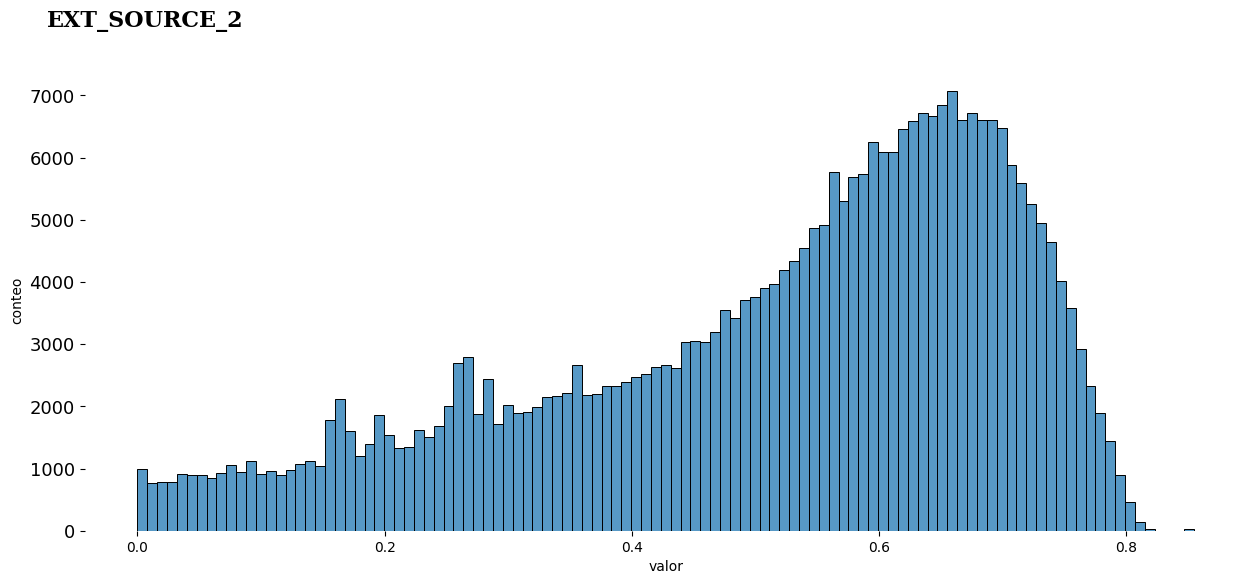

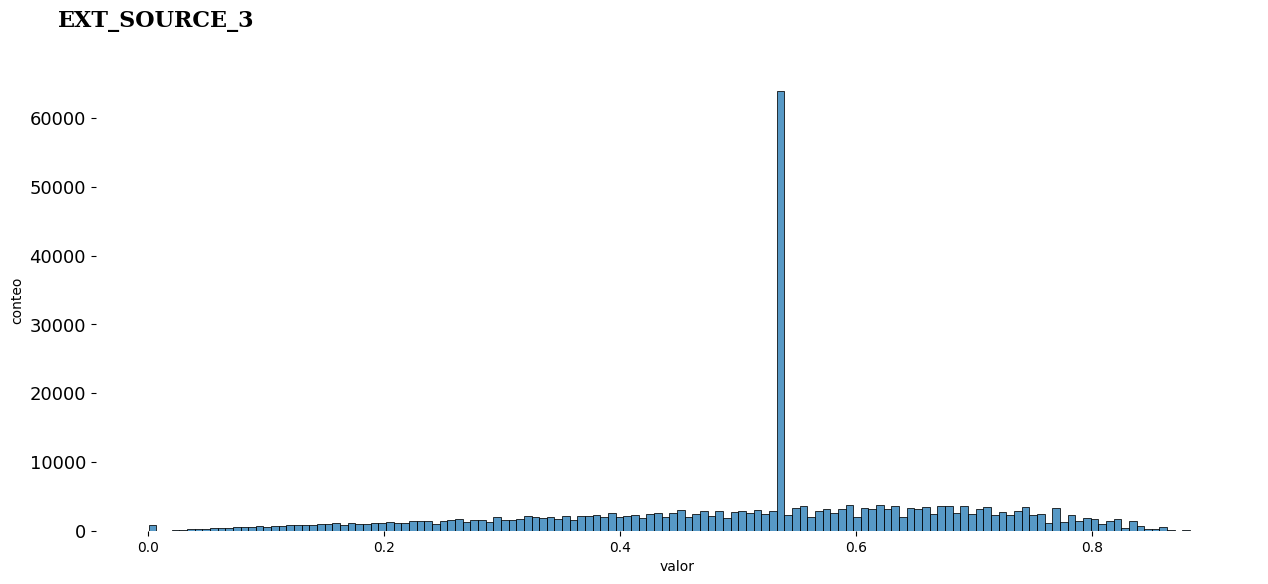

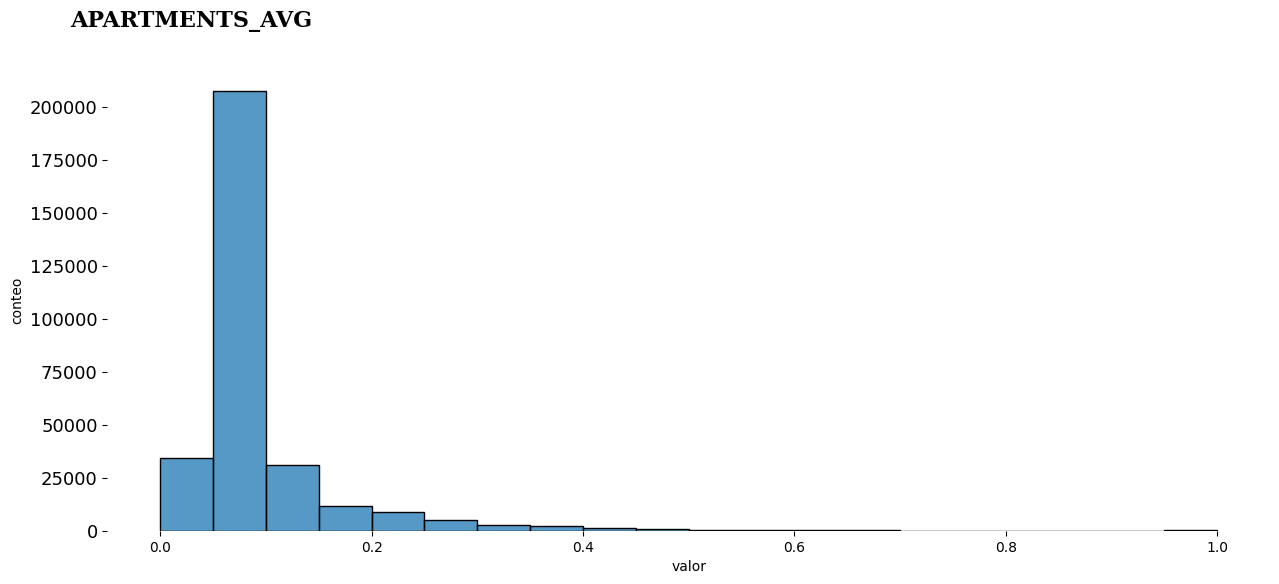

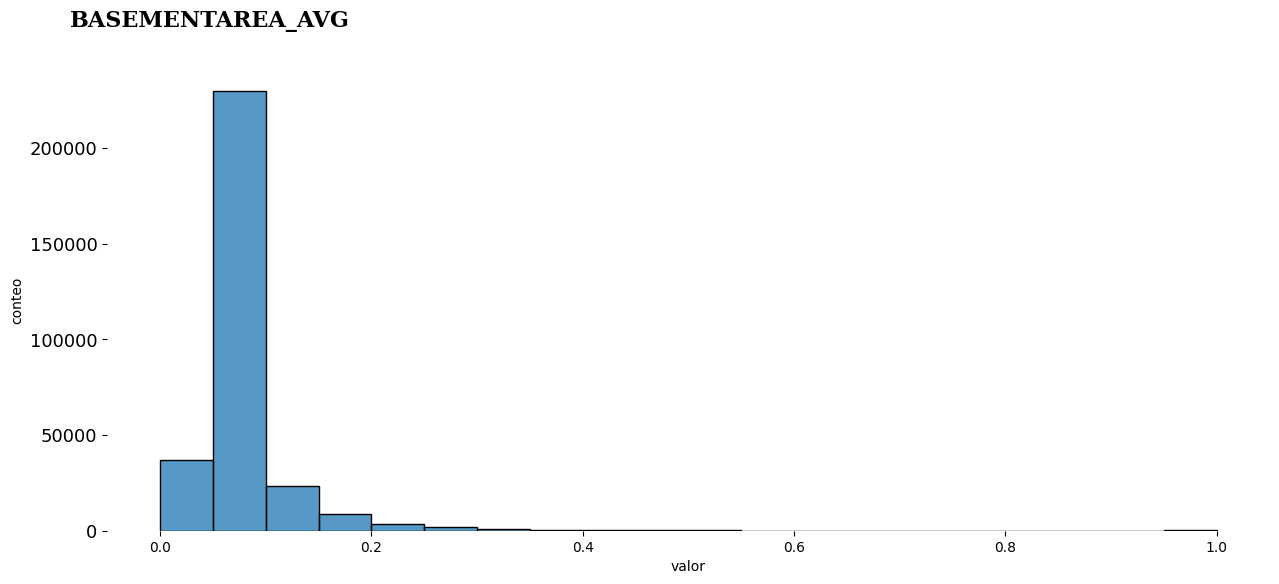

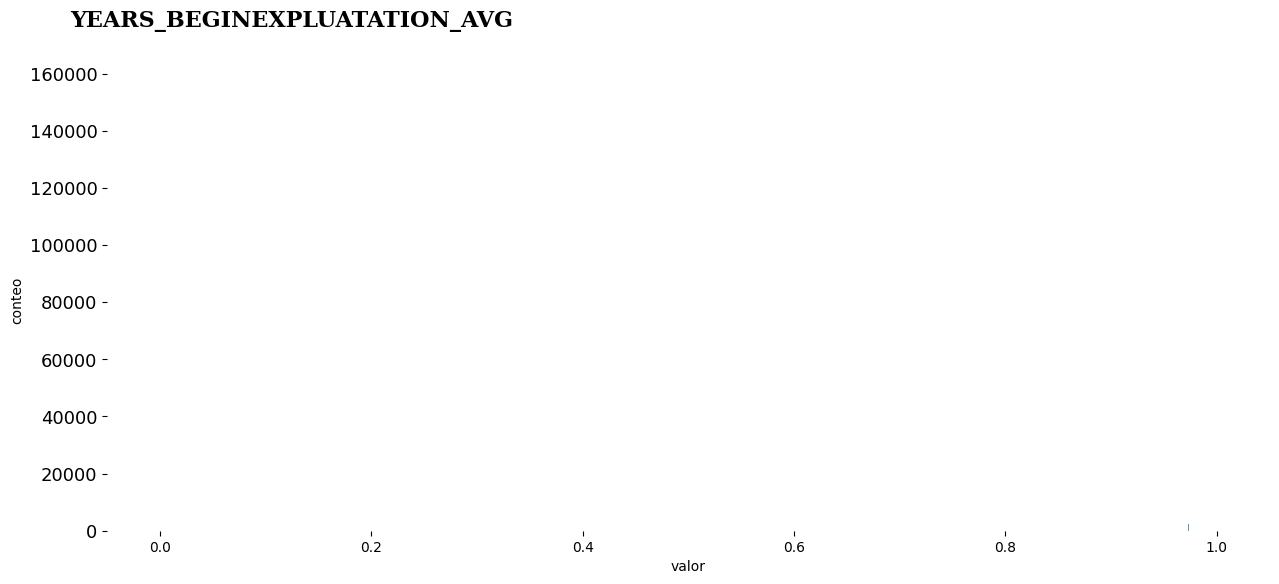

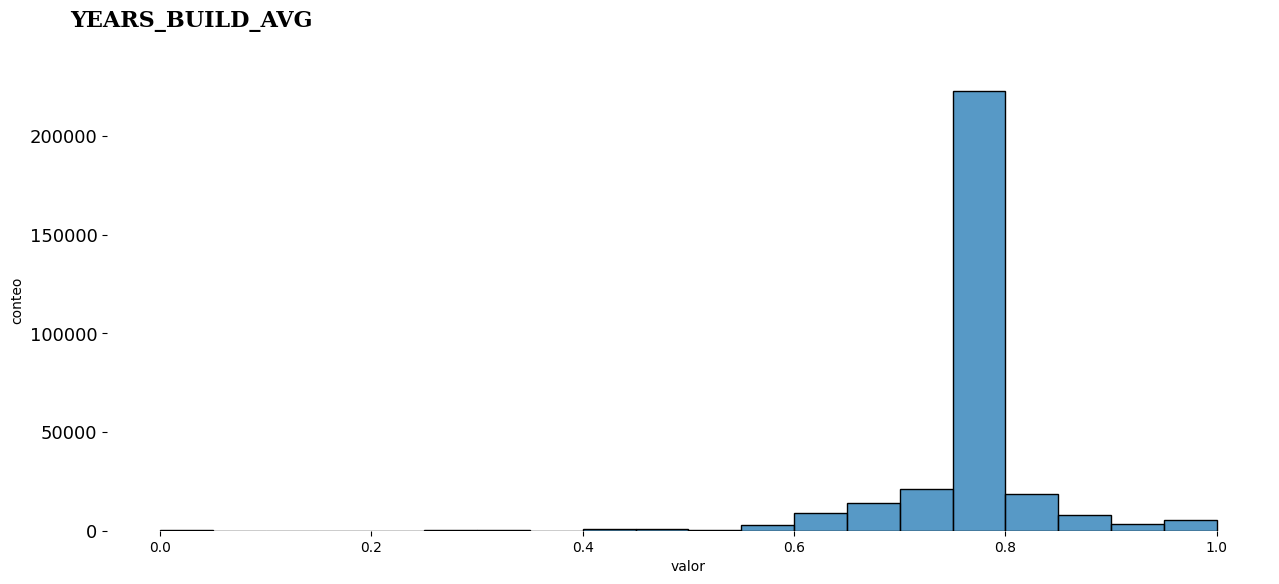

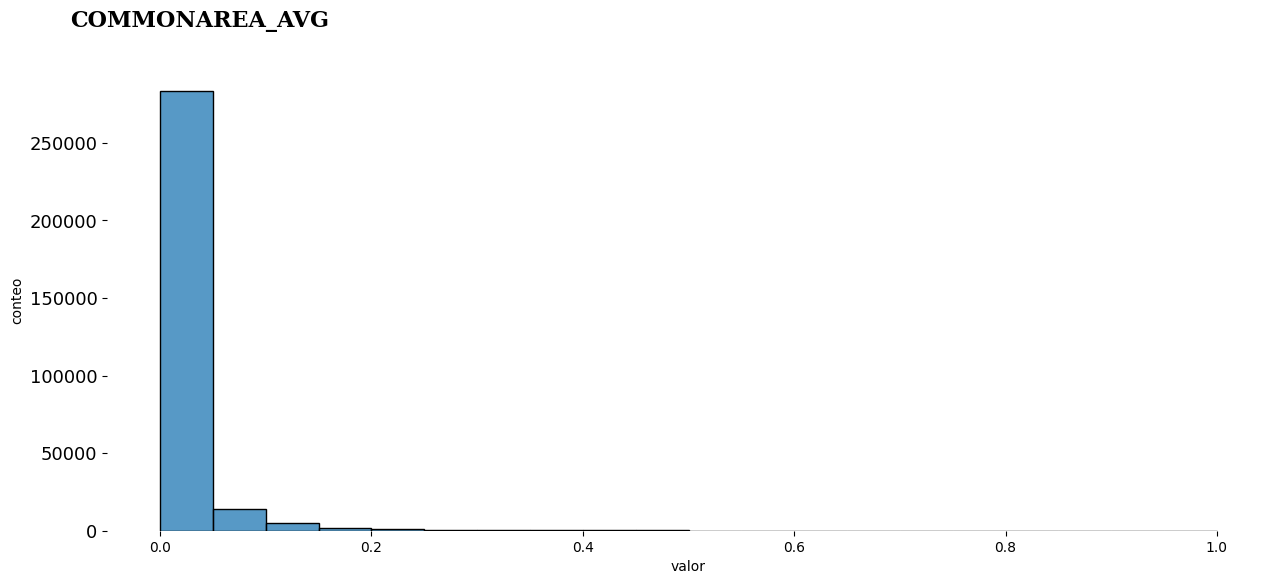

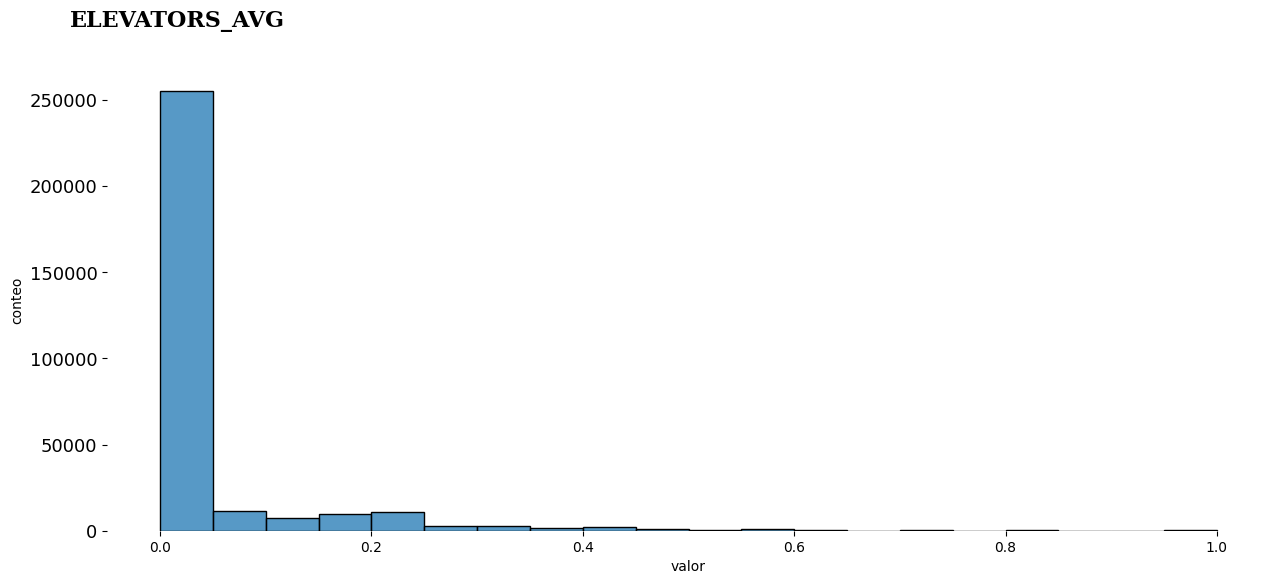

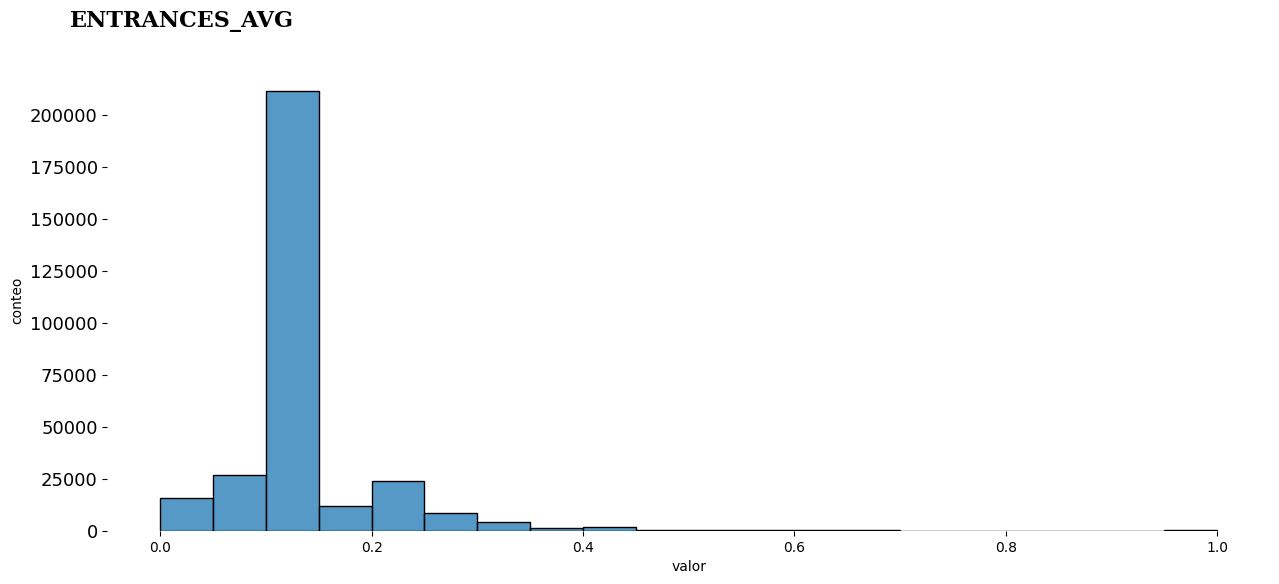

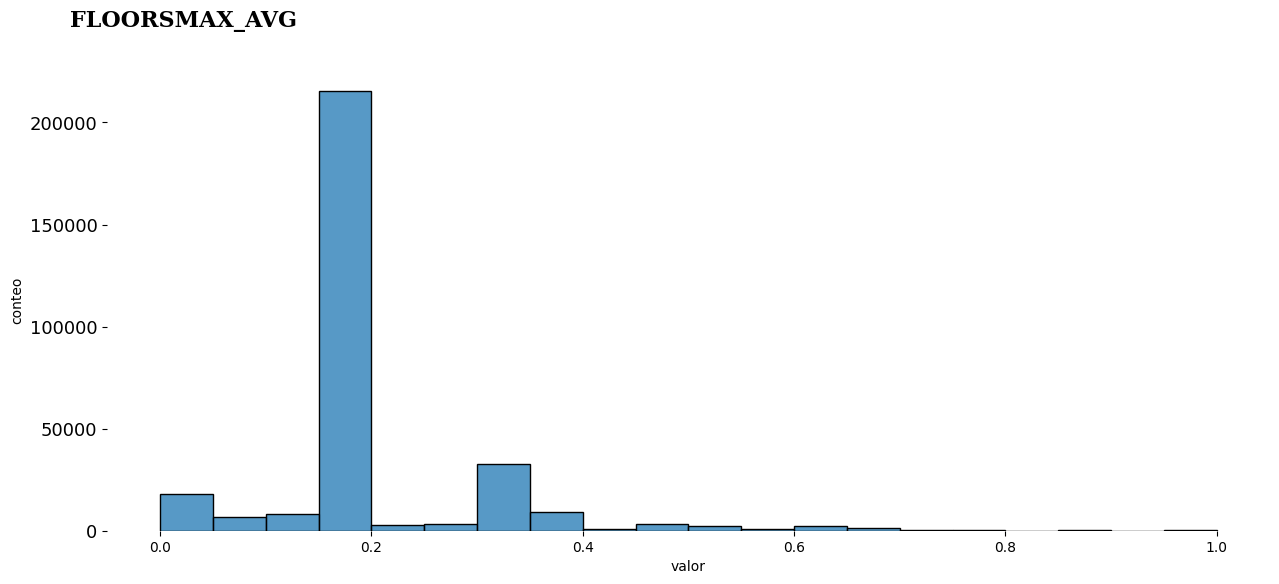

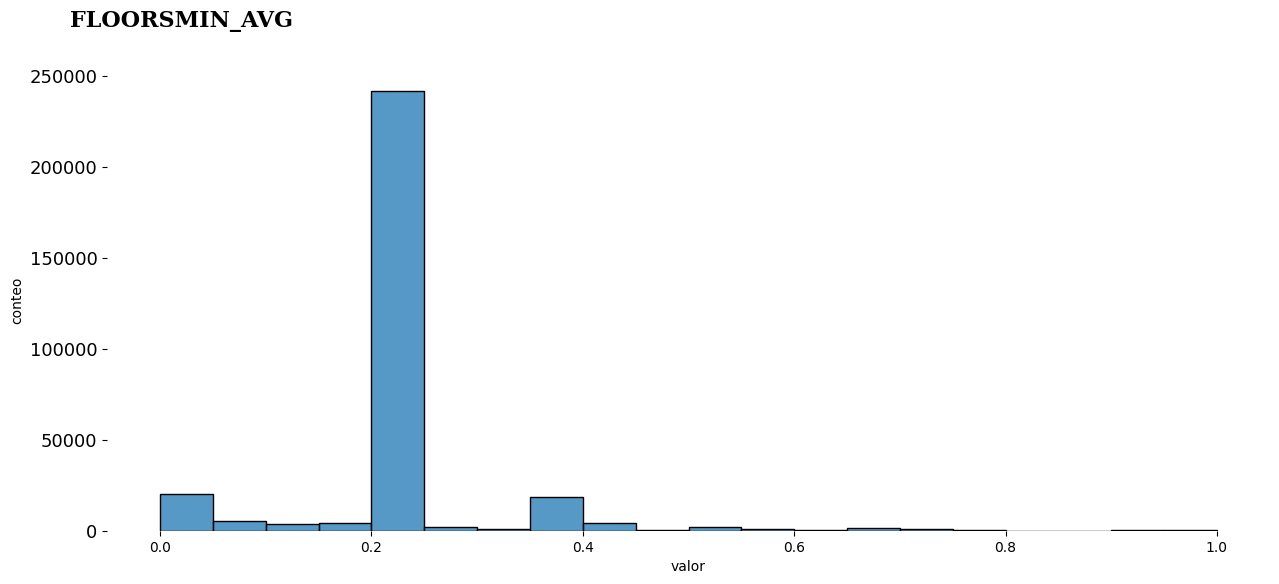

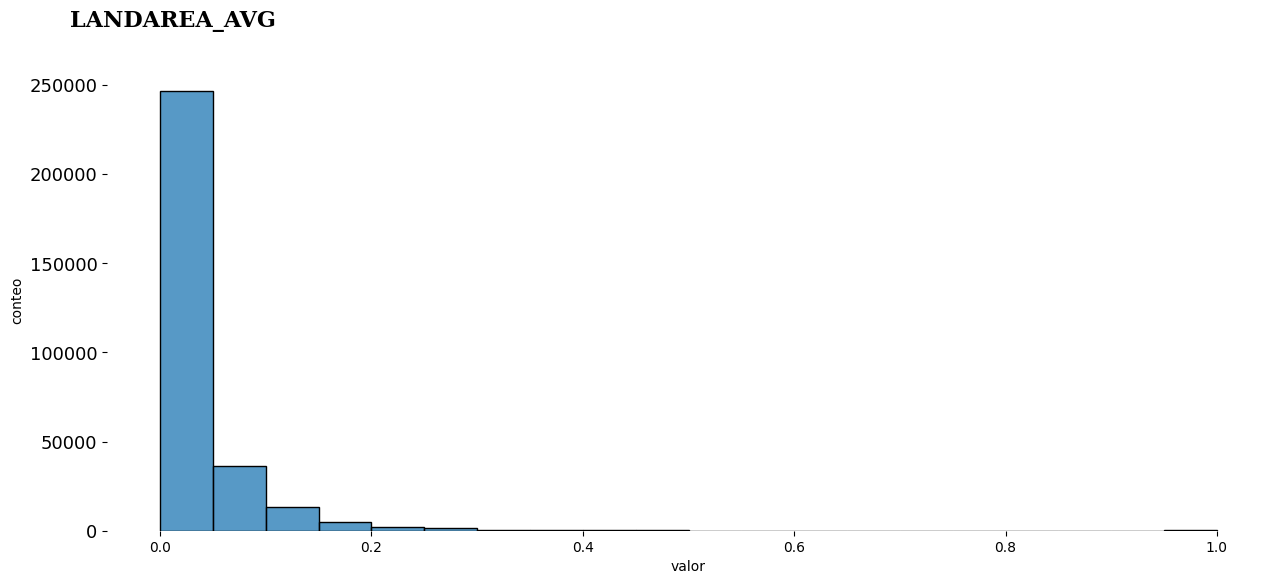

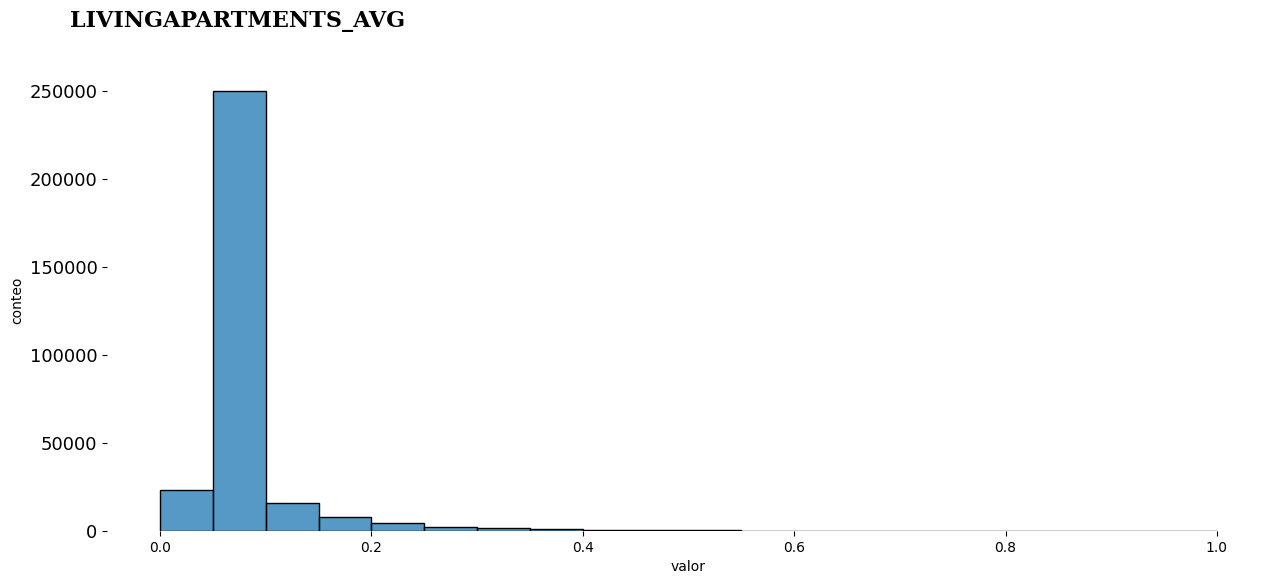

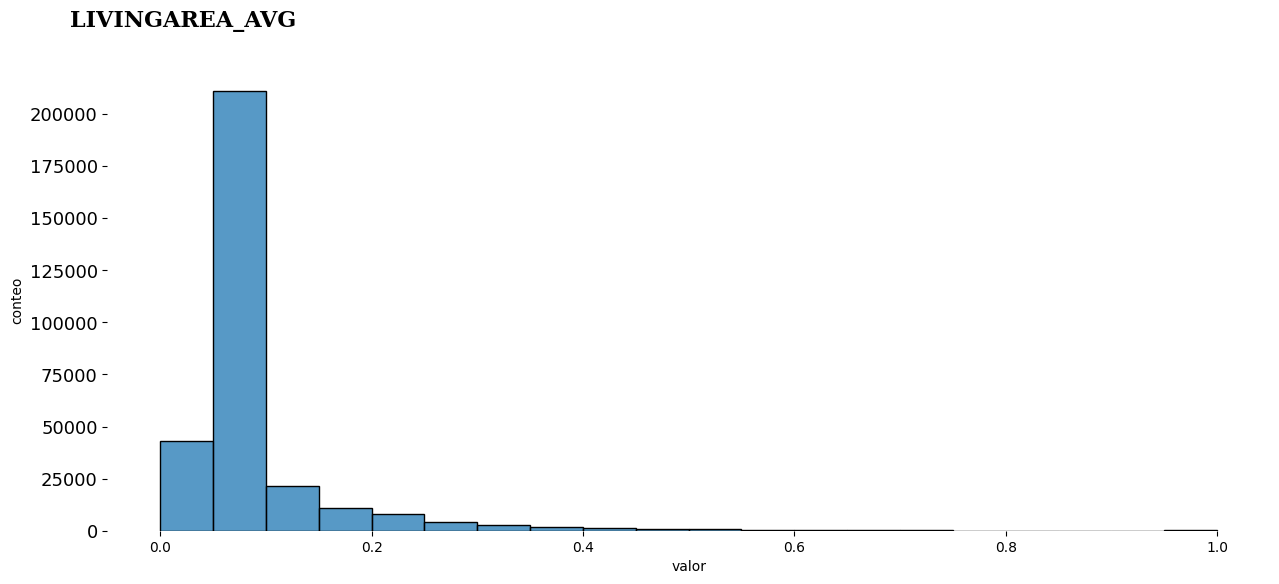

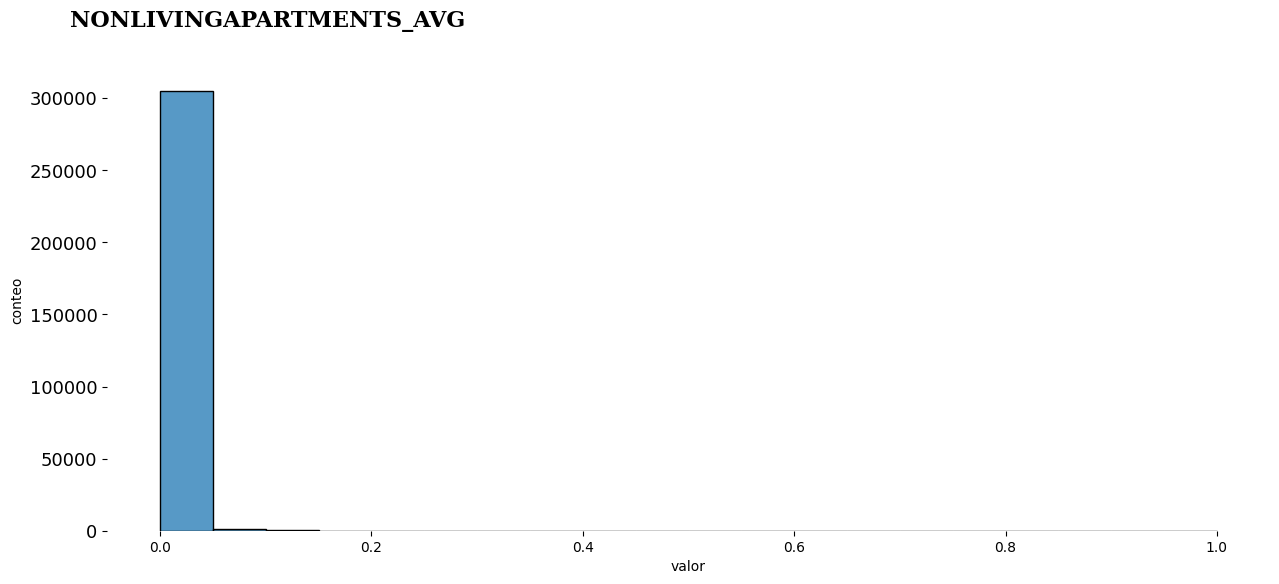

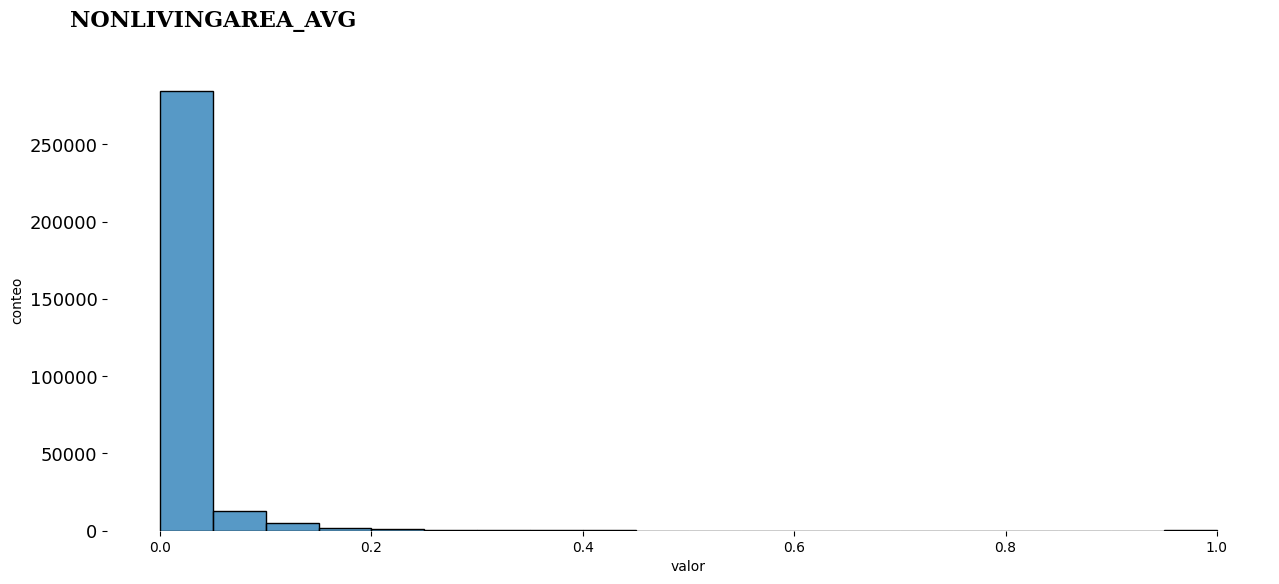

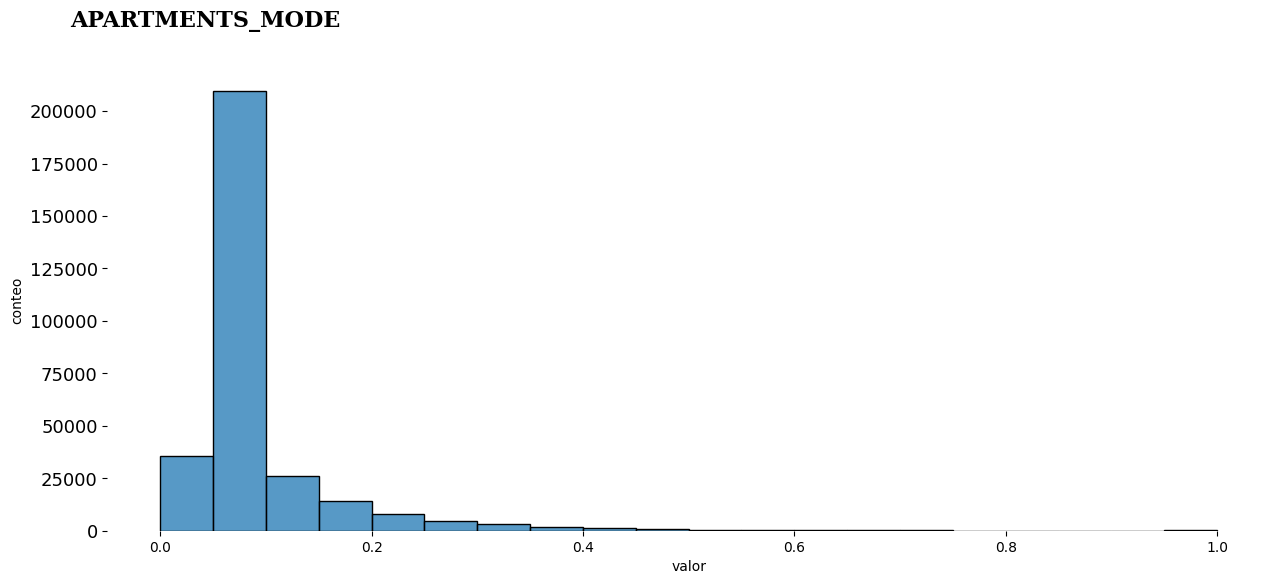

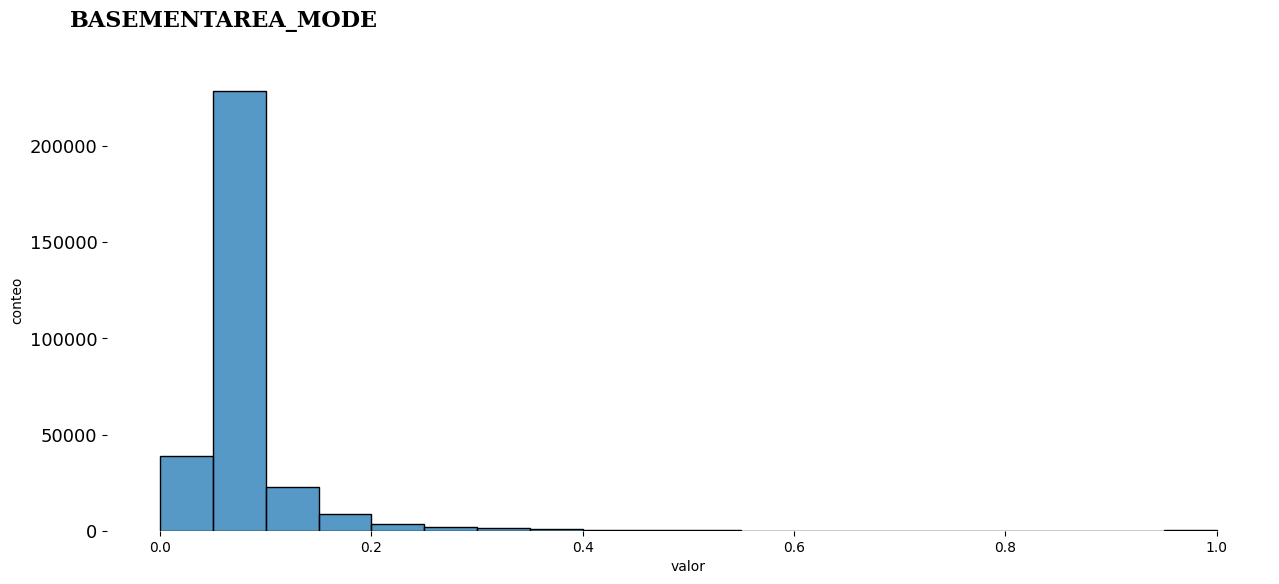

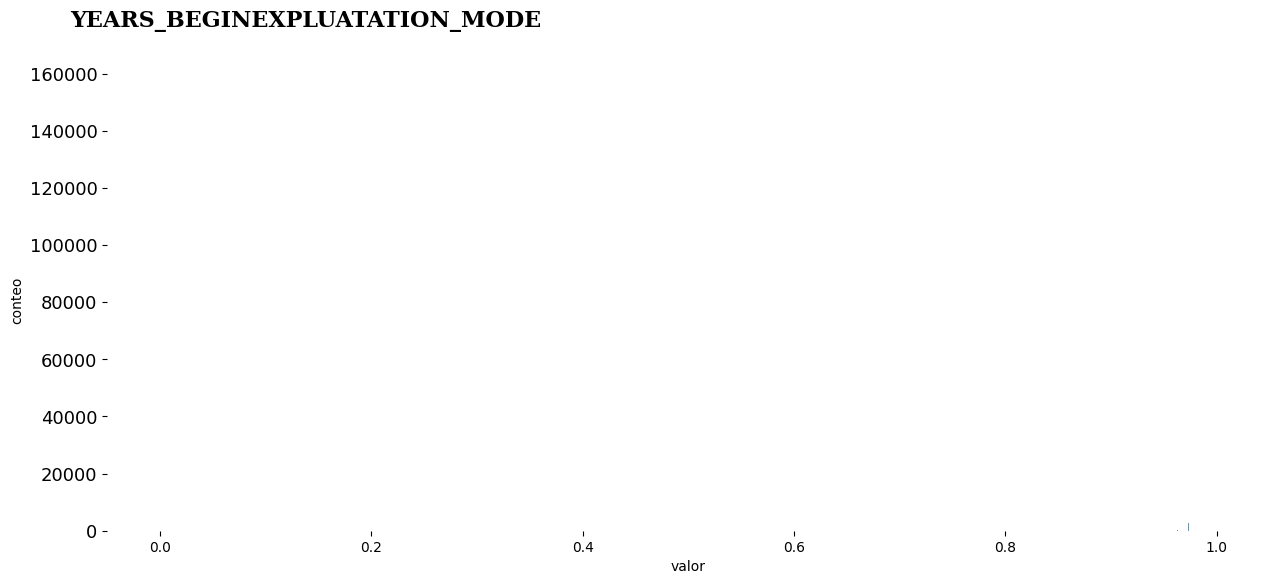

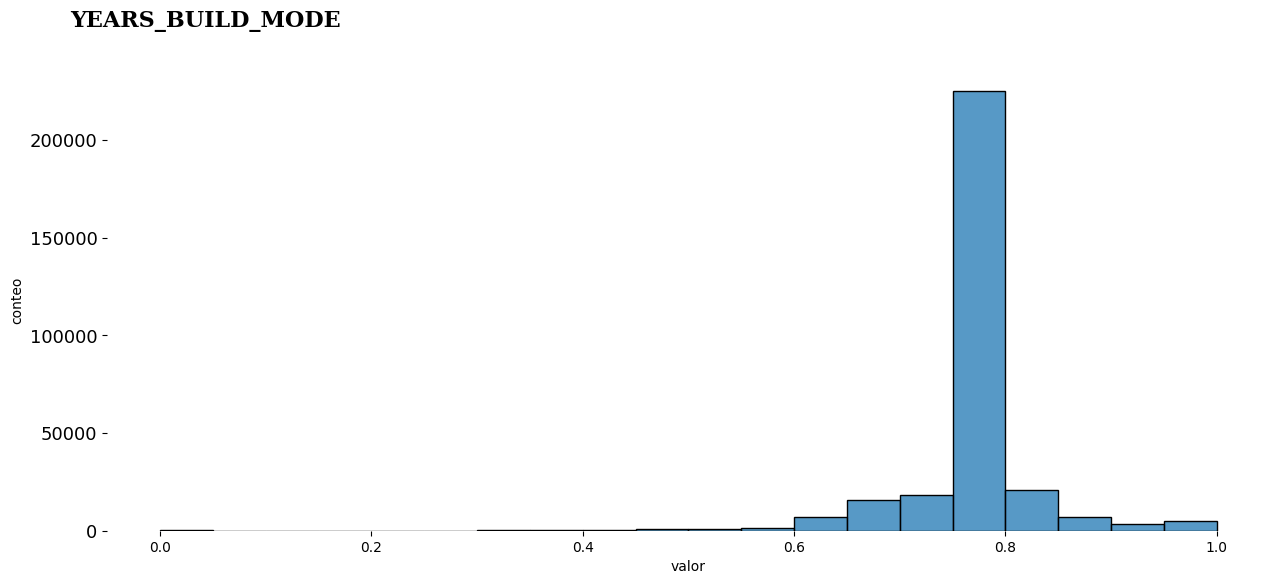

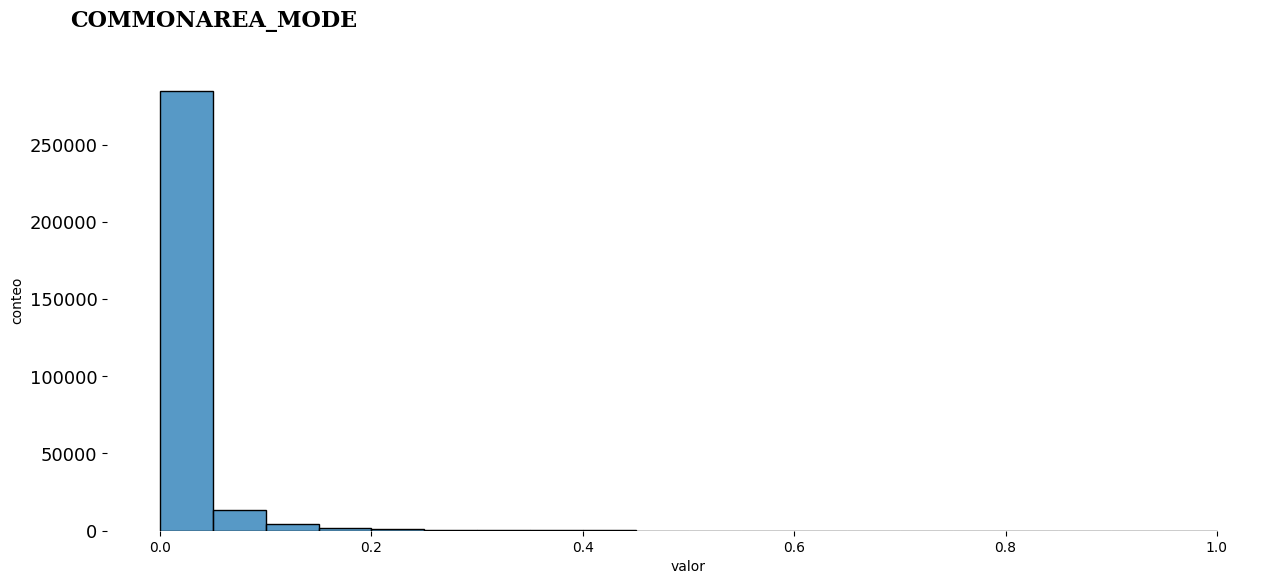

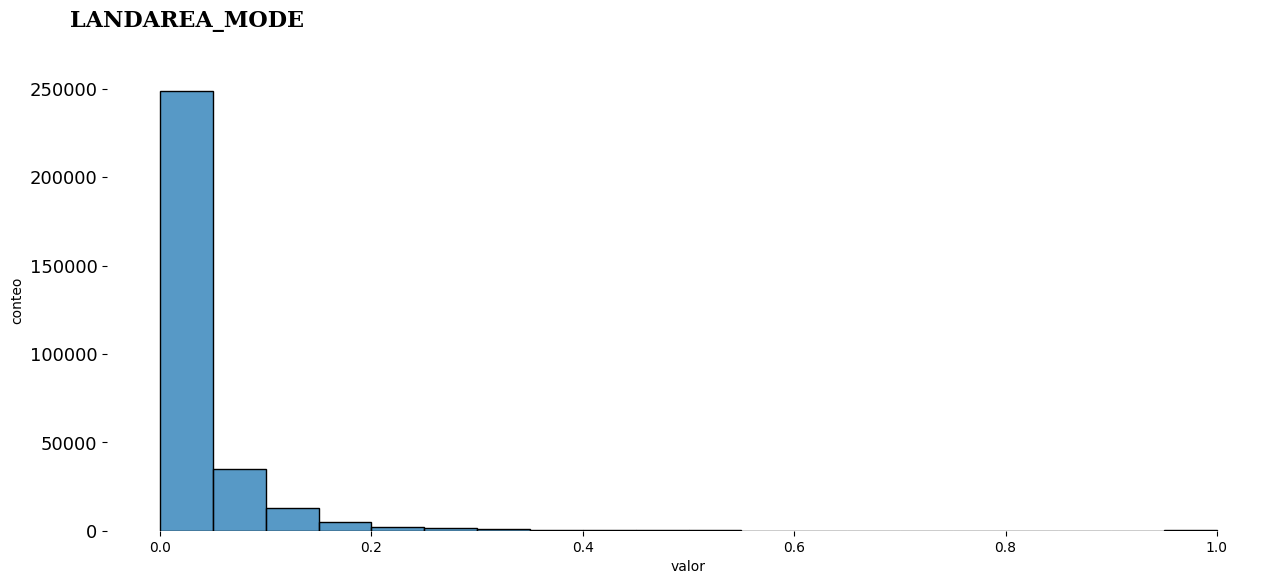

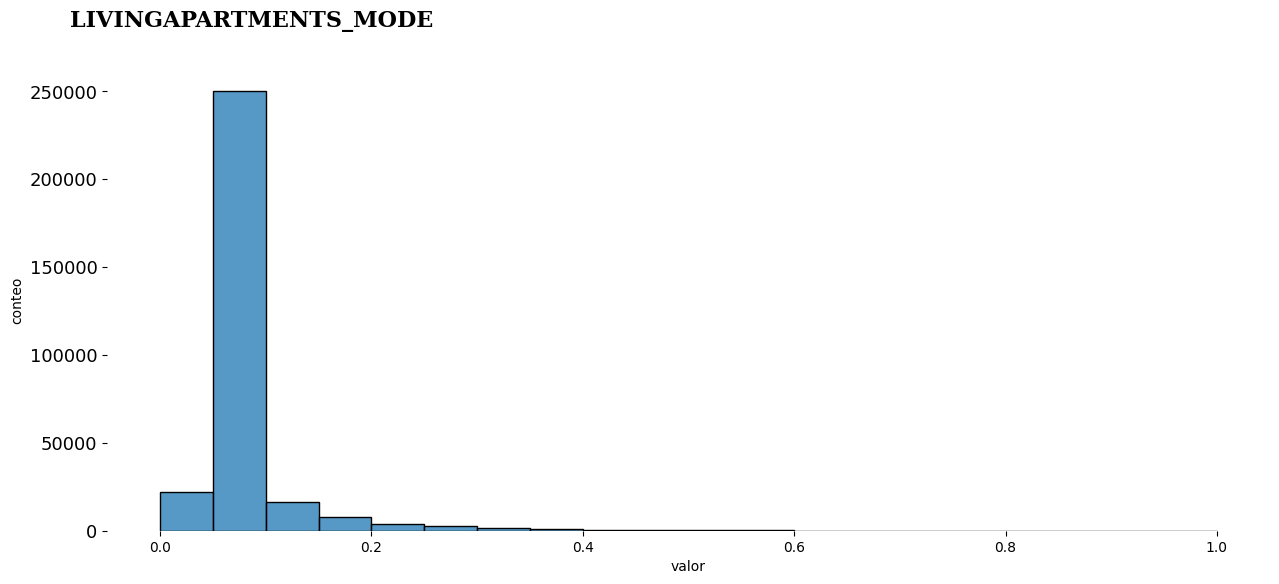

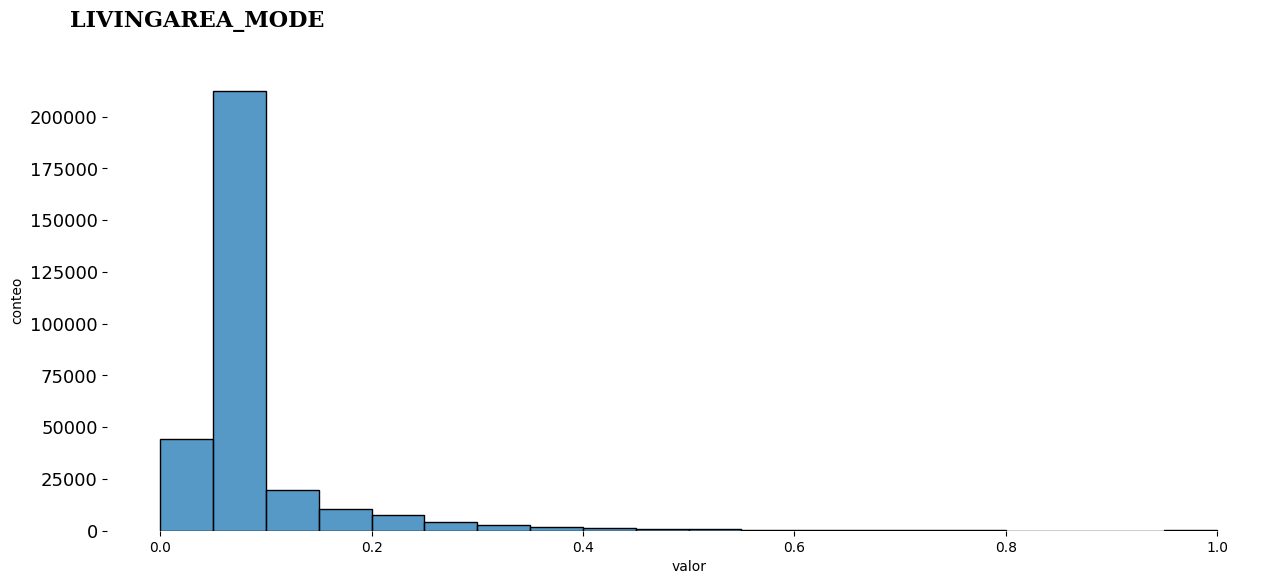

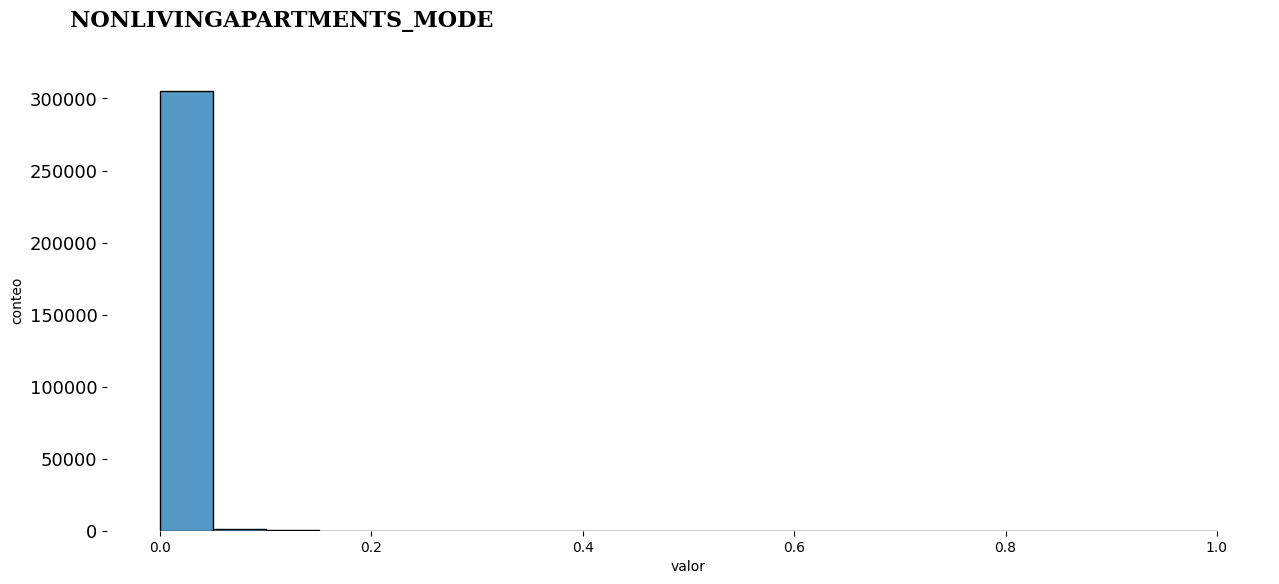

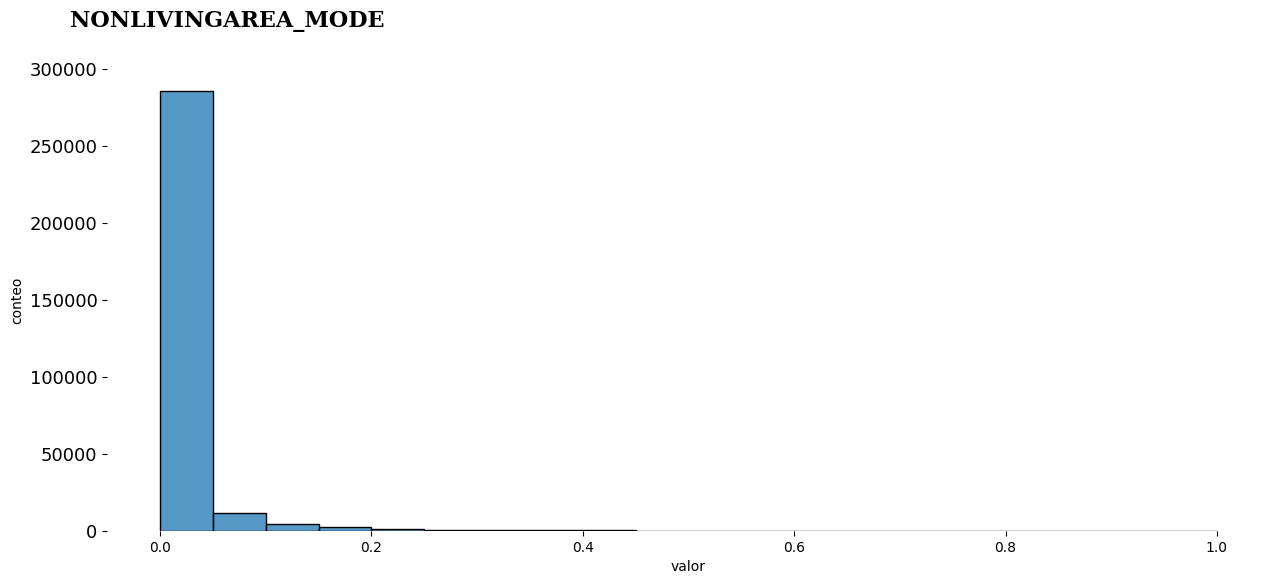

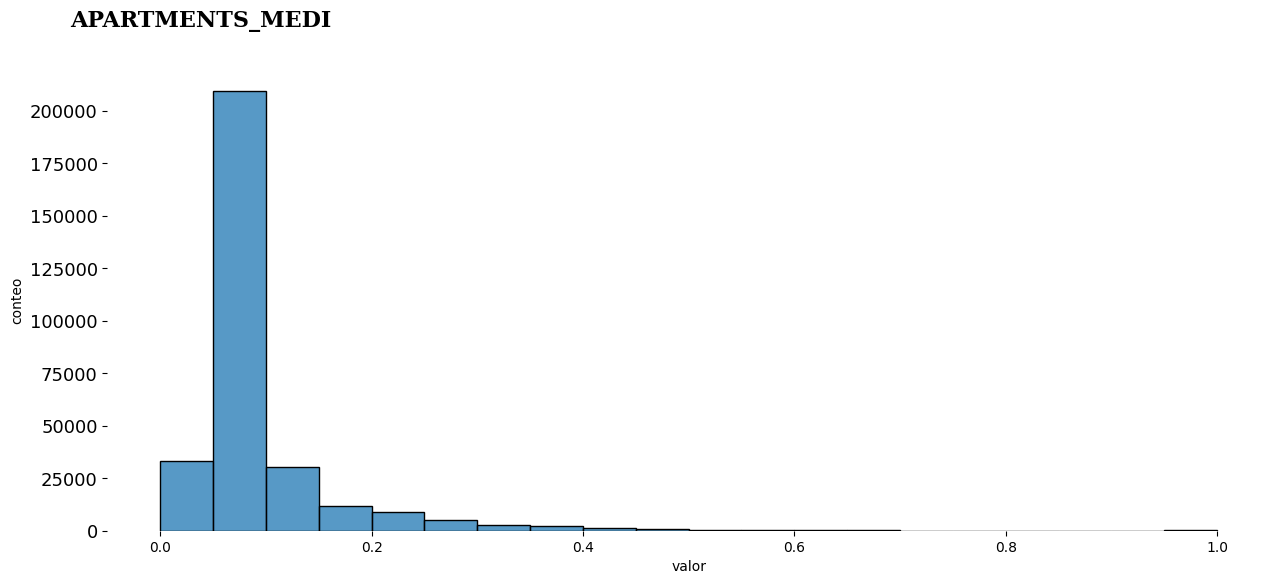

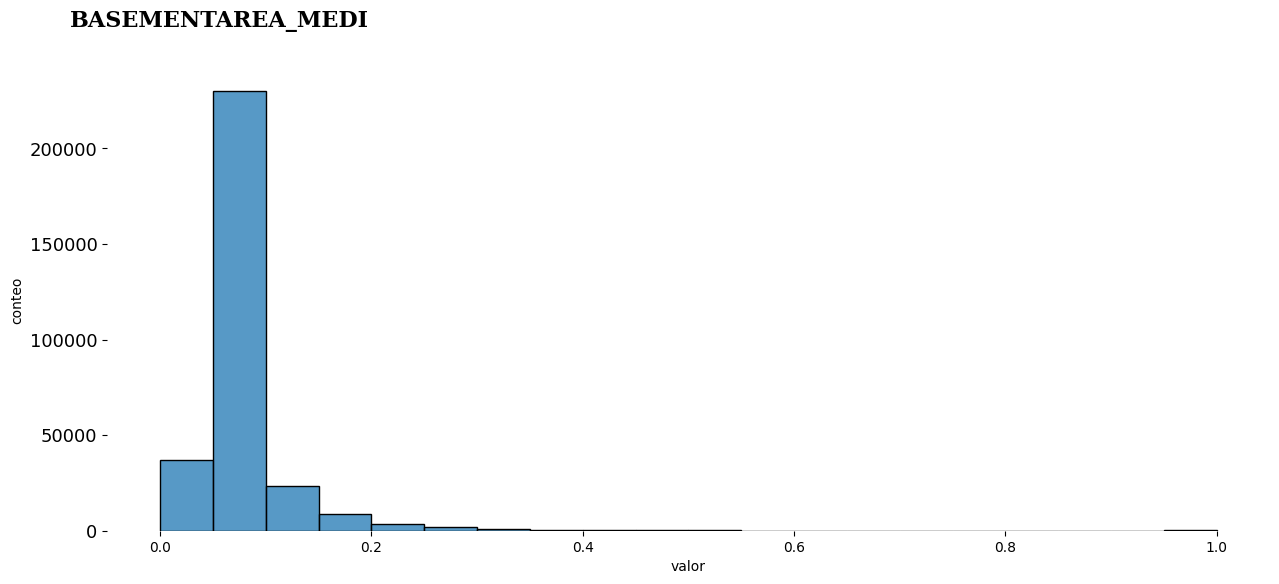

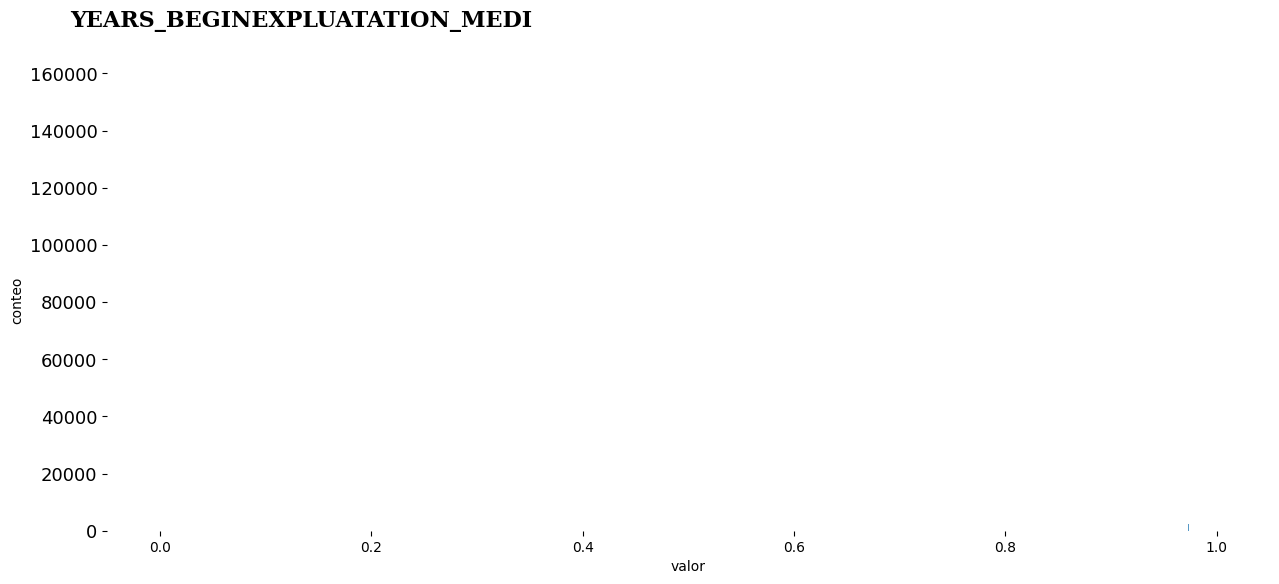

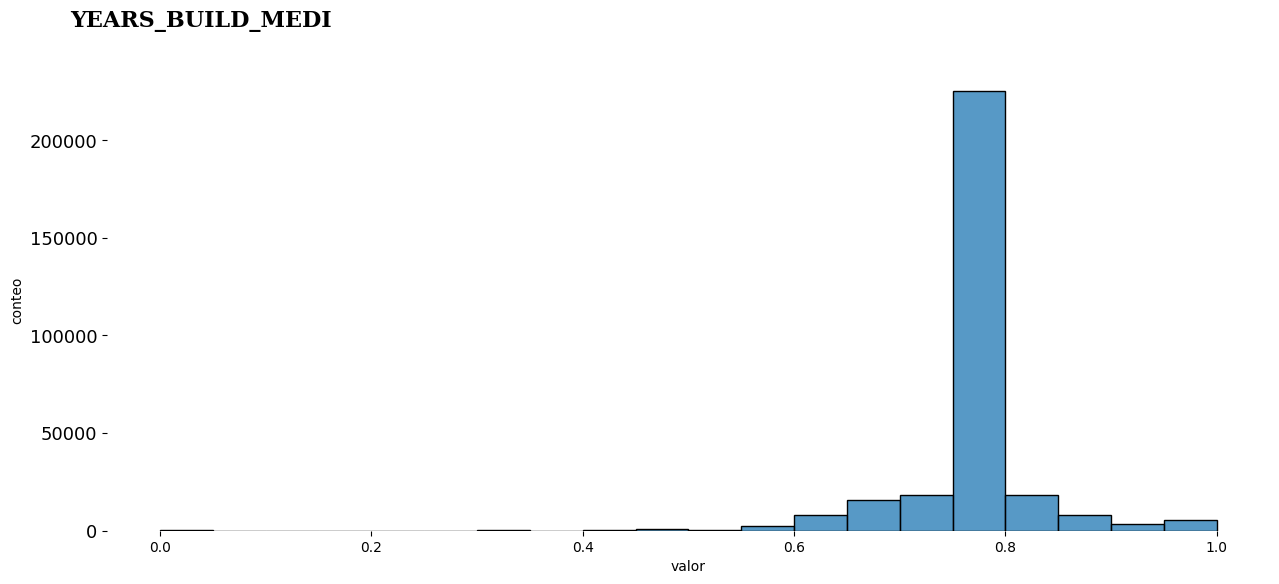

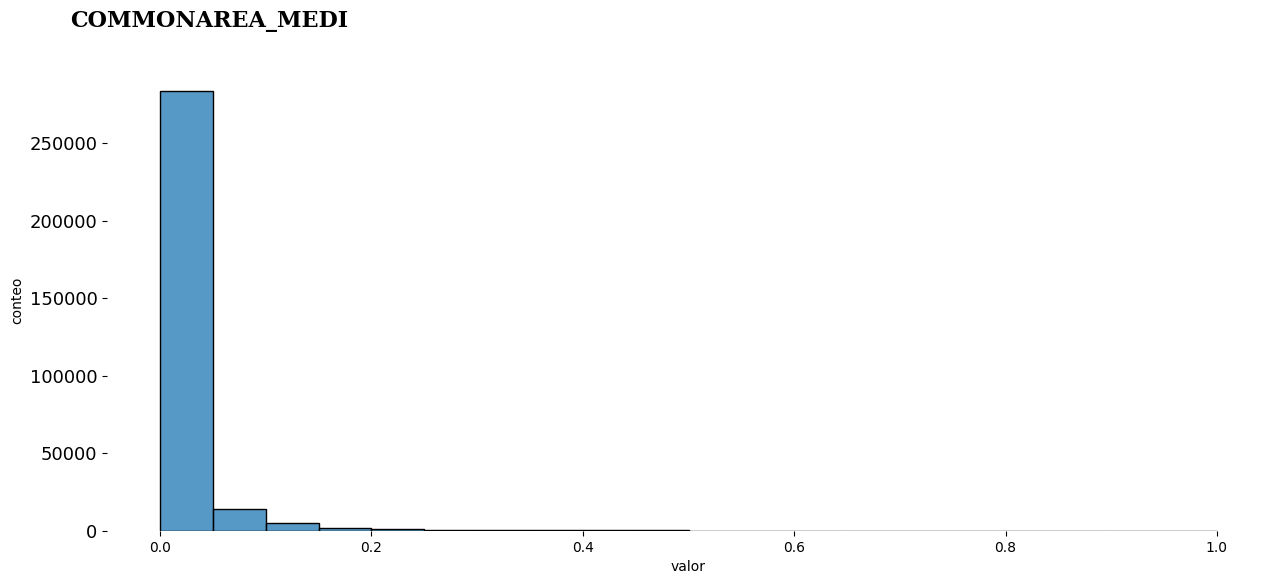

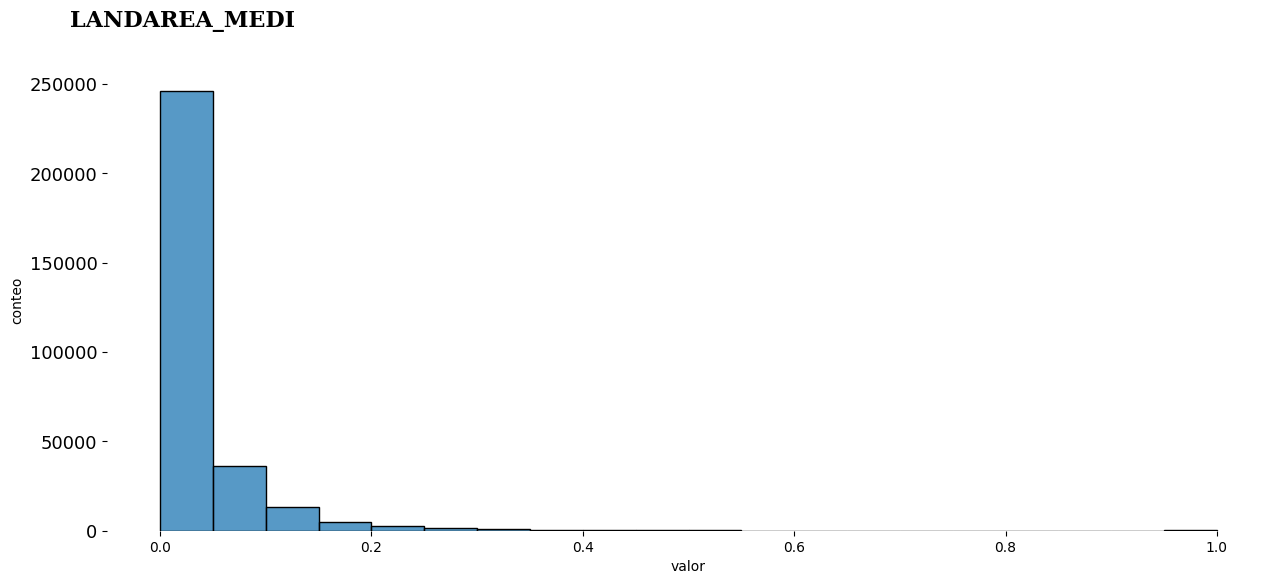

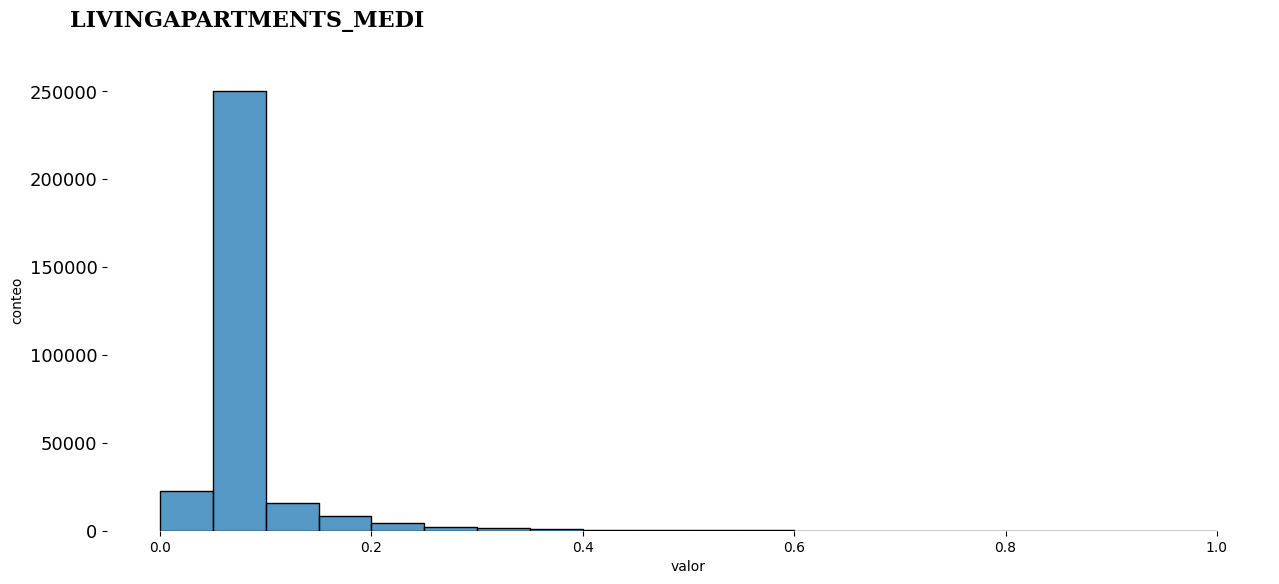

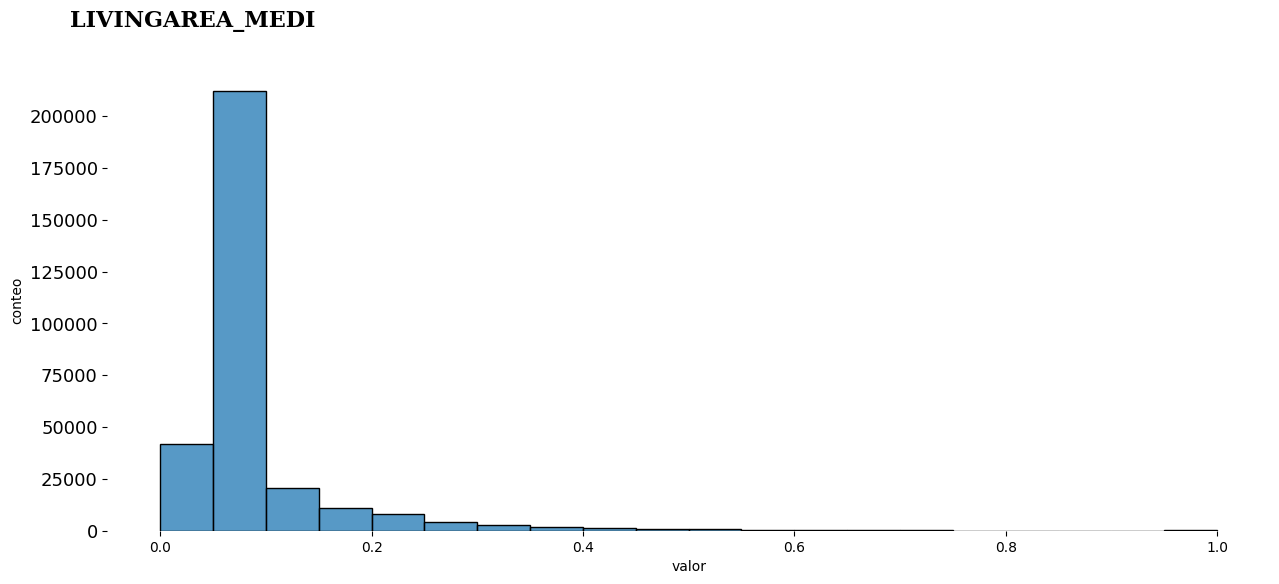

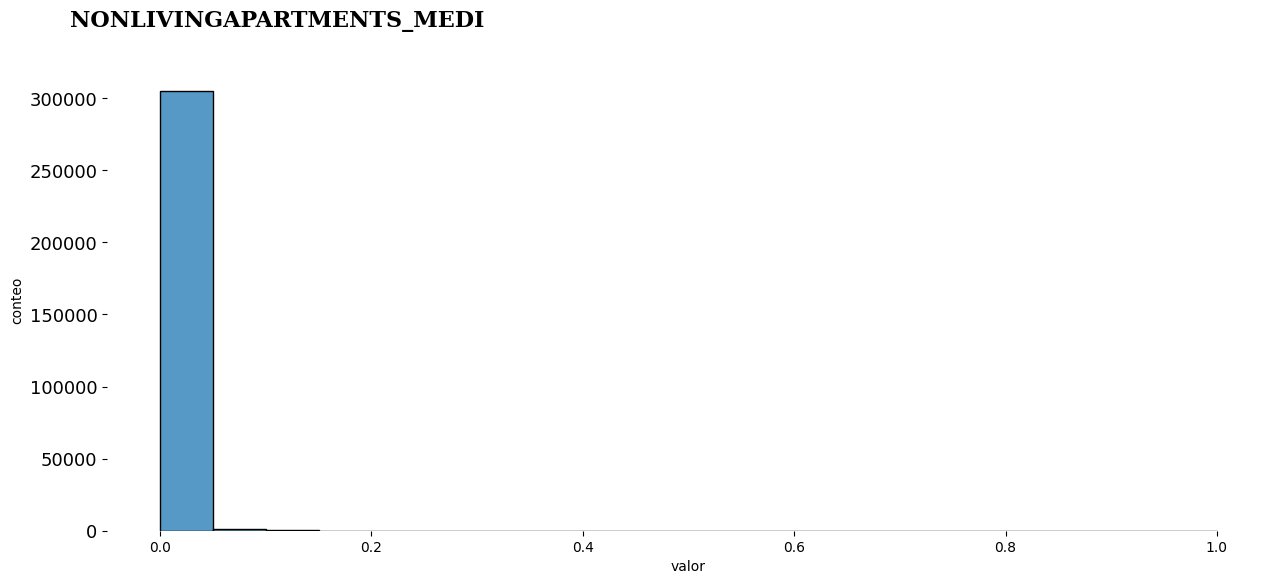

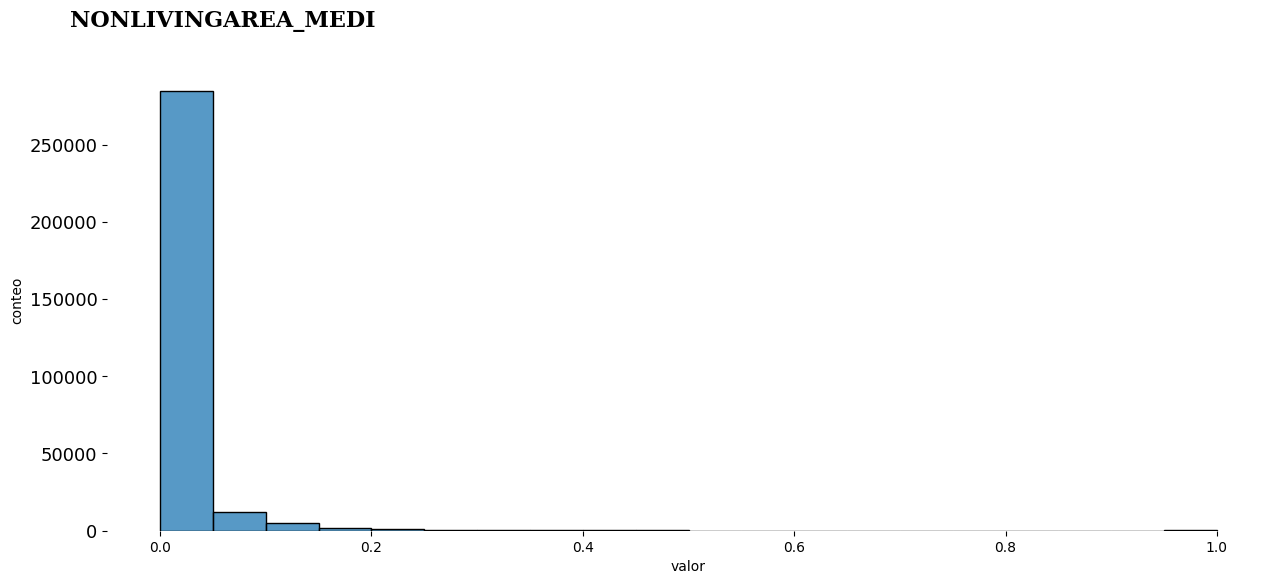

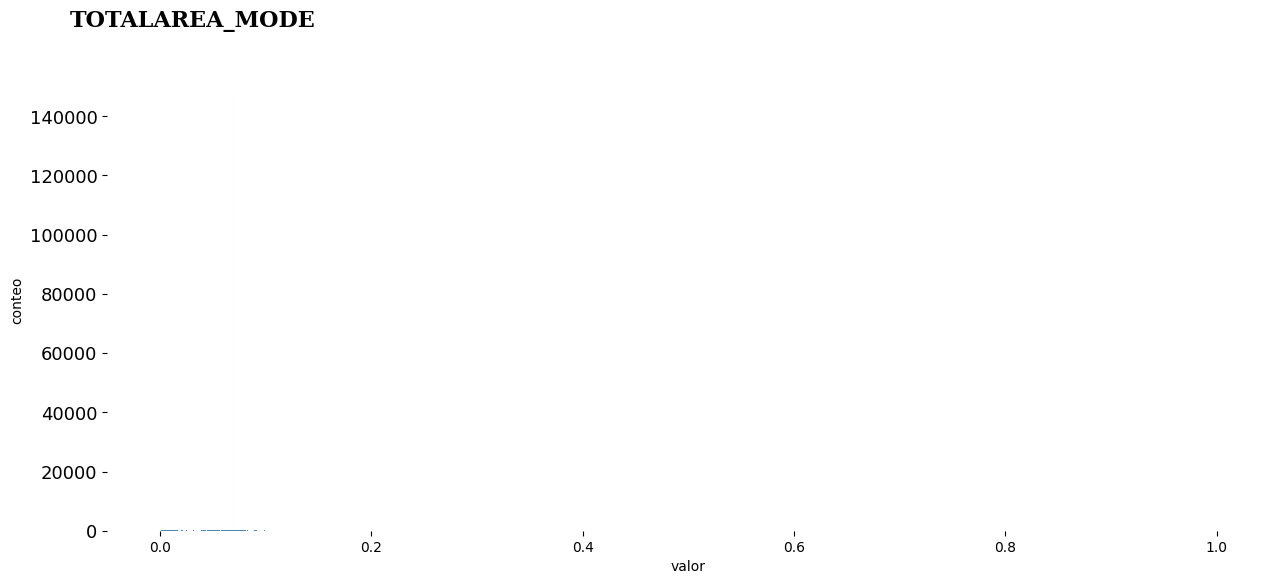

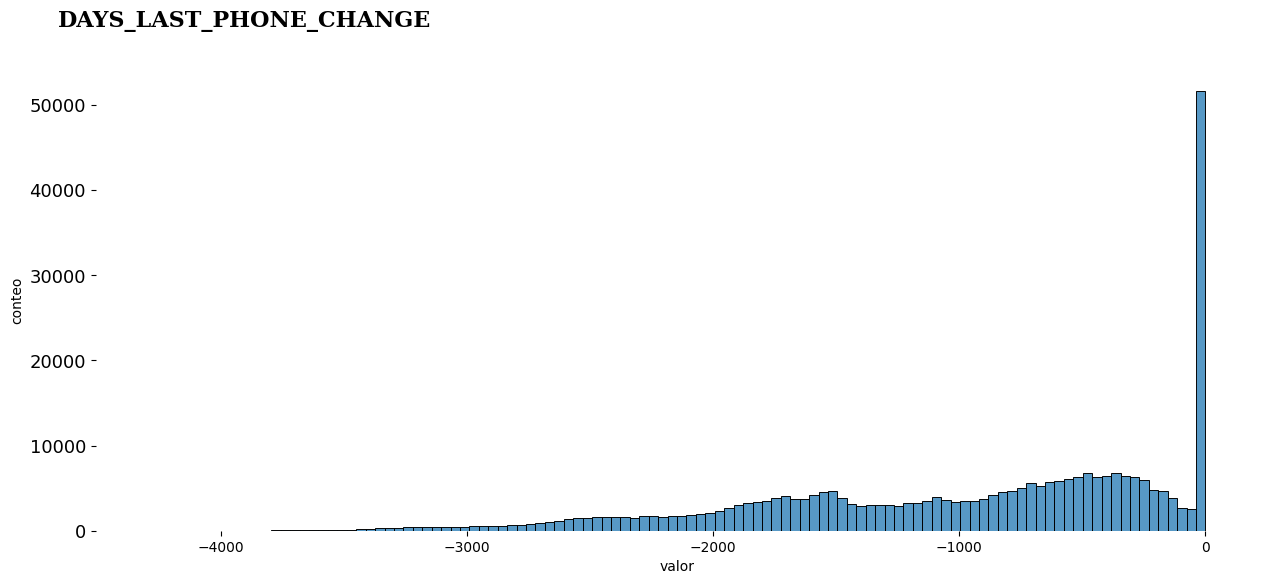

In [28]:
#Impresion de histogramas de columnas con mas de 100 valores únicos
print("Histogramas del conjunto de datos")
for h in e2:
  fig, ax = plt.subplots(1, 1, figsize=(15, 6))
  sns.histplot(app_train[h])
  fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel('valor', fontsize=10)
  plt.ylabel('conteo', fontsize=10)
  plt.yticks(fontsize=13)
  plt.box(False)

<ipython-input-29-9b75a21cb014>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1, figsize=(15, 6))


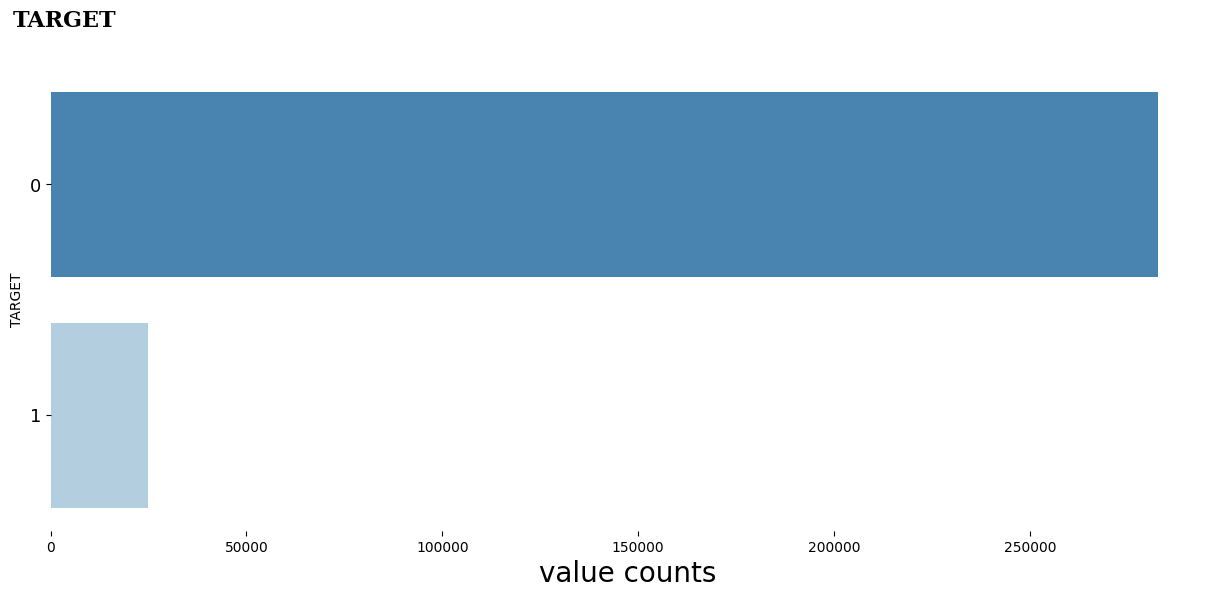

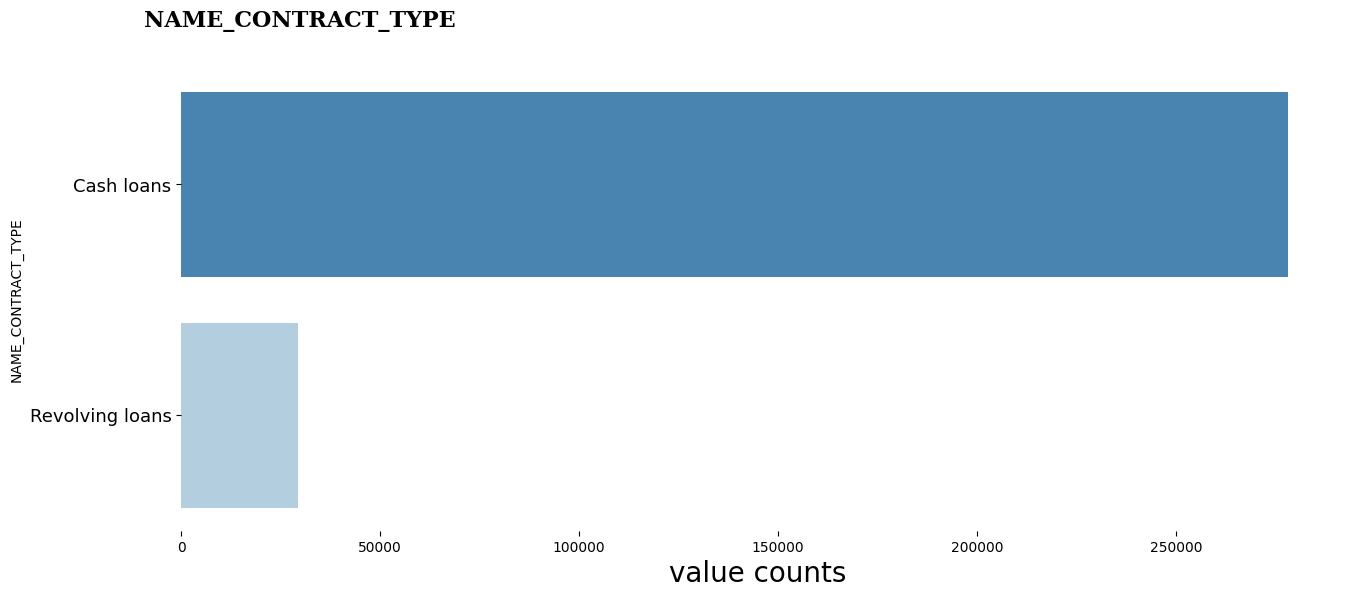

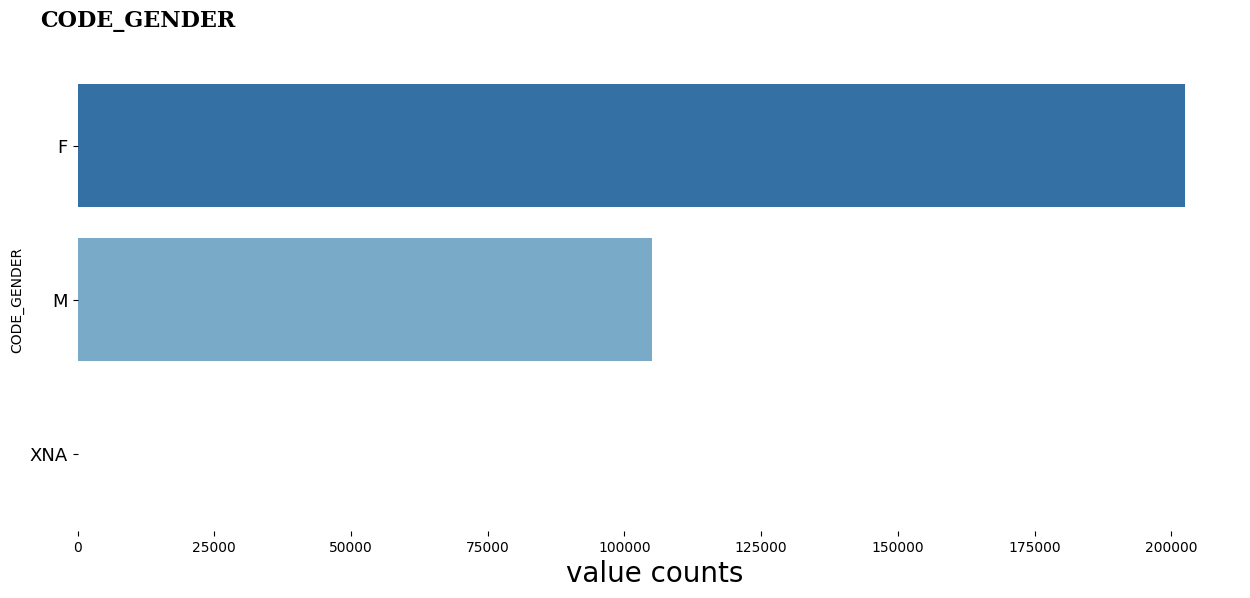

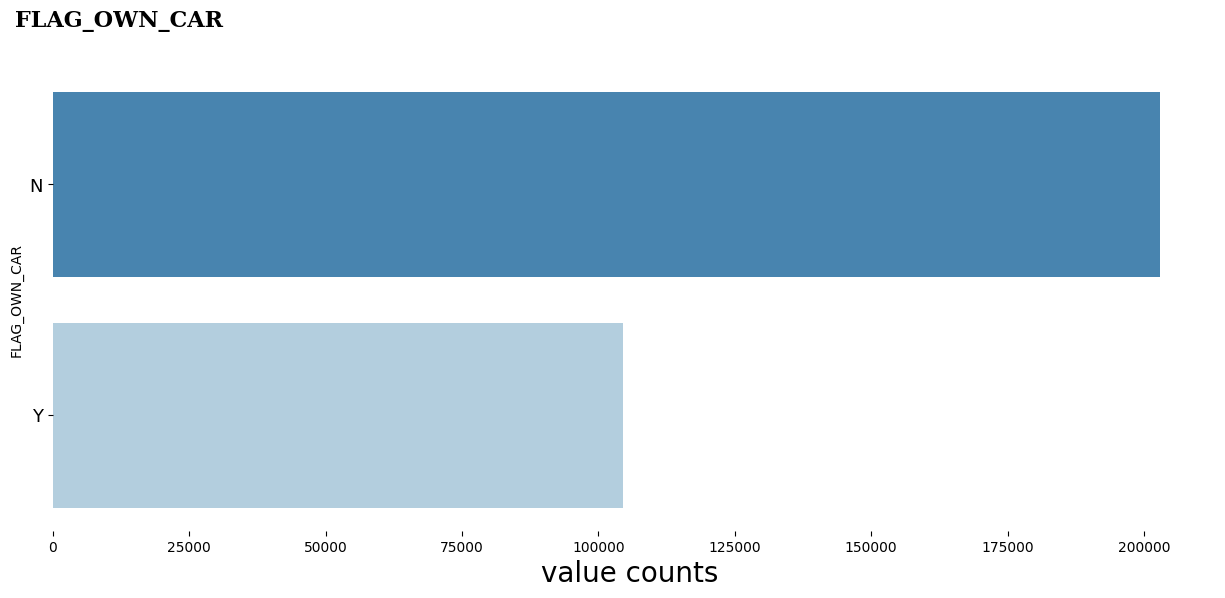

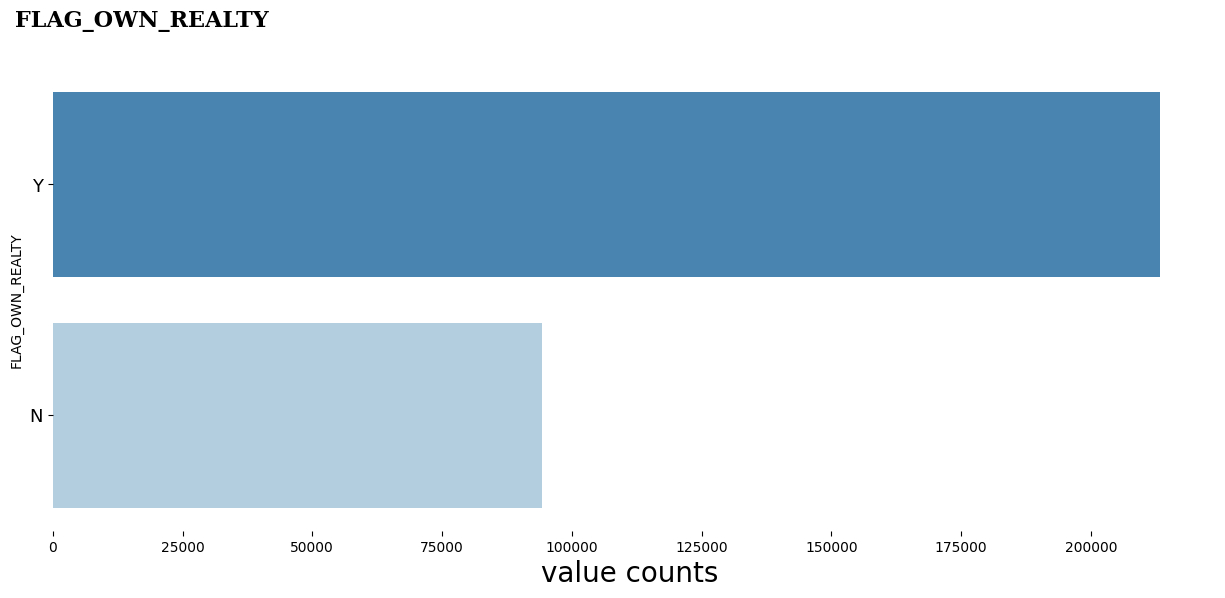

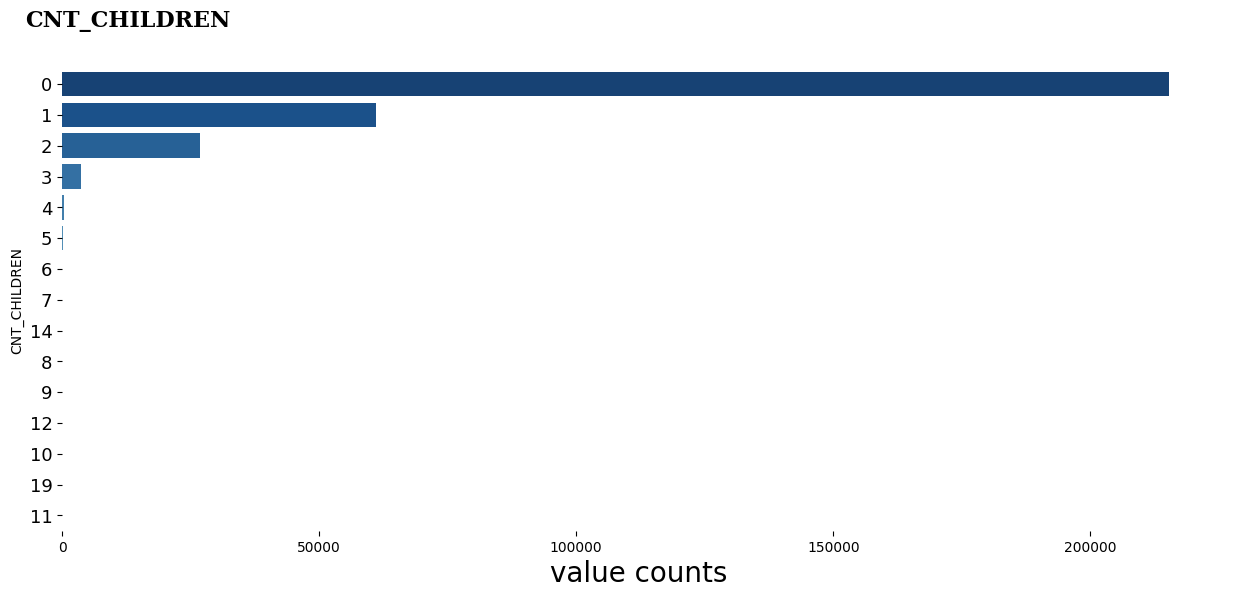

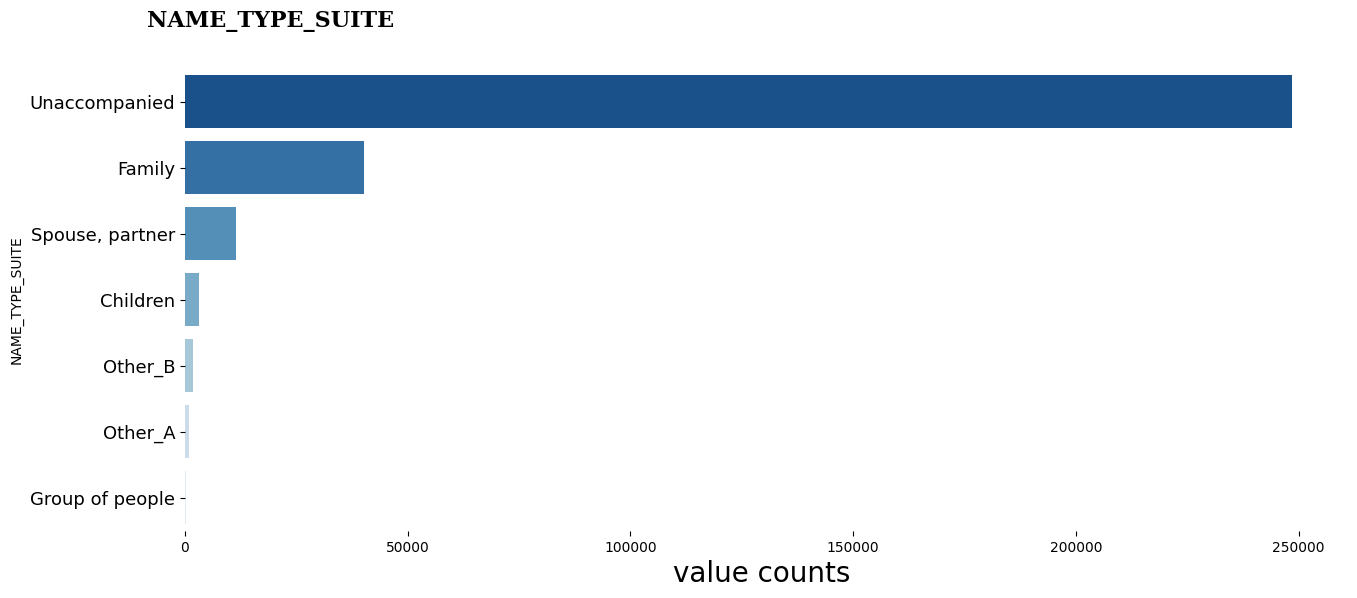

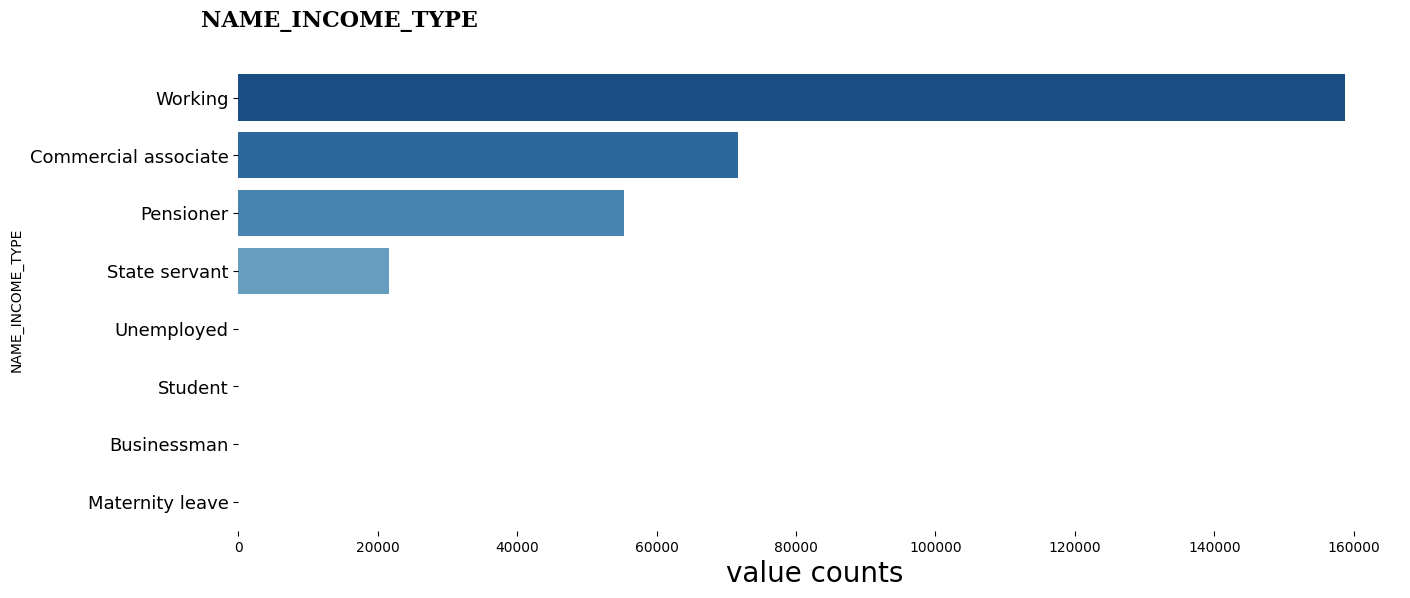

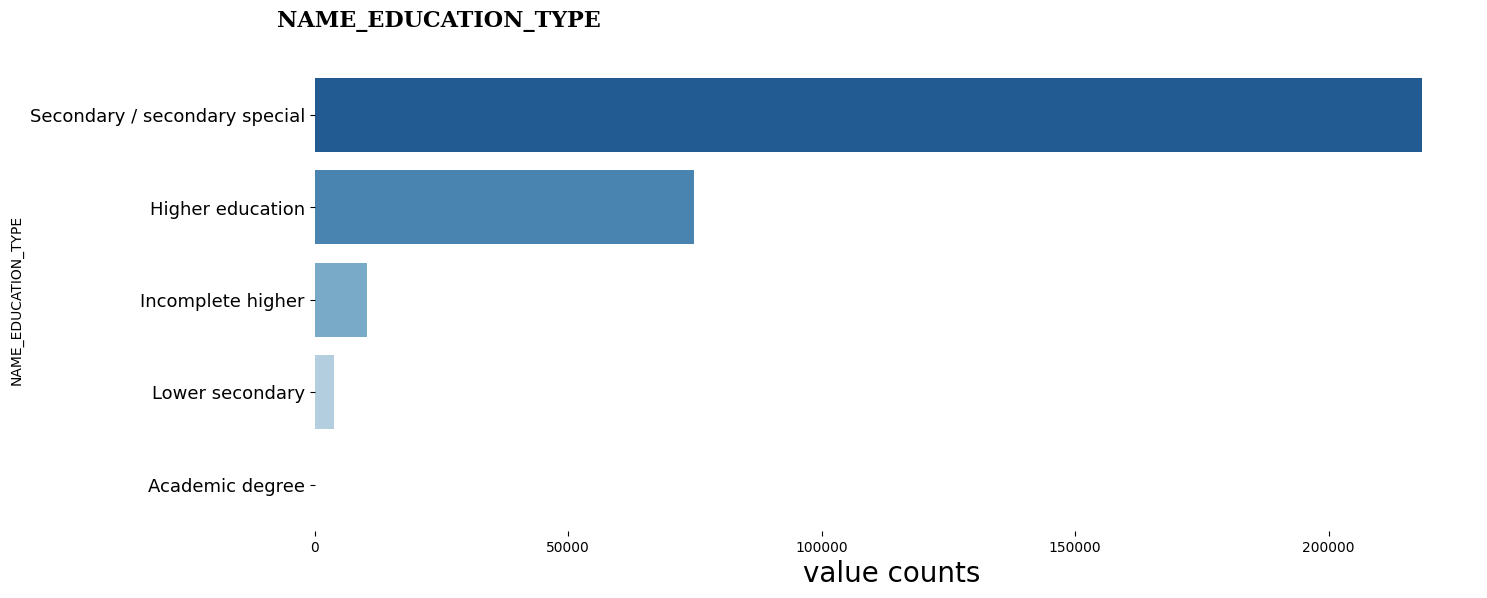

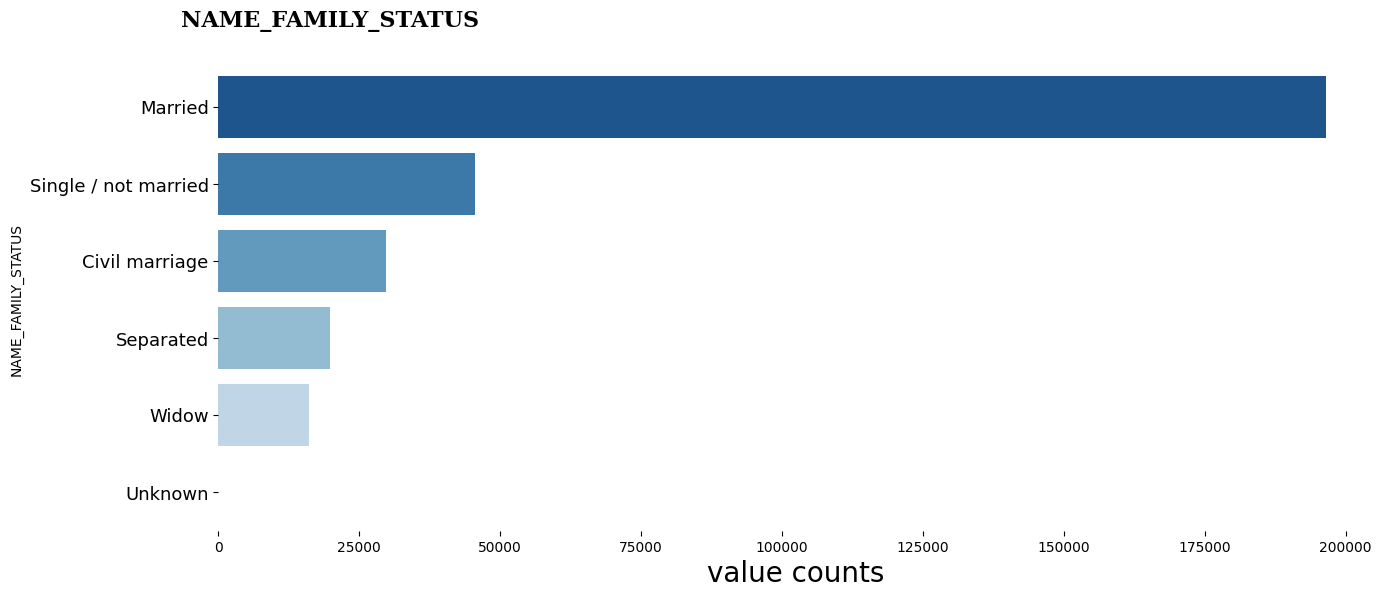

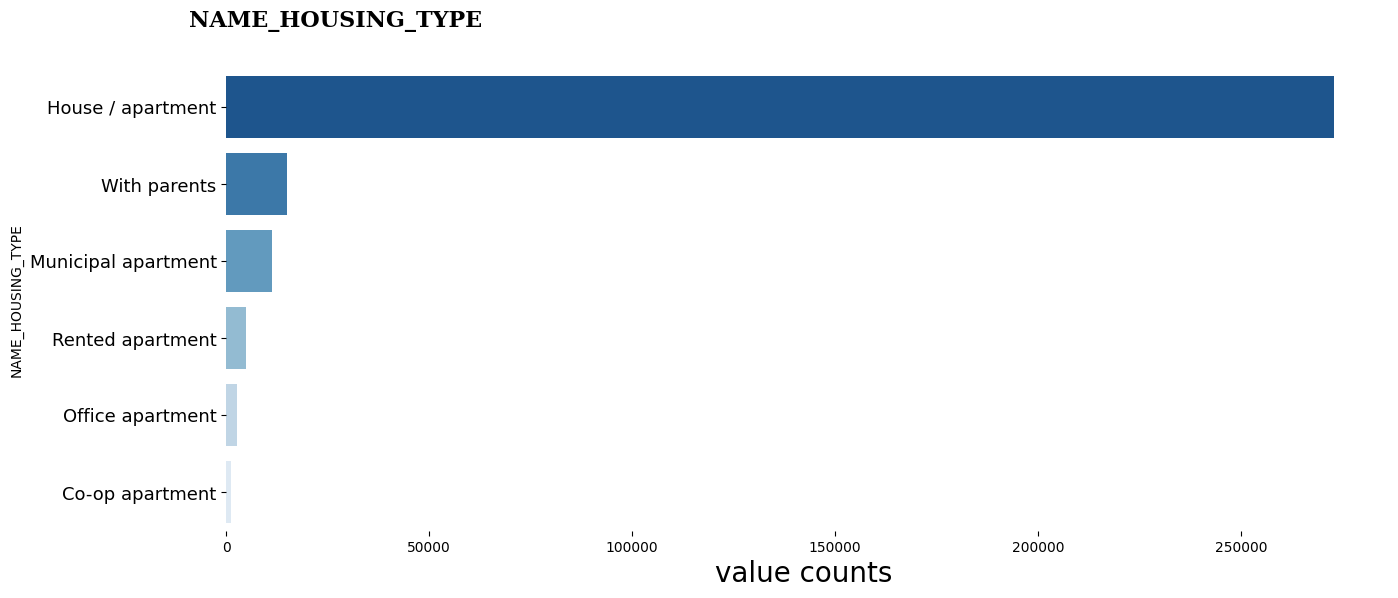

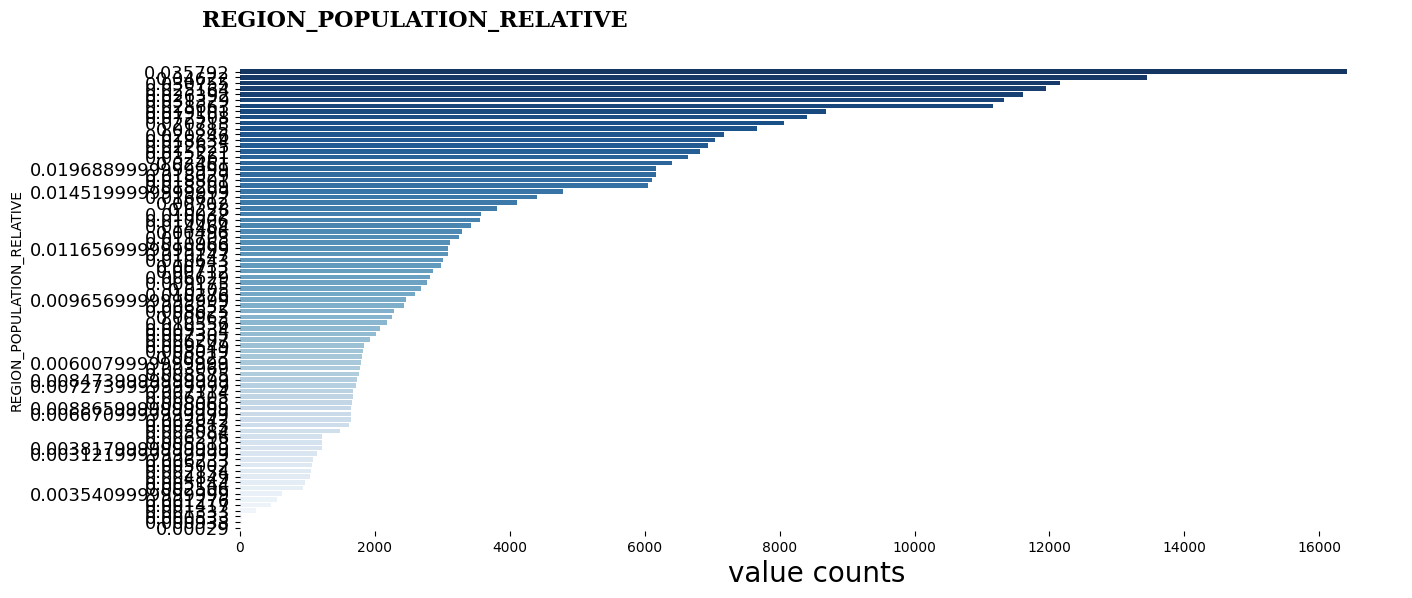

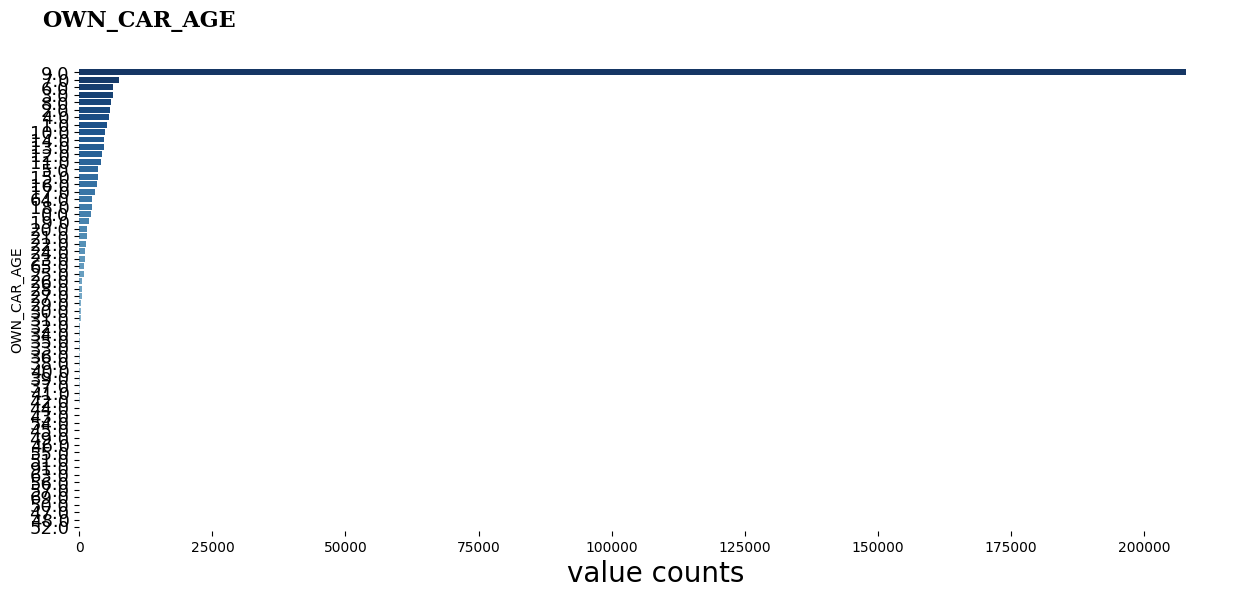

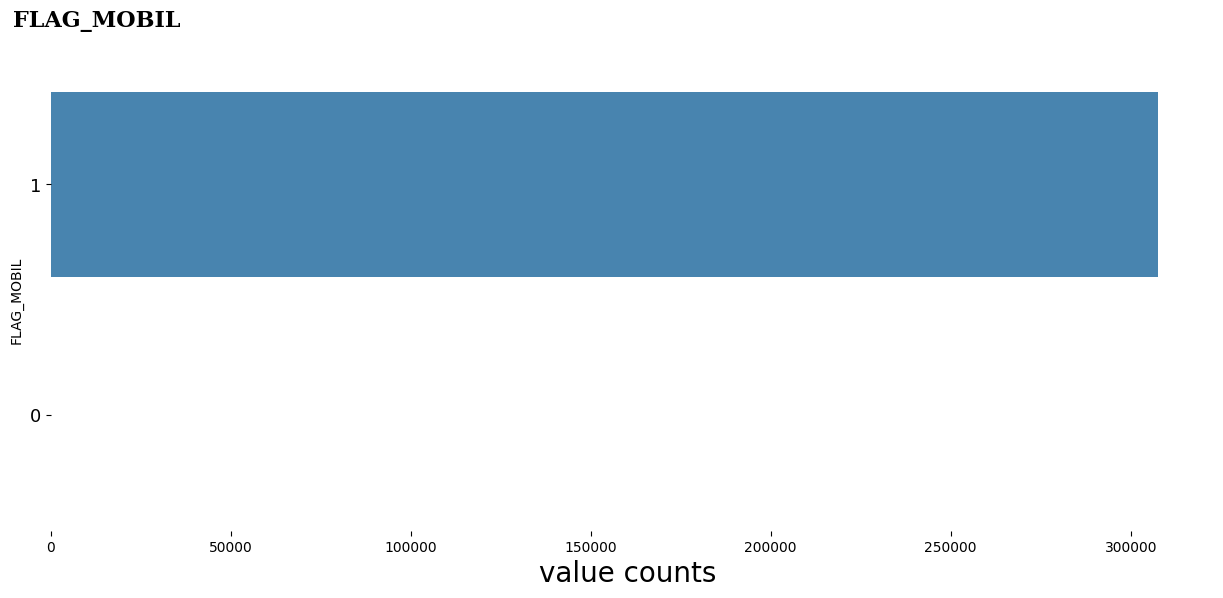

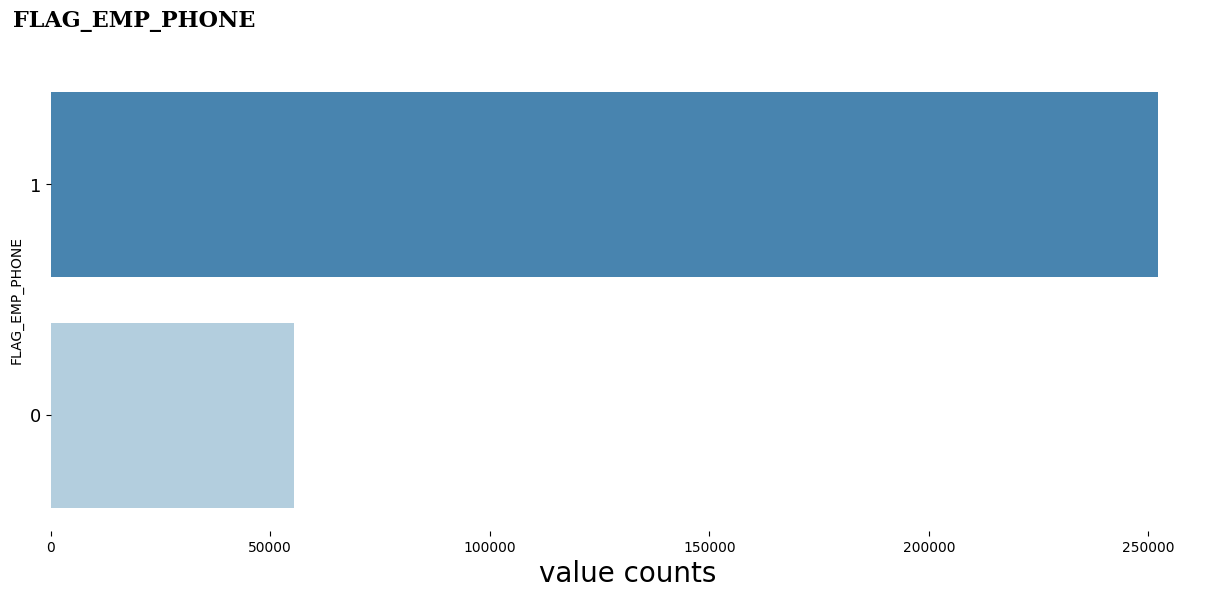

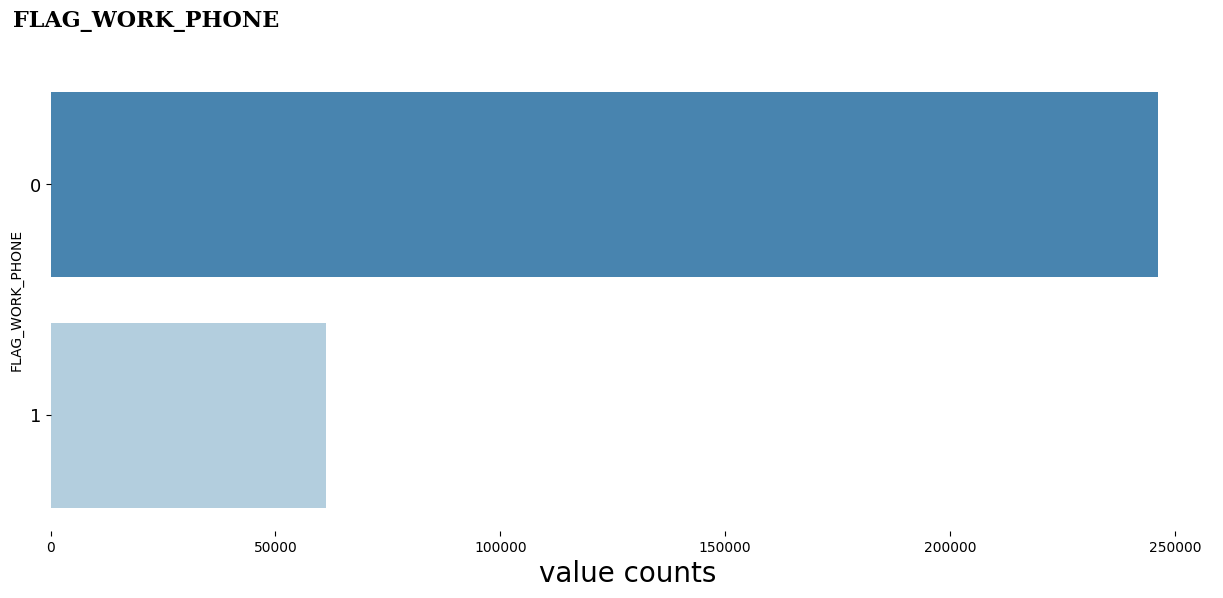

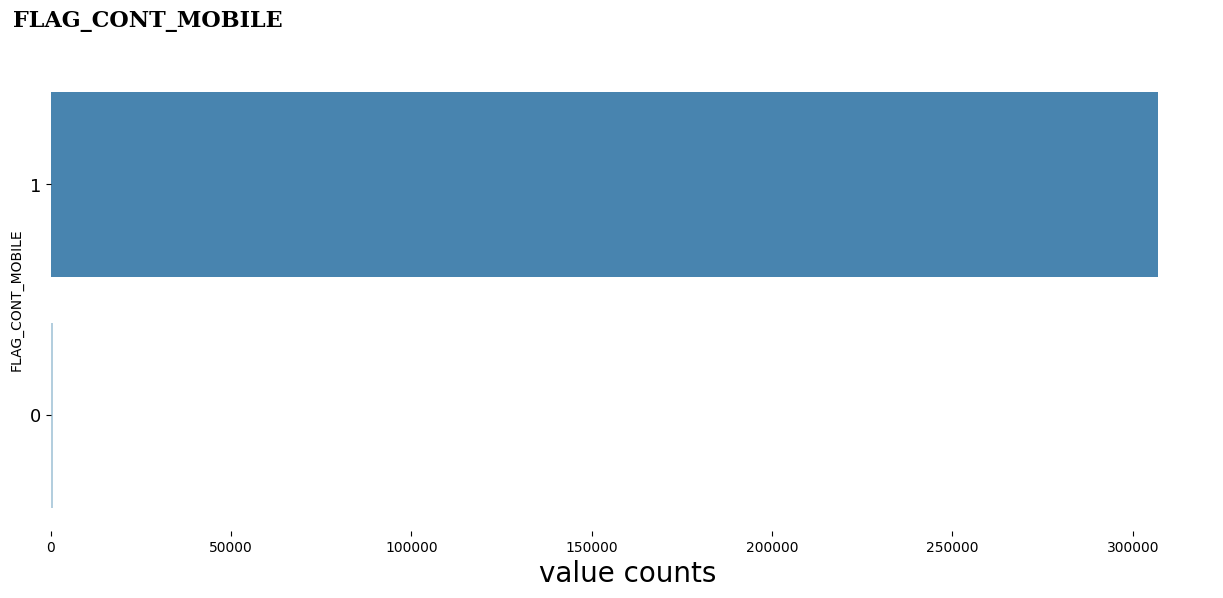

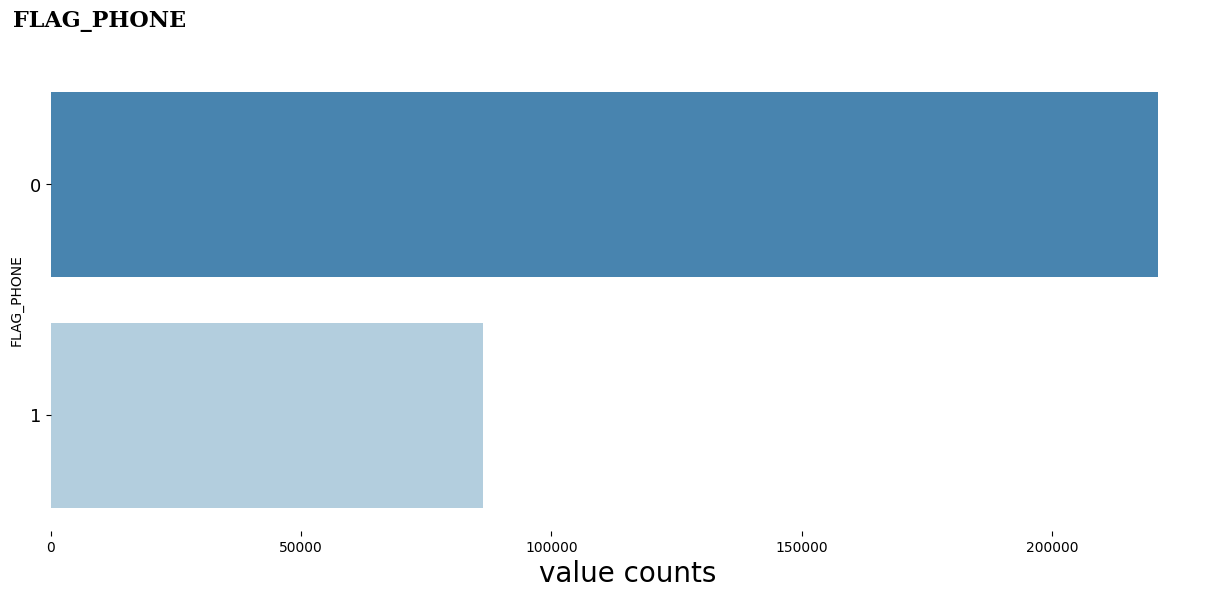

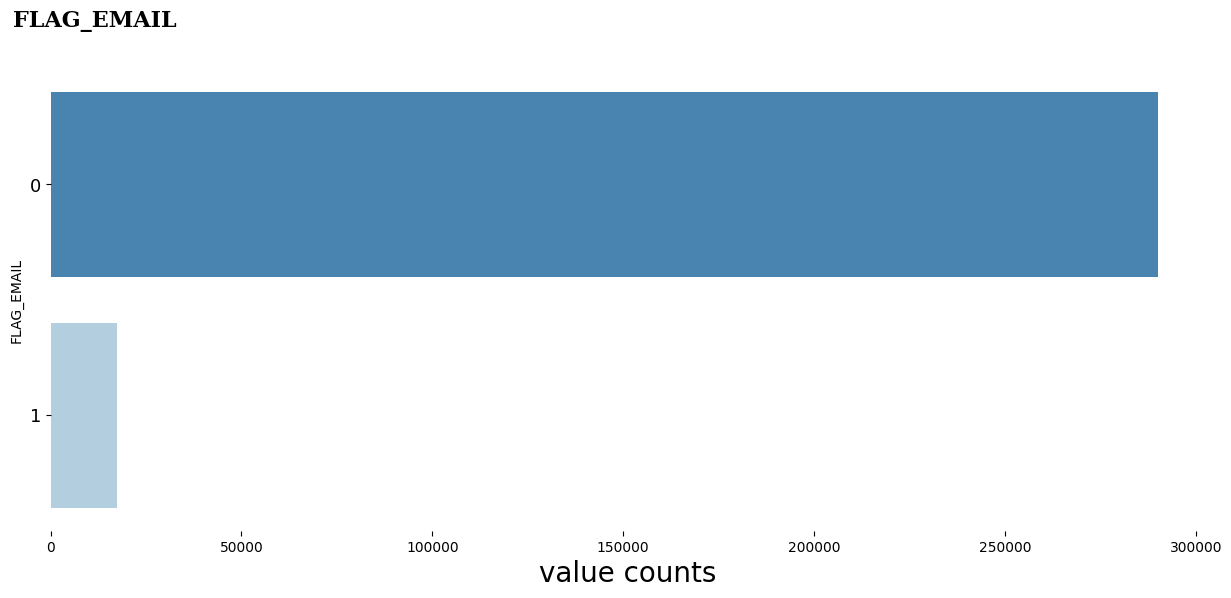

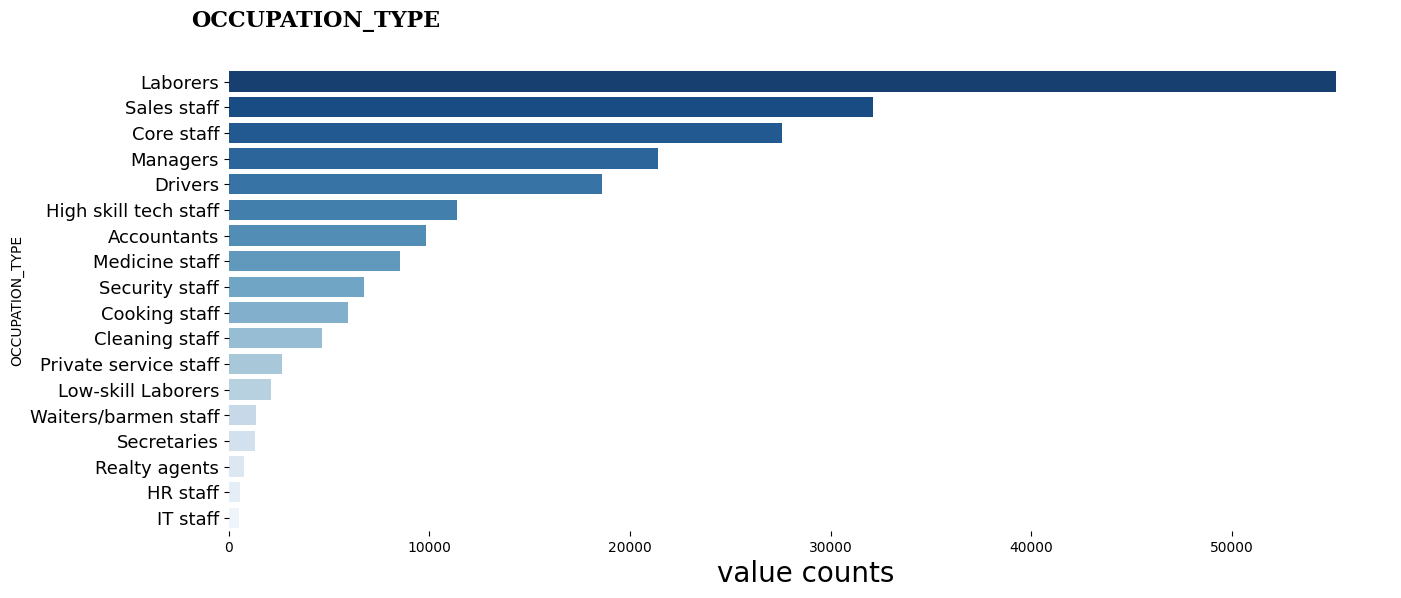

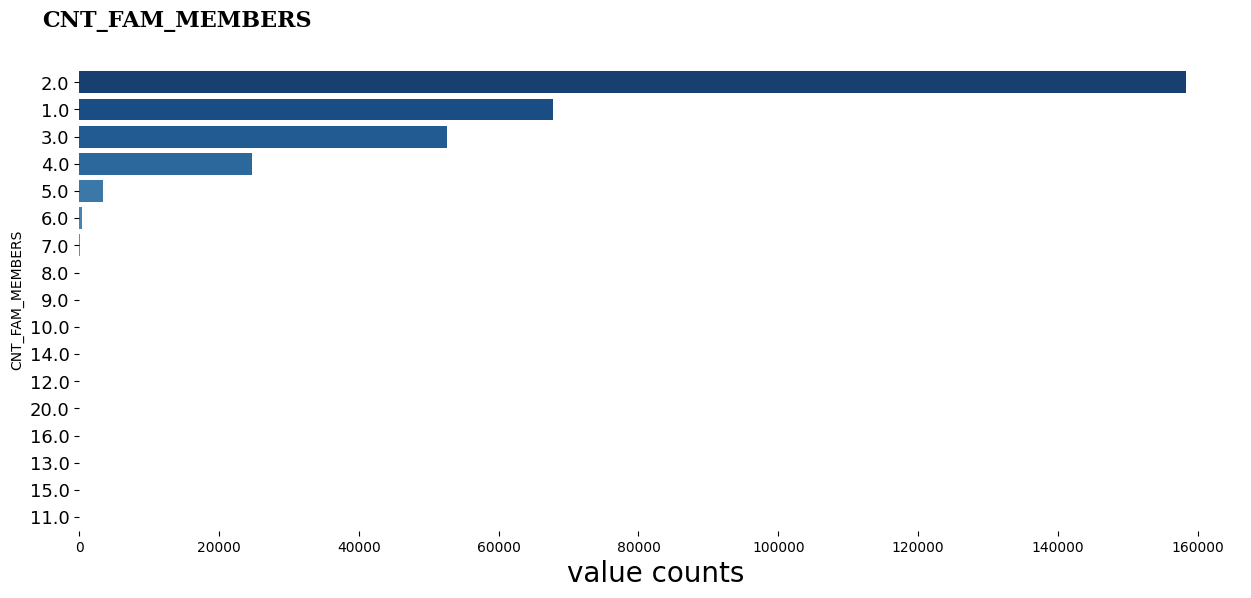

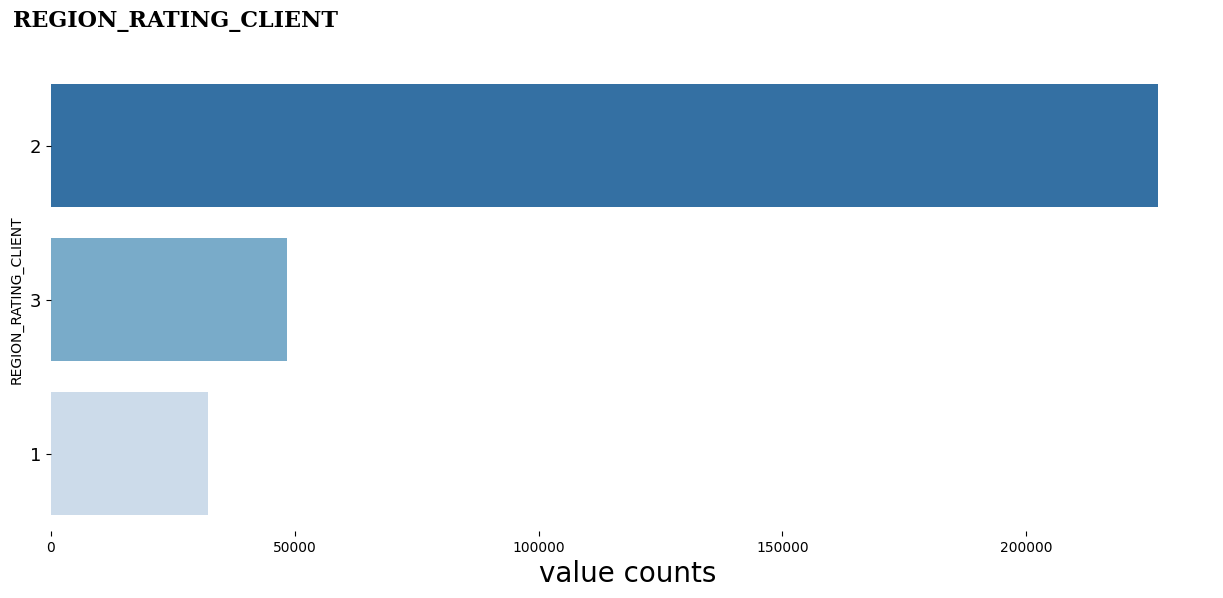

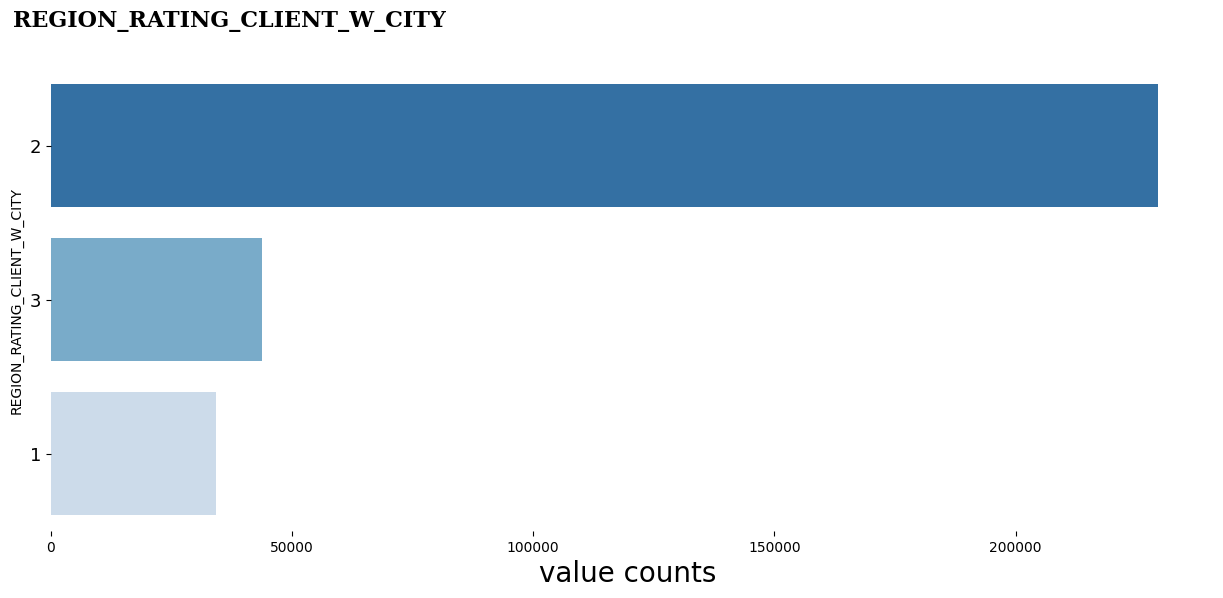

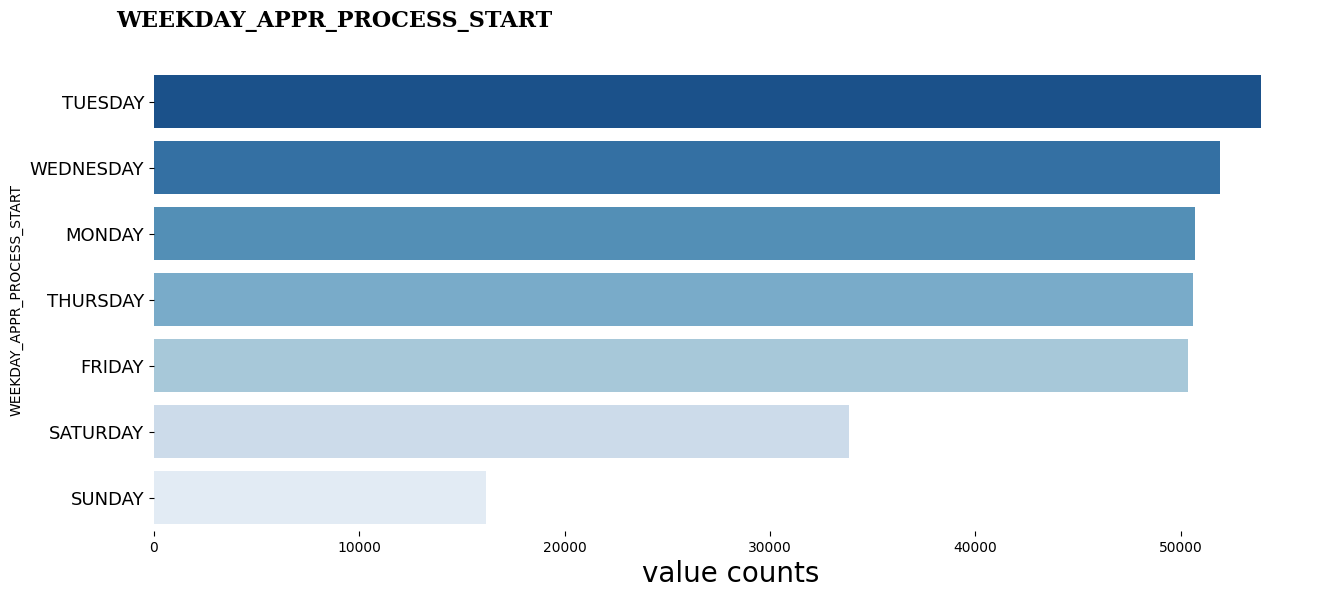

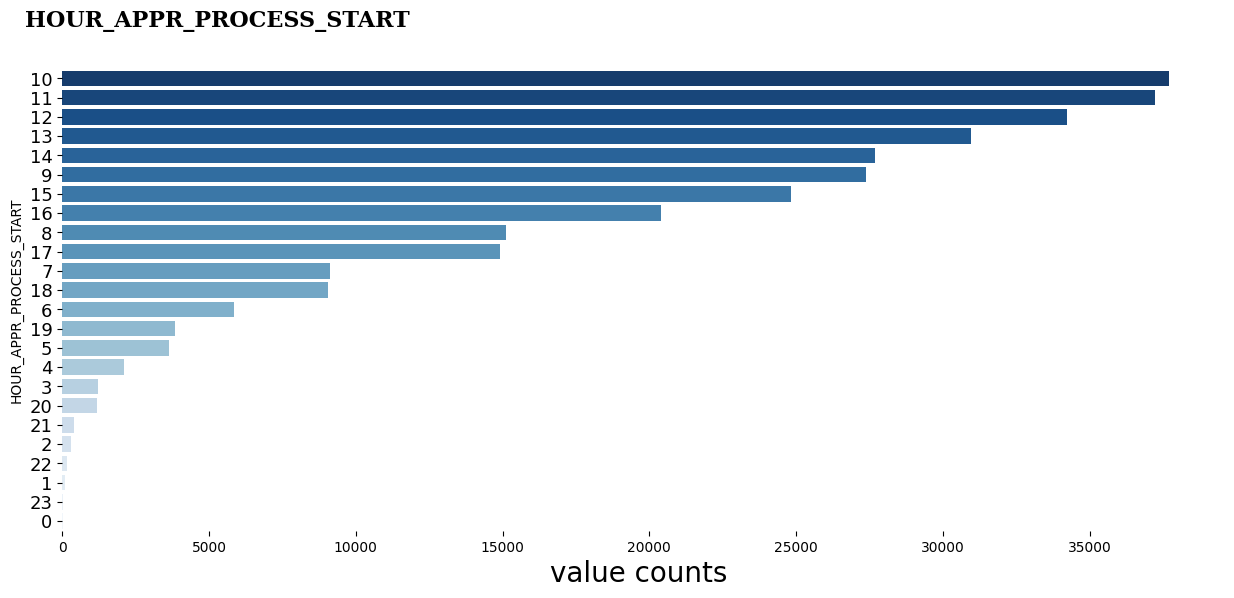

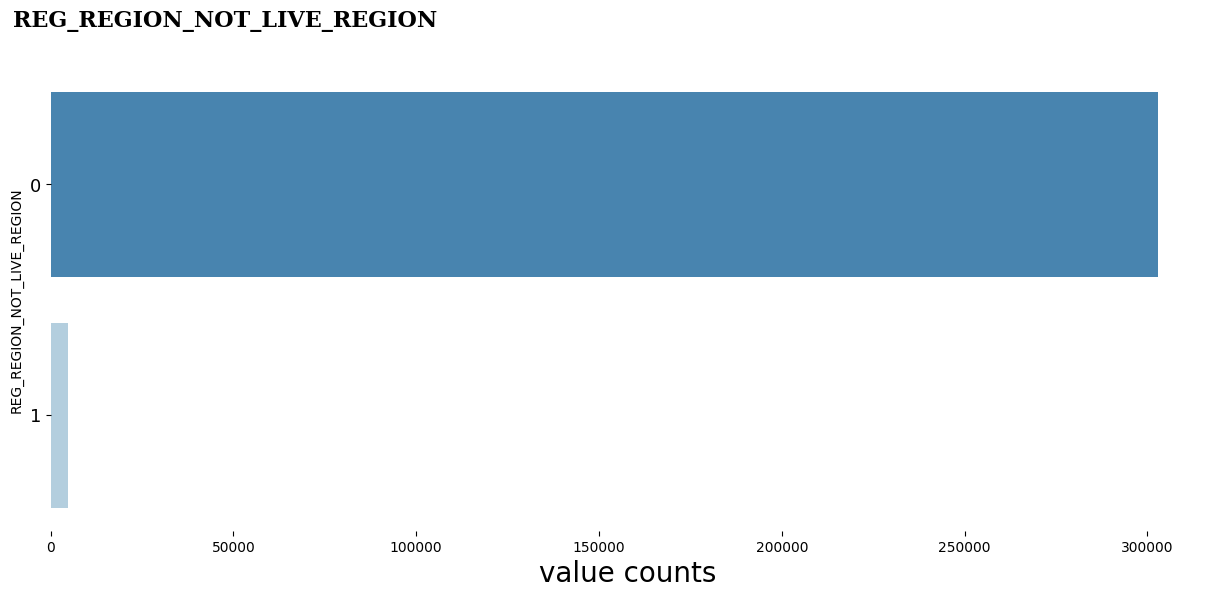

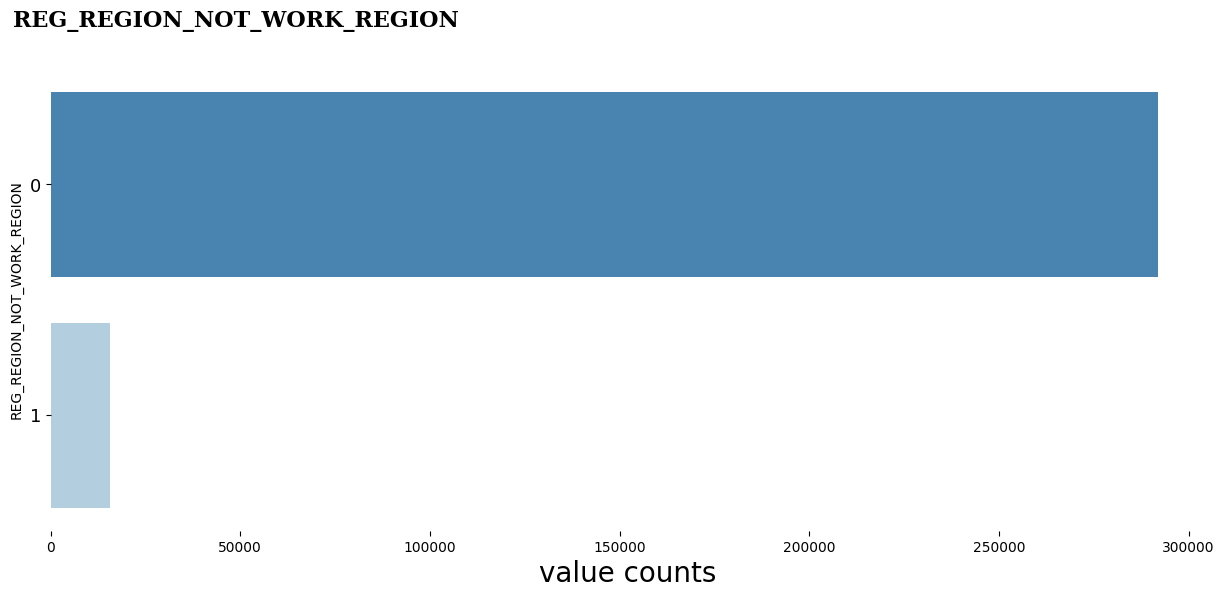

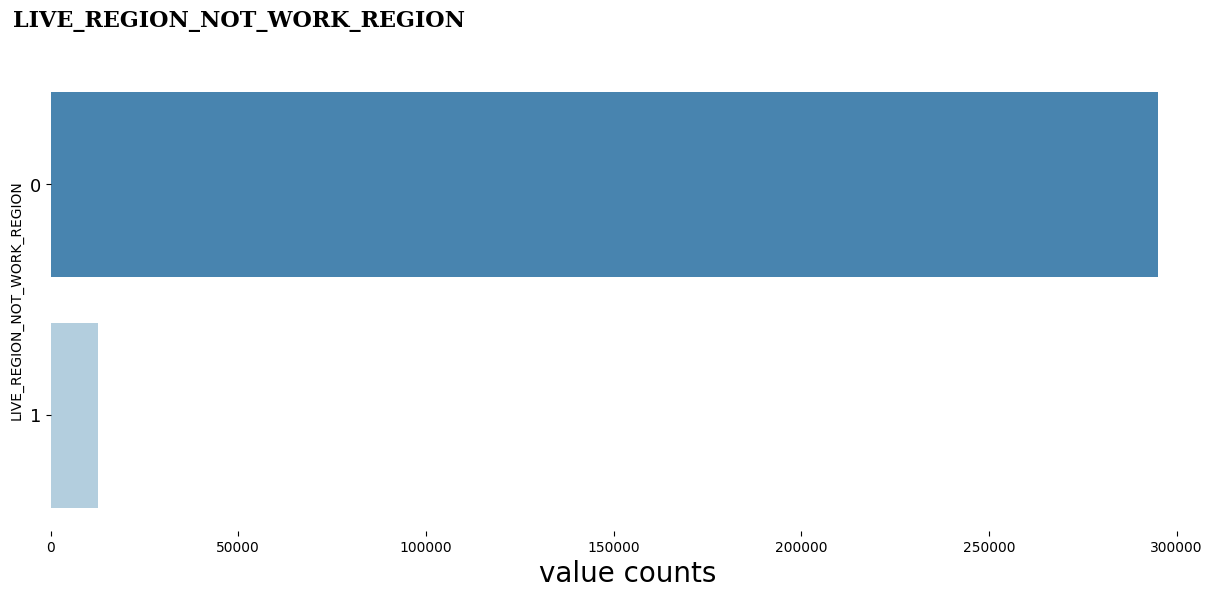

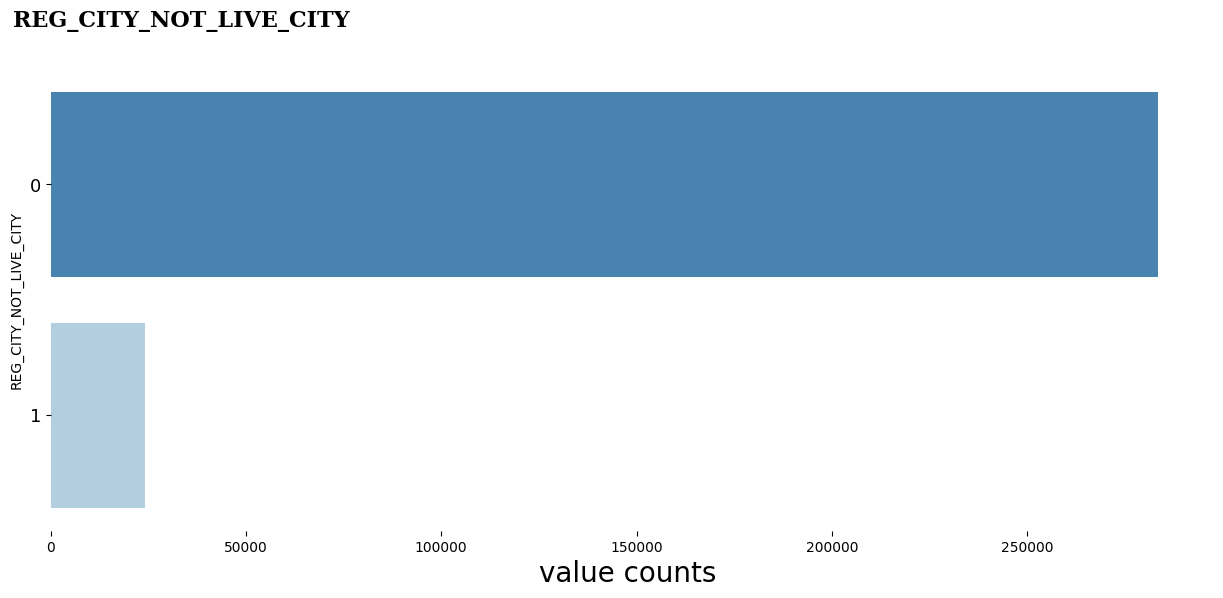

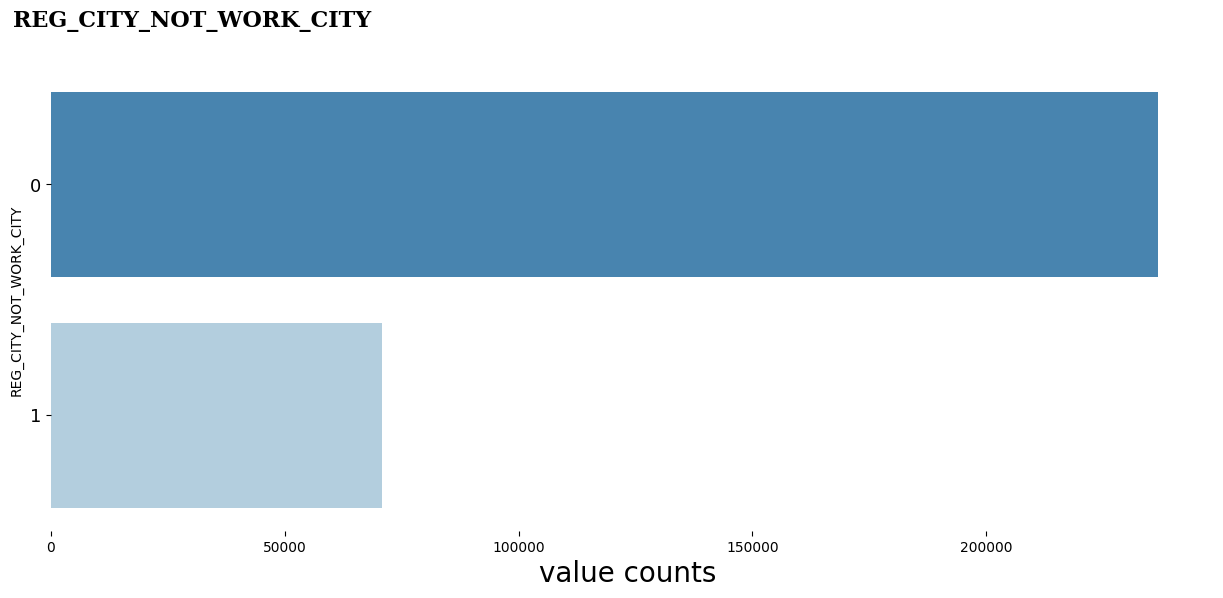

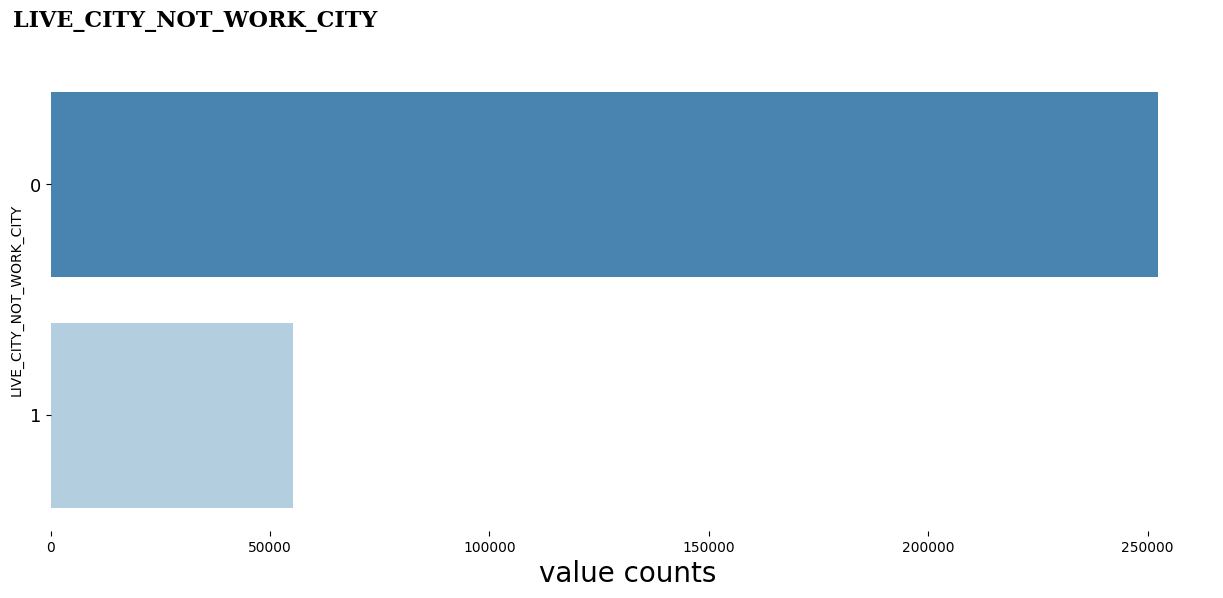

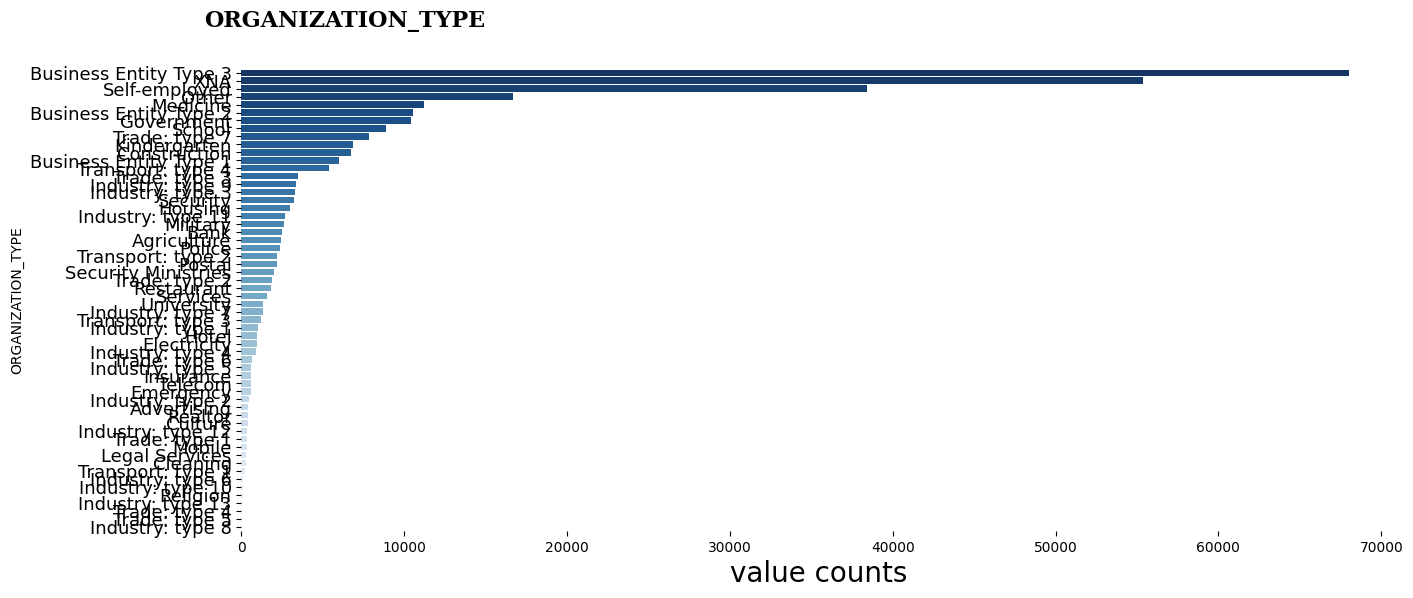

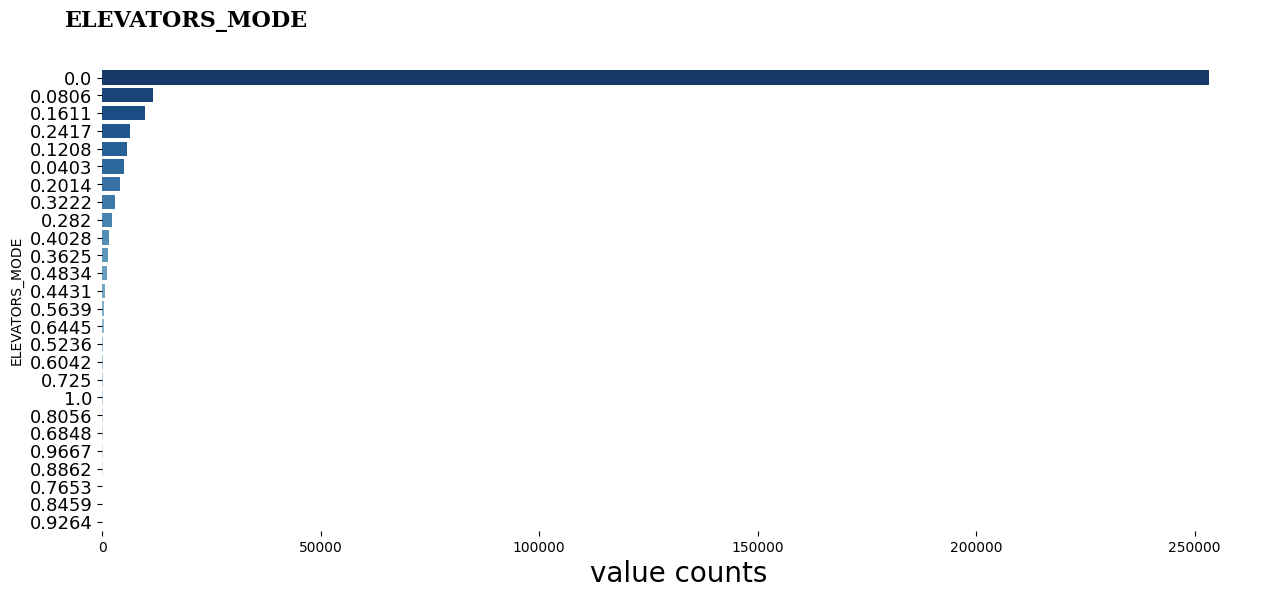

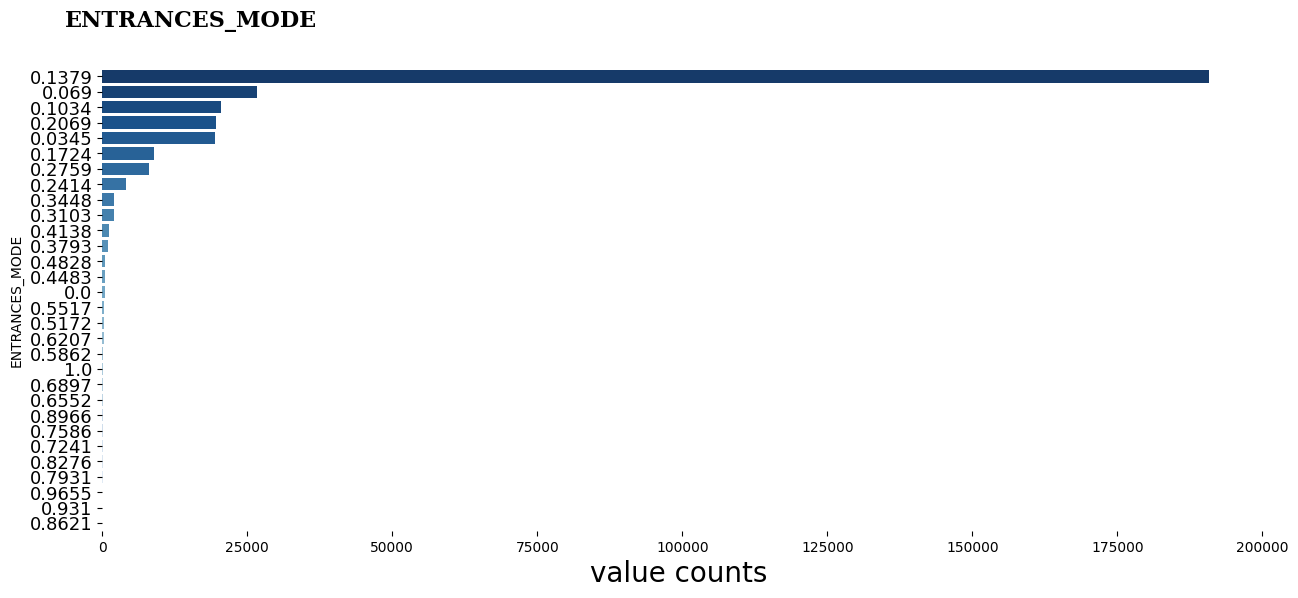

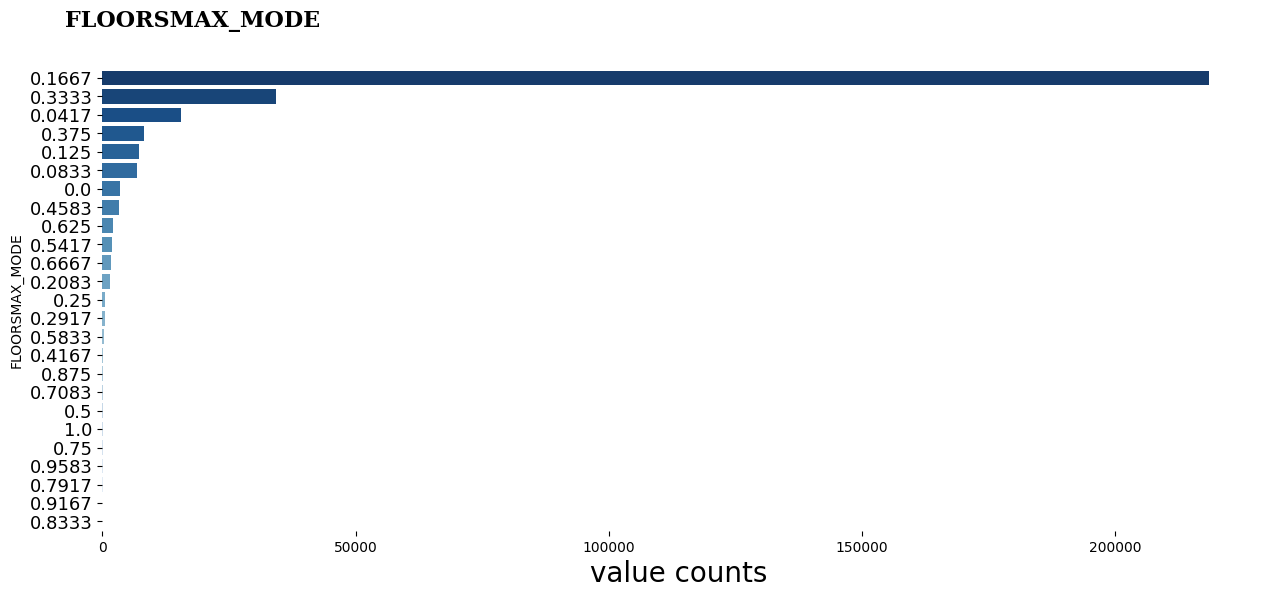

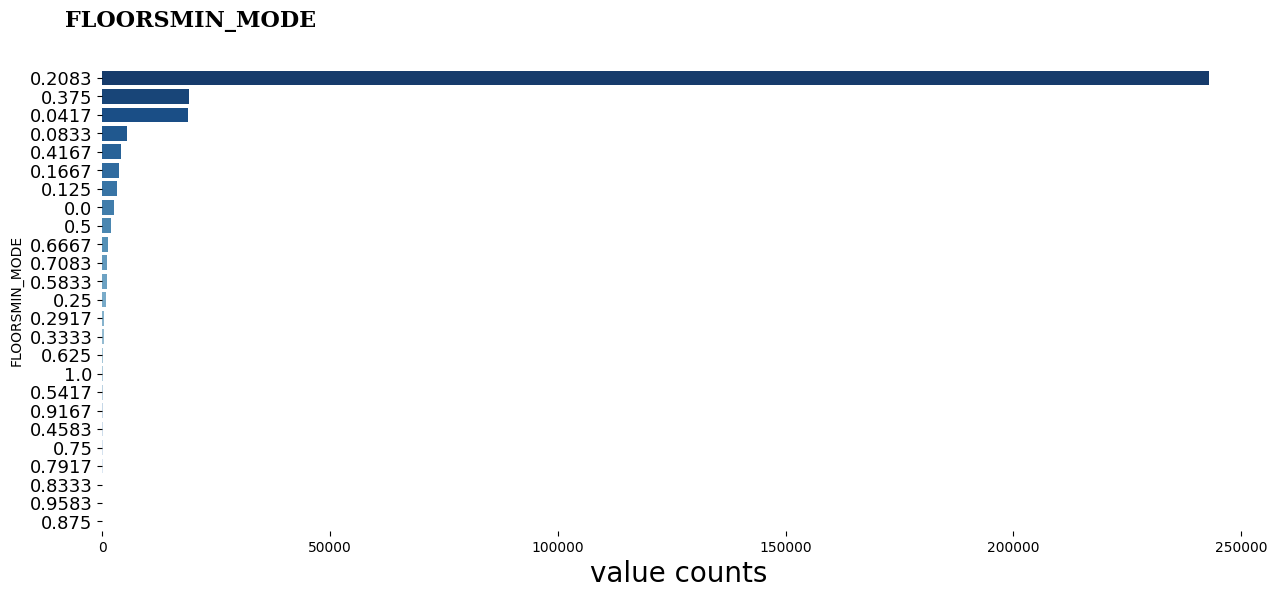

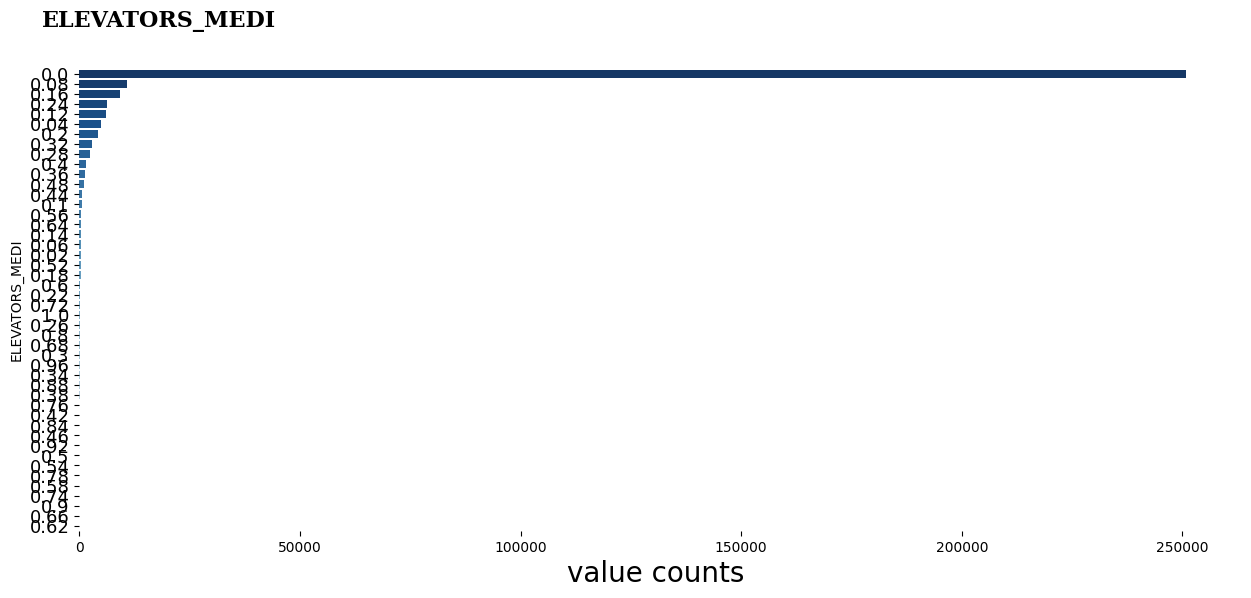

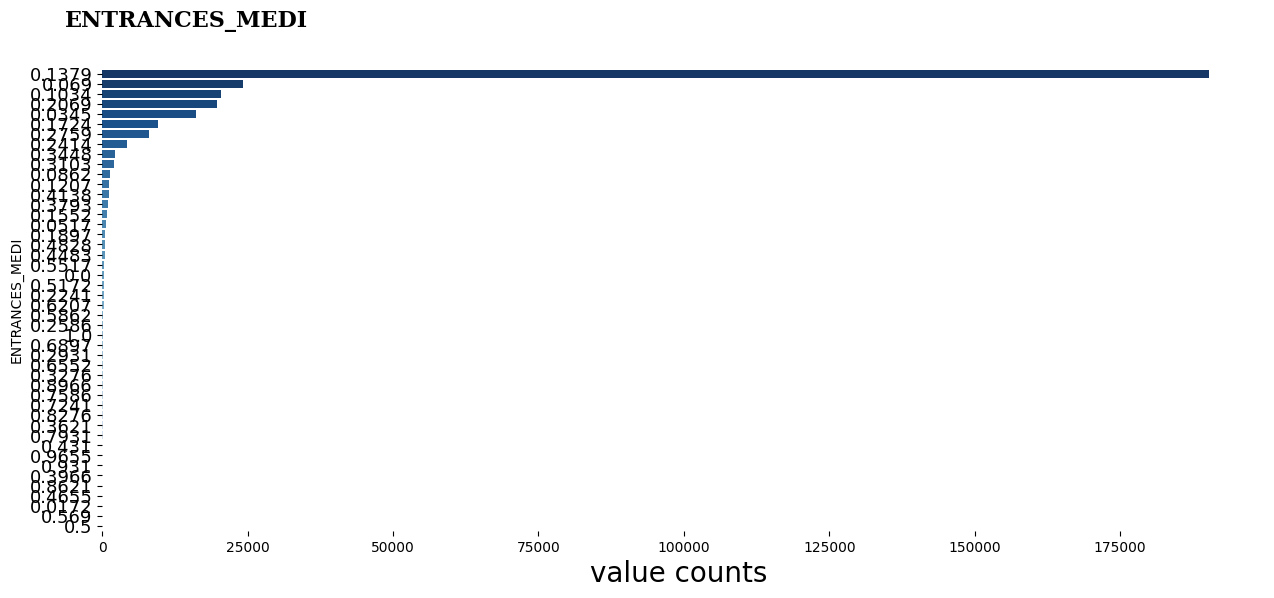

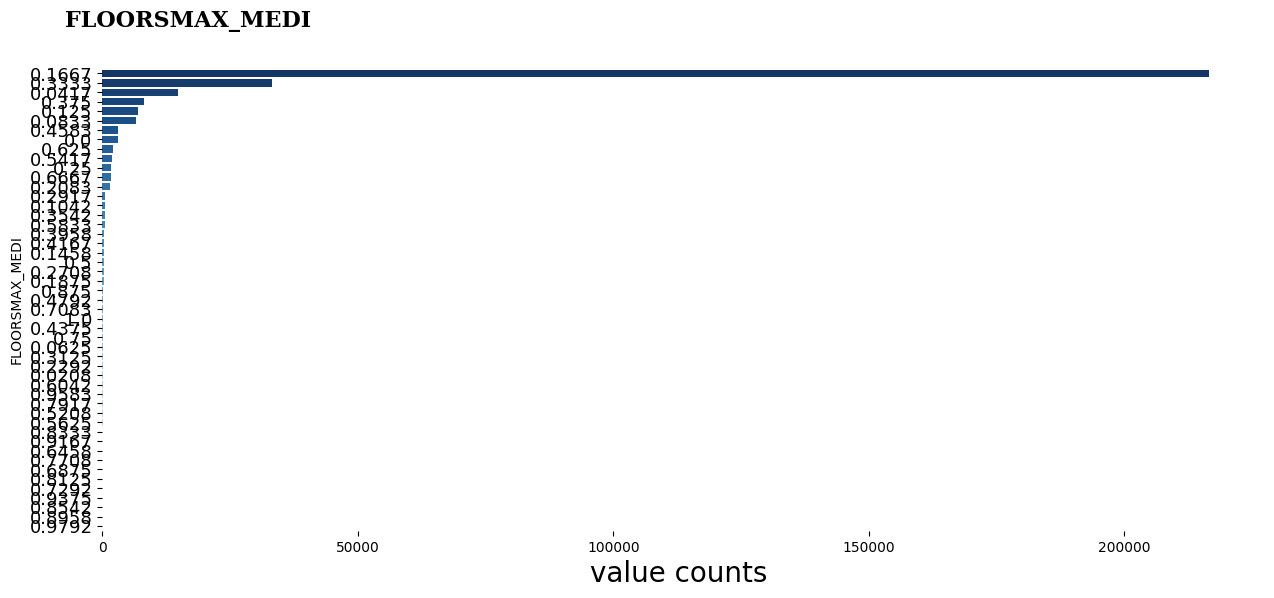

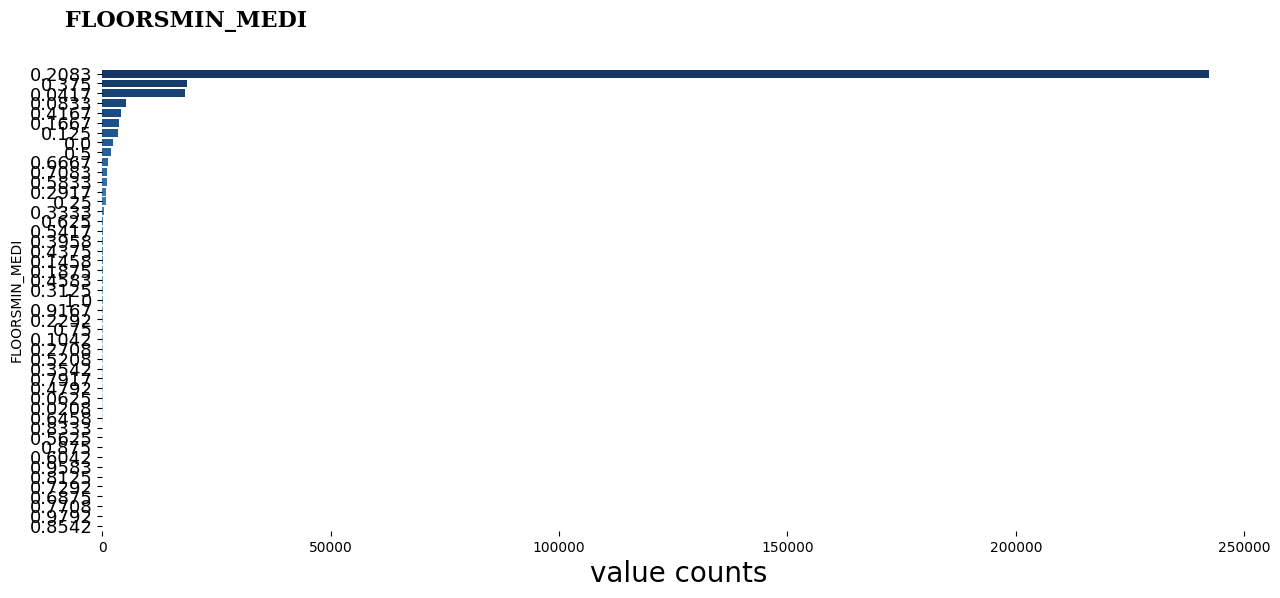

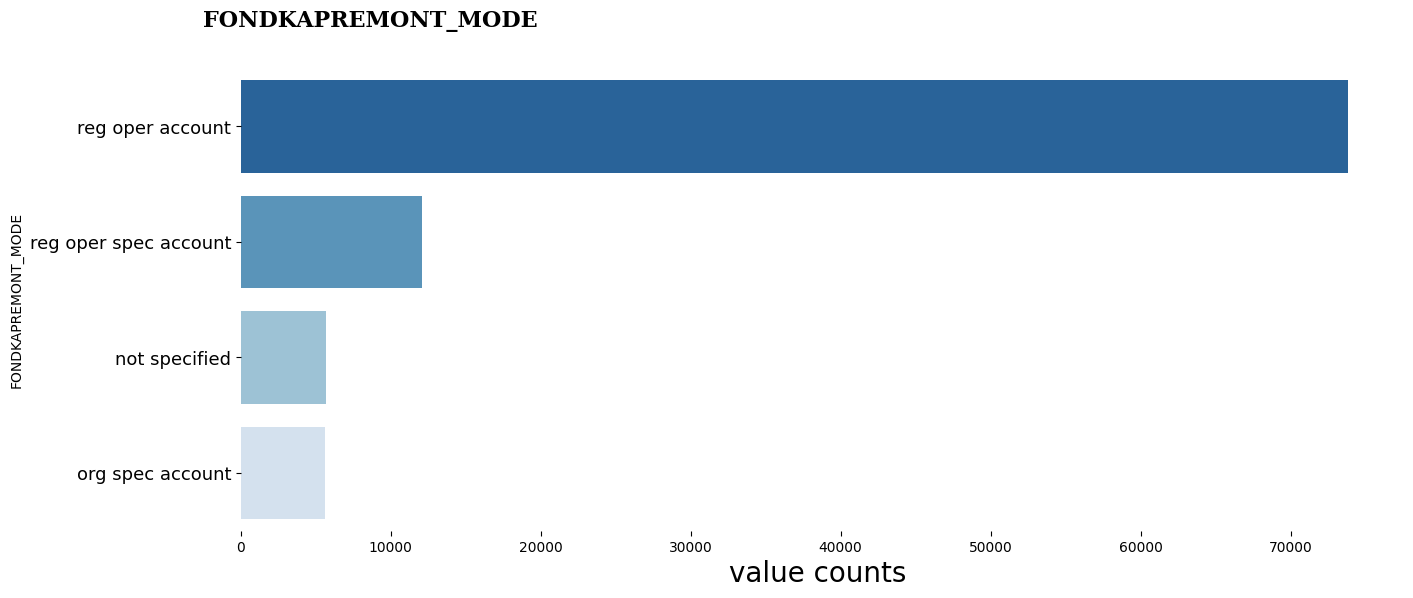

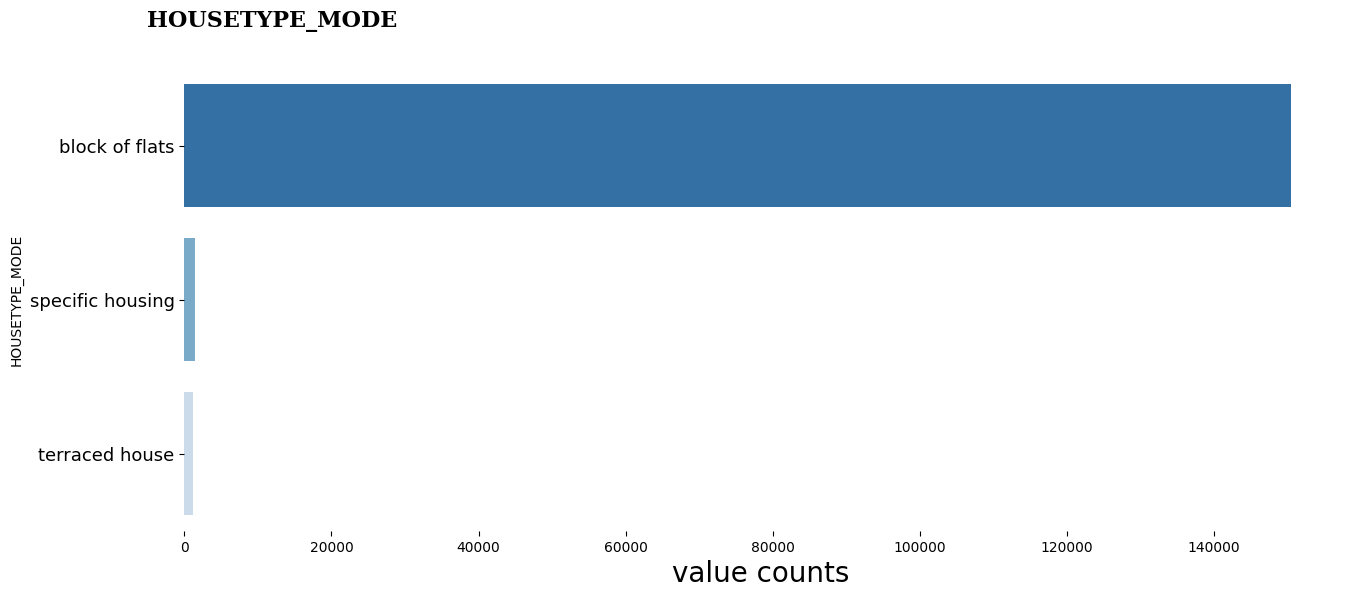

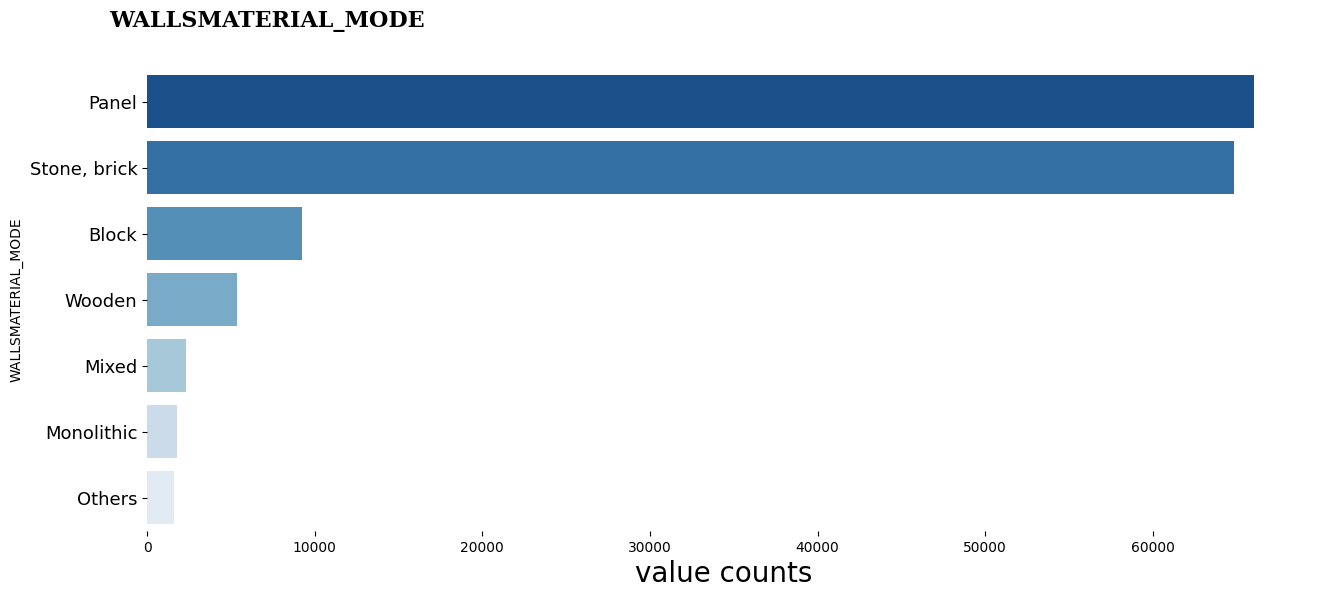

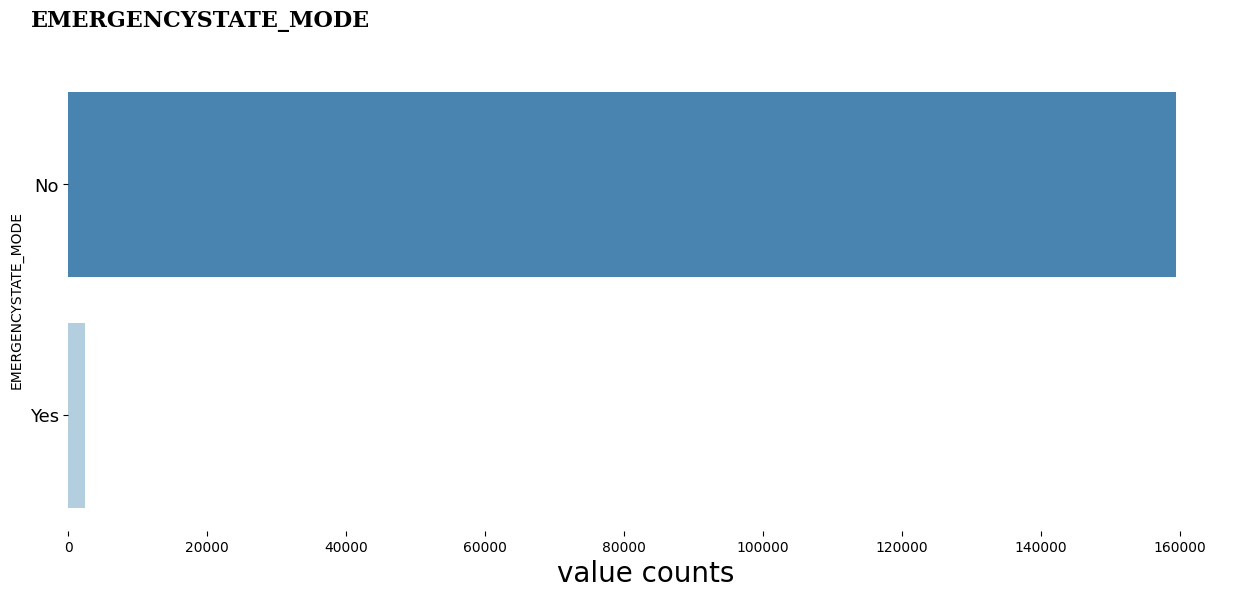

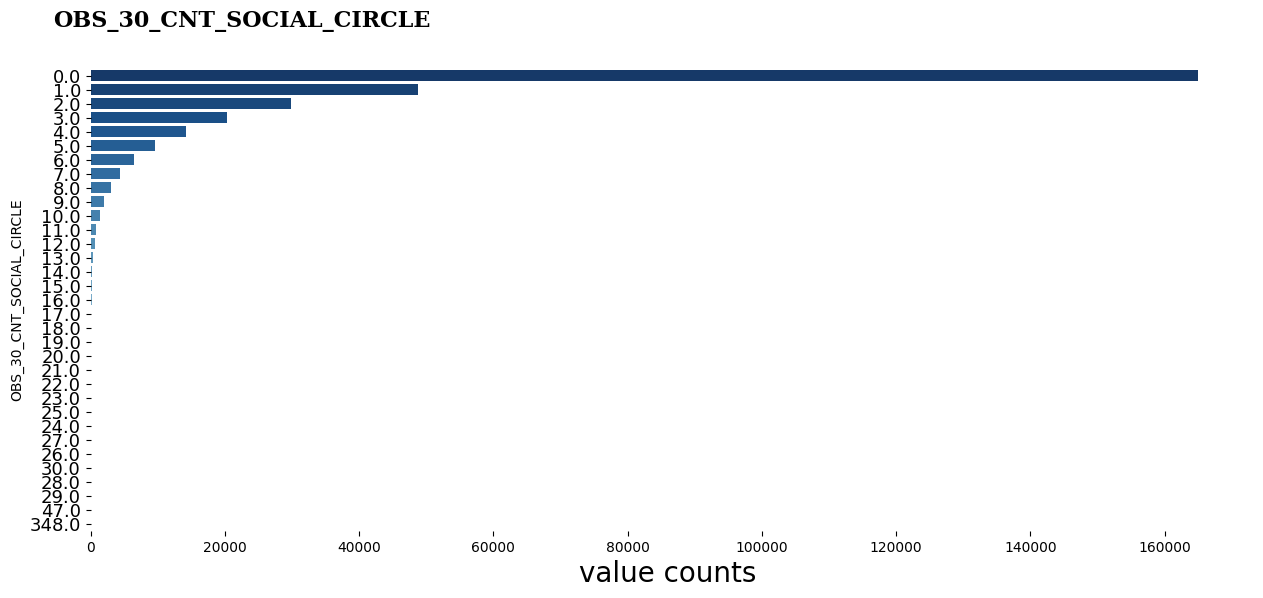

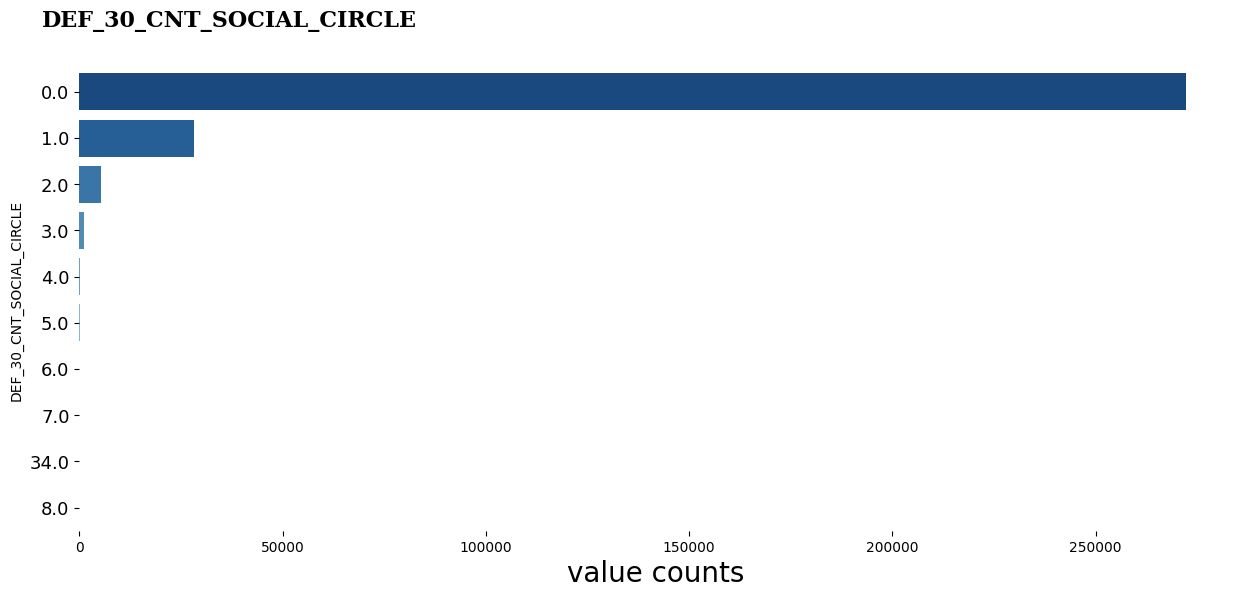

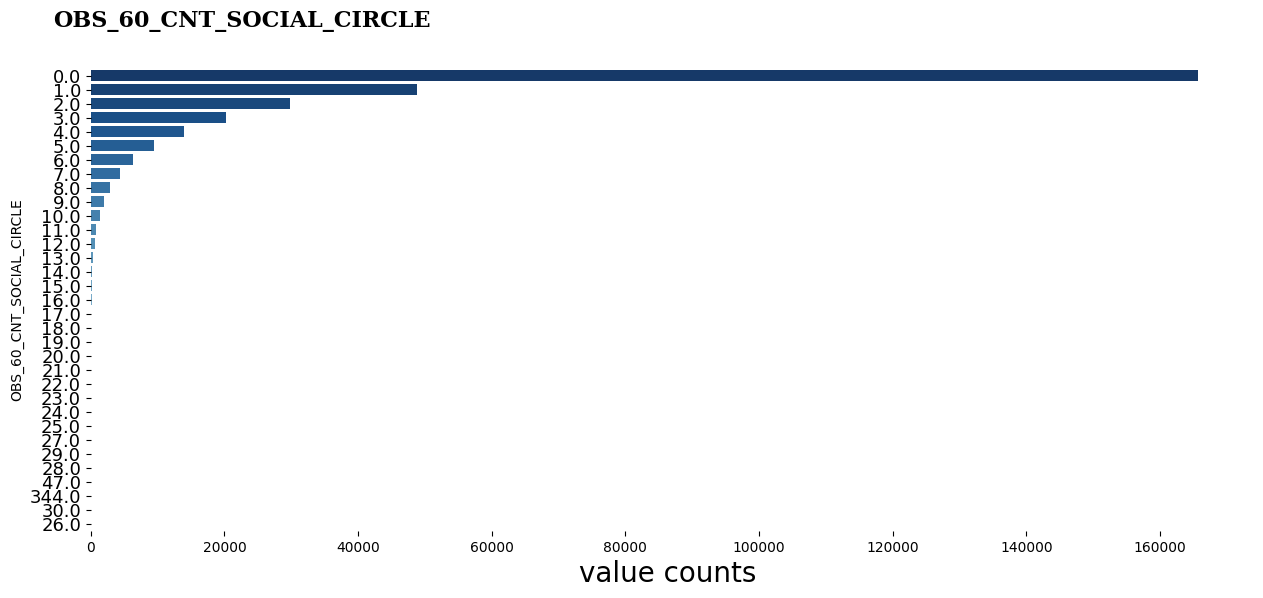

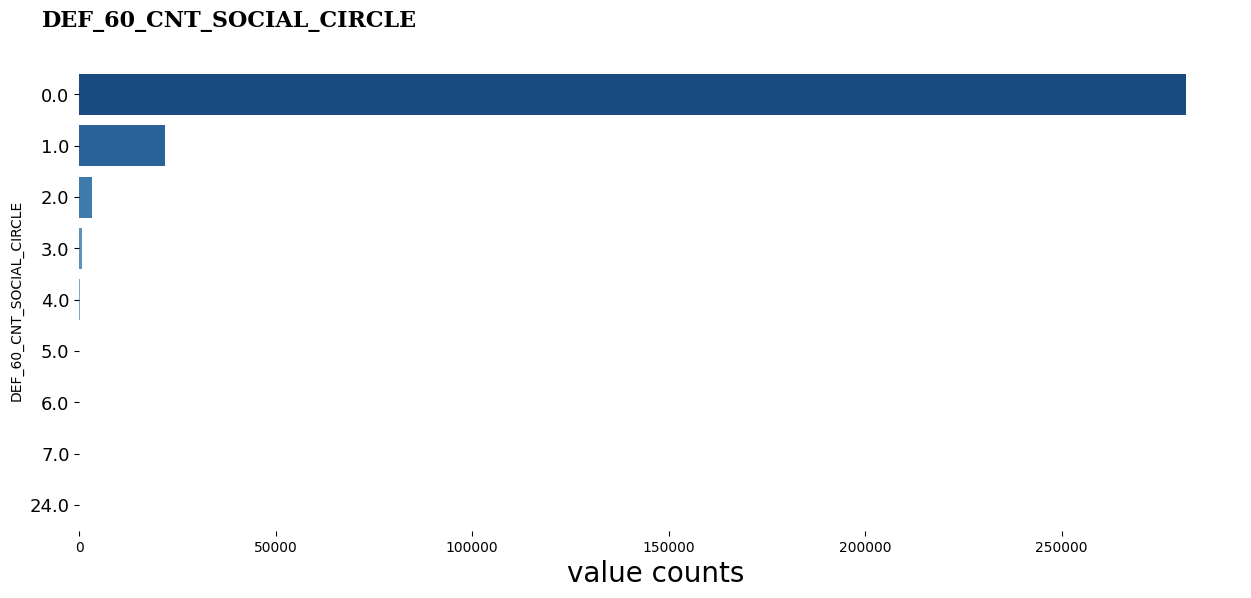

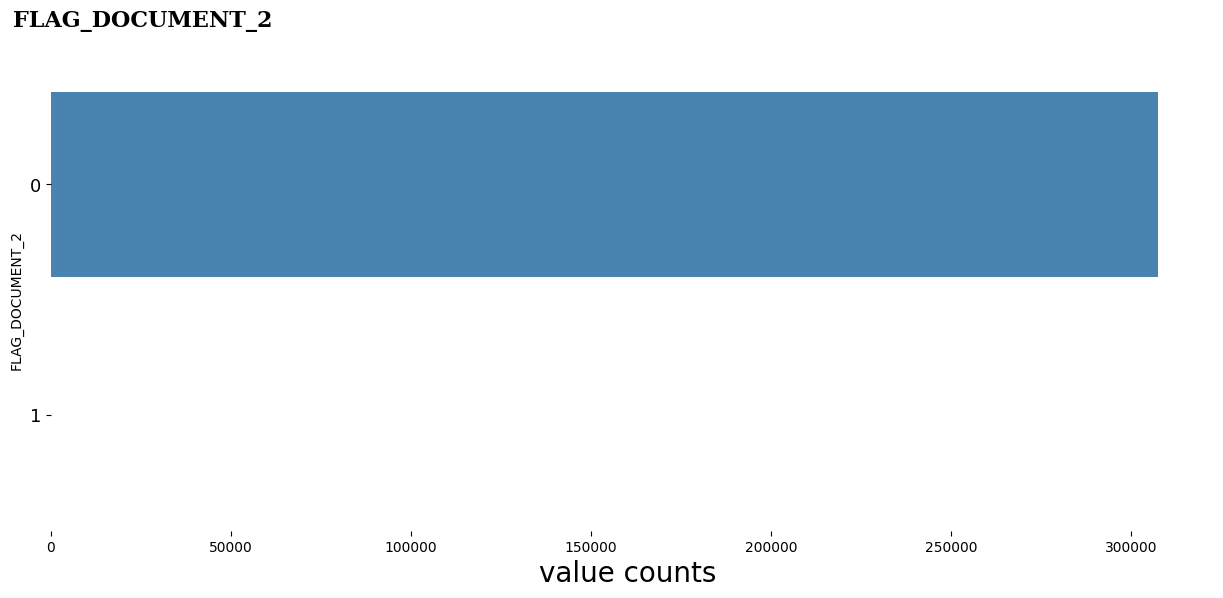

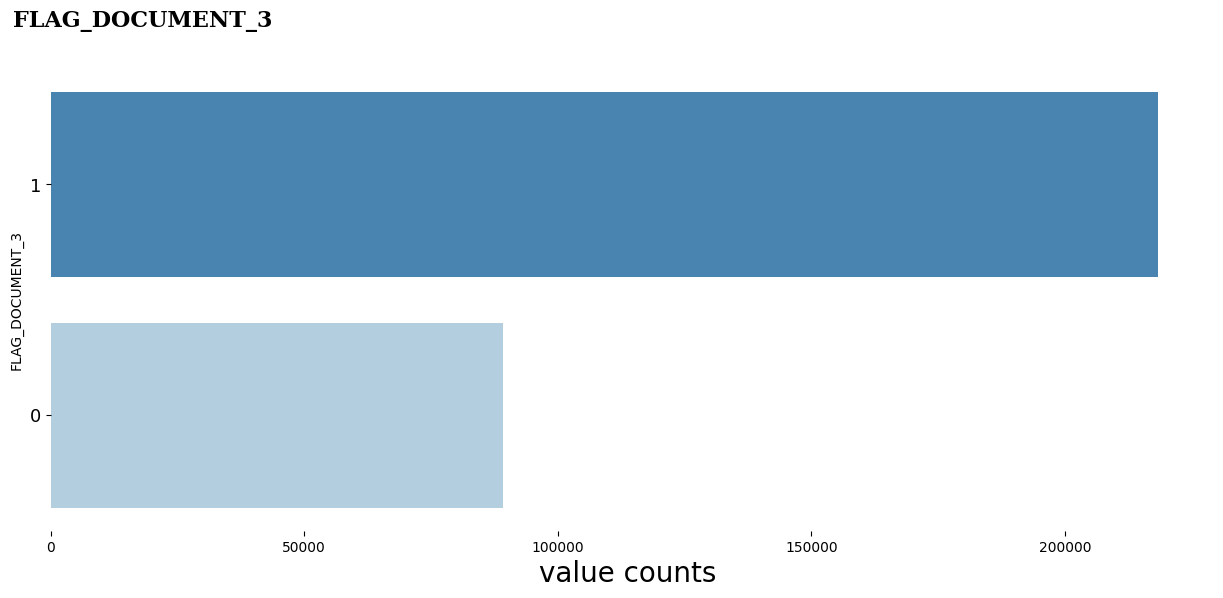

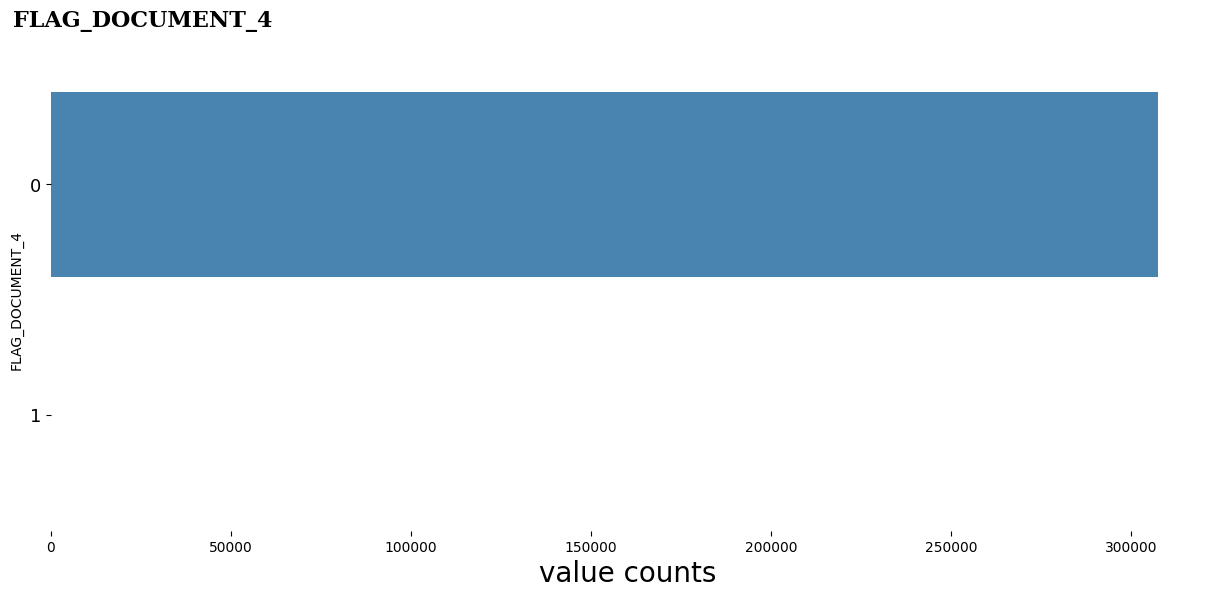

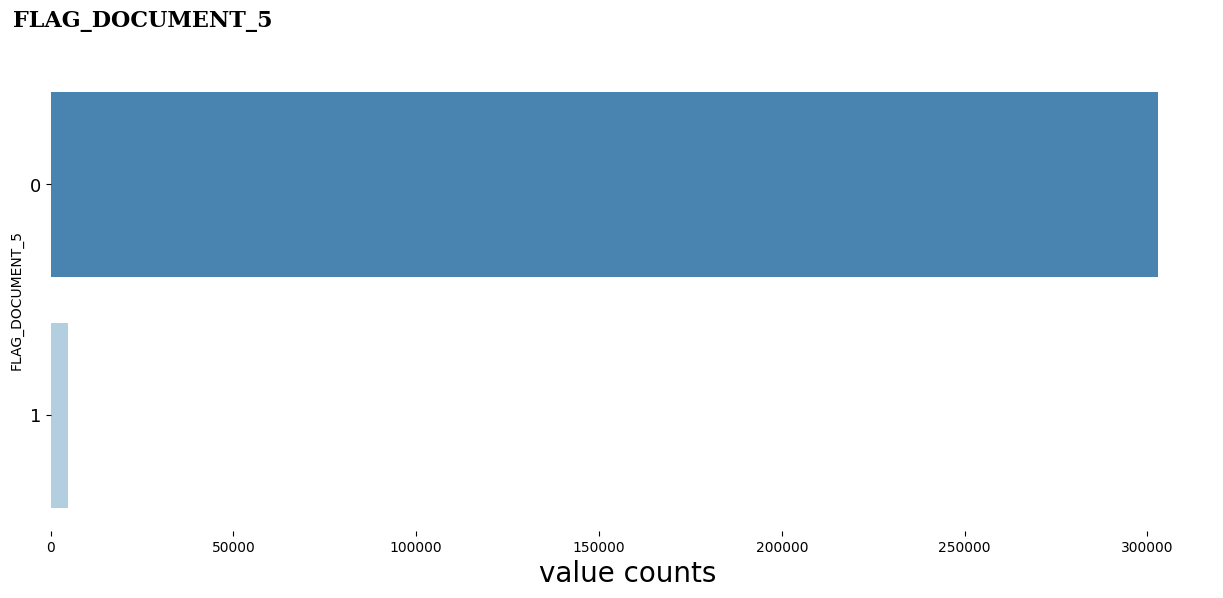

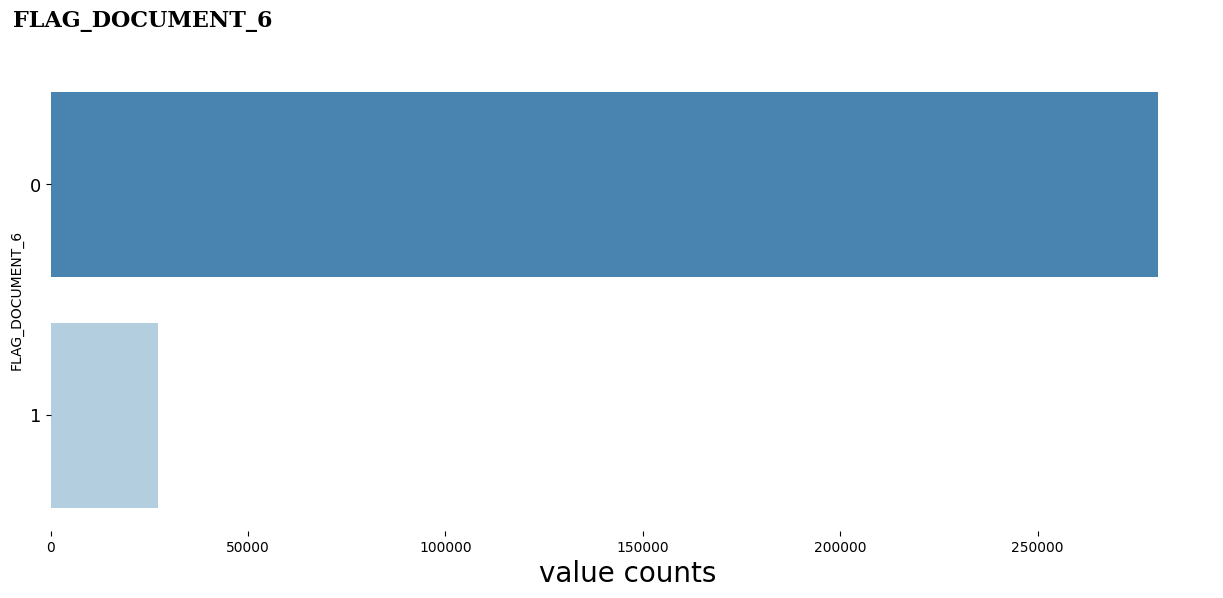

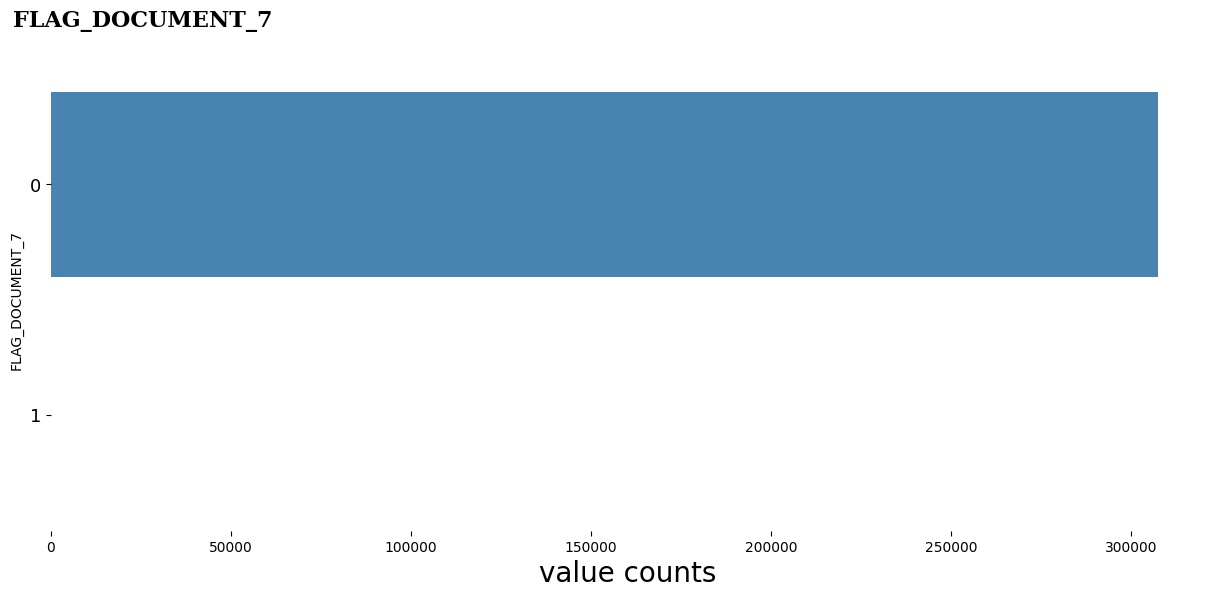

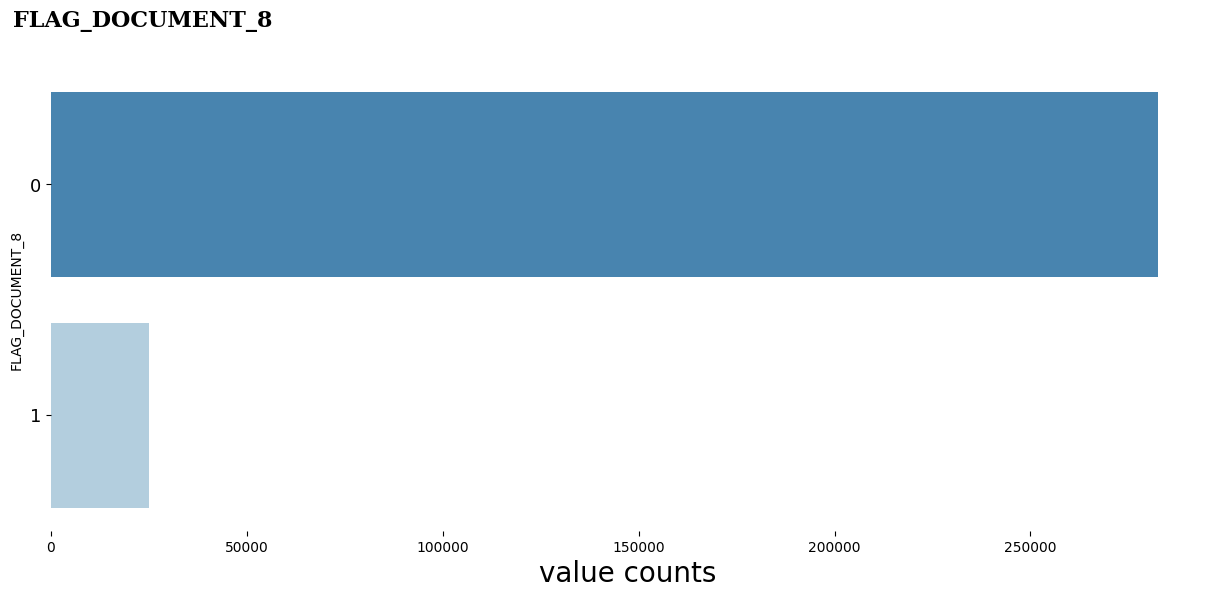

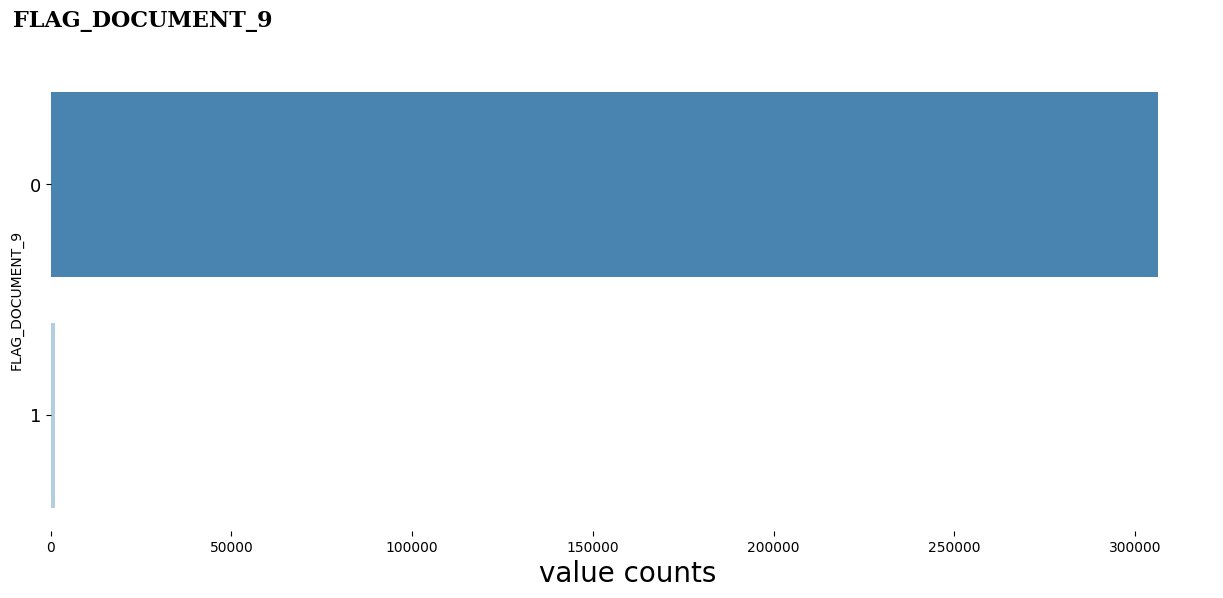

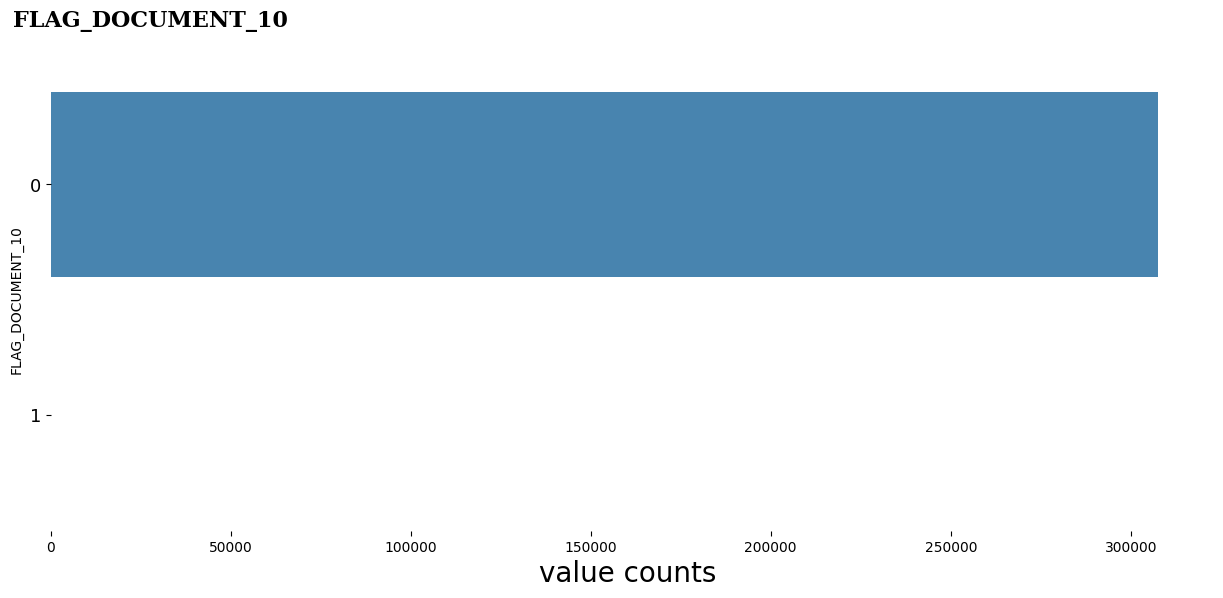

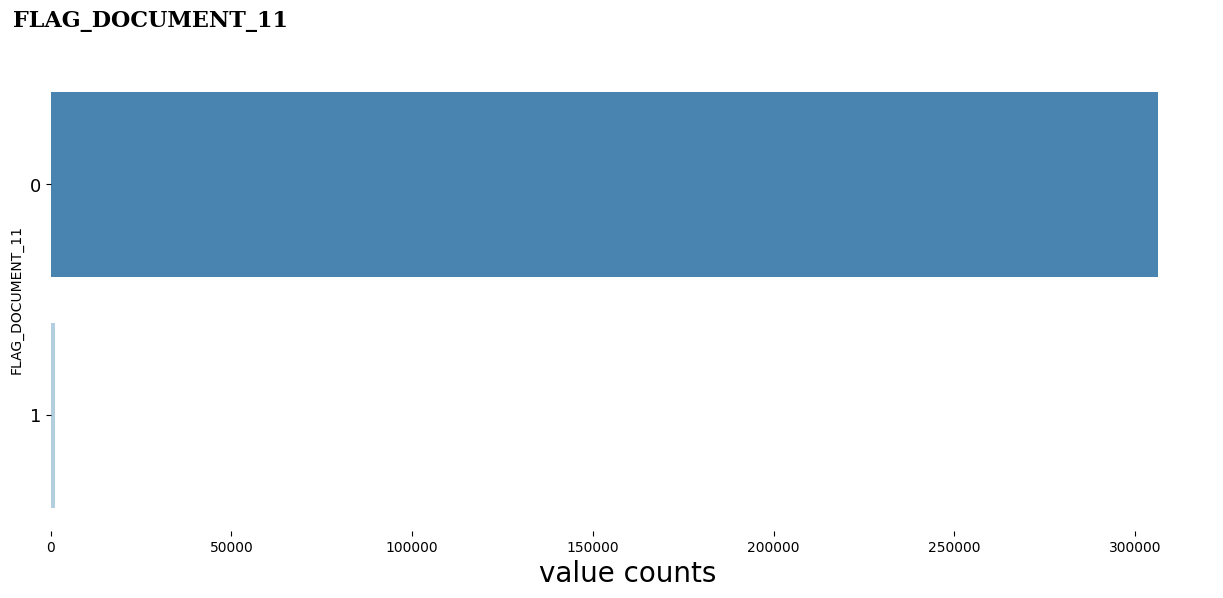

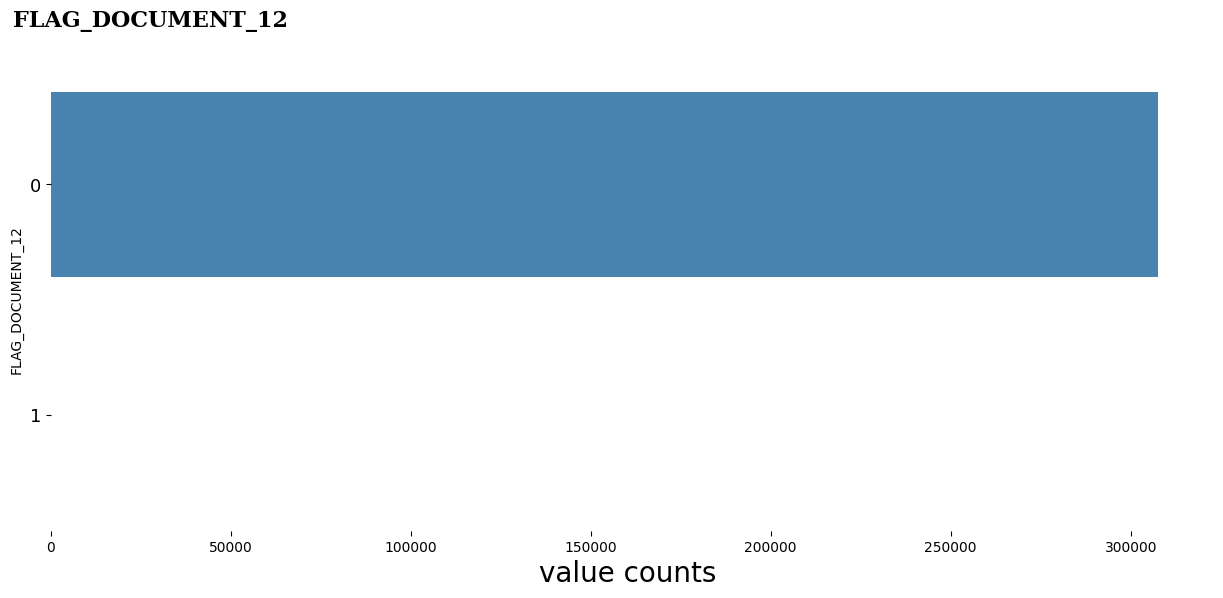

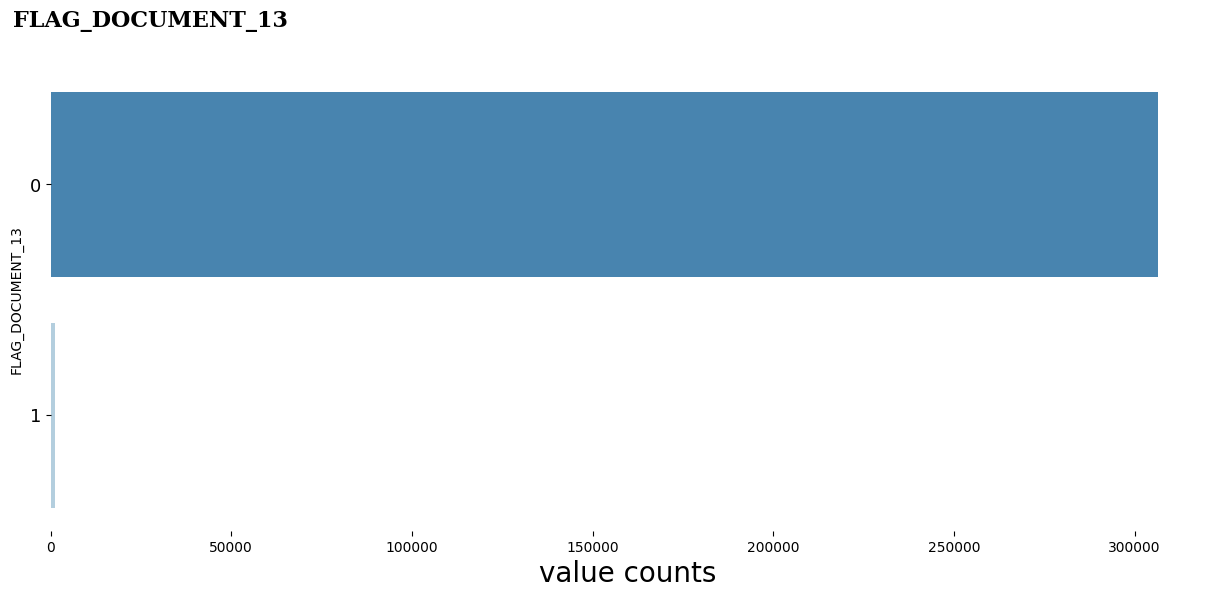

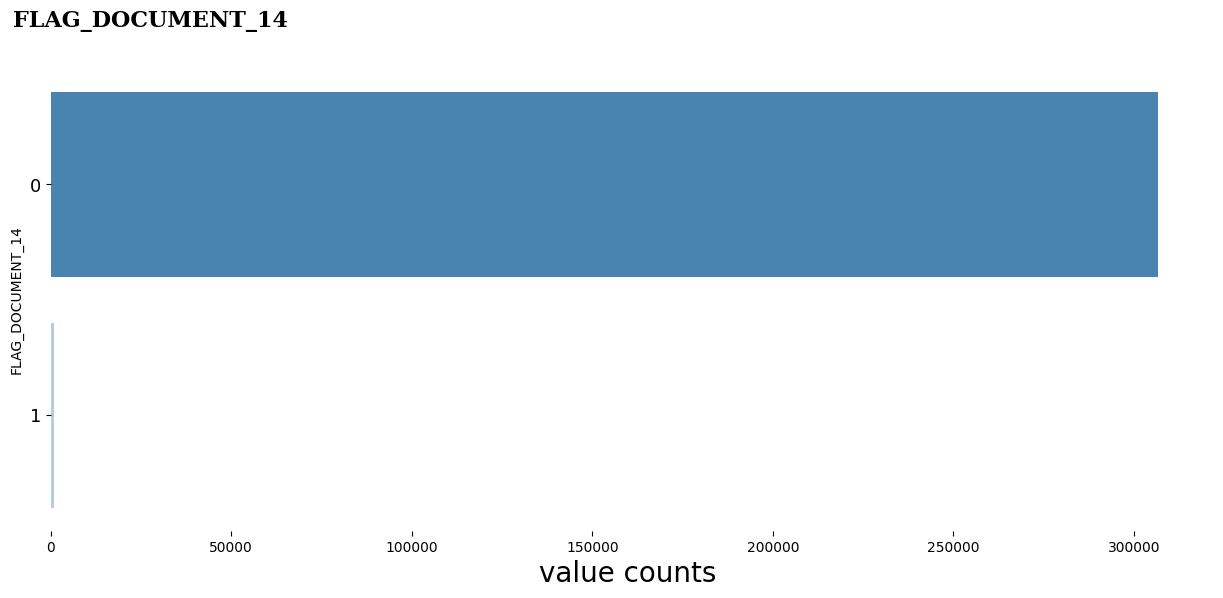

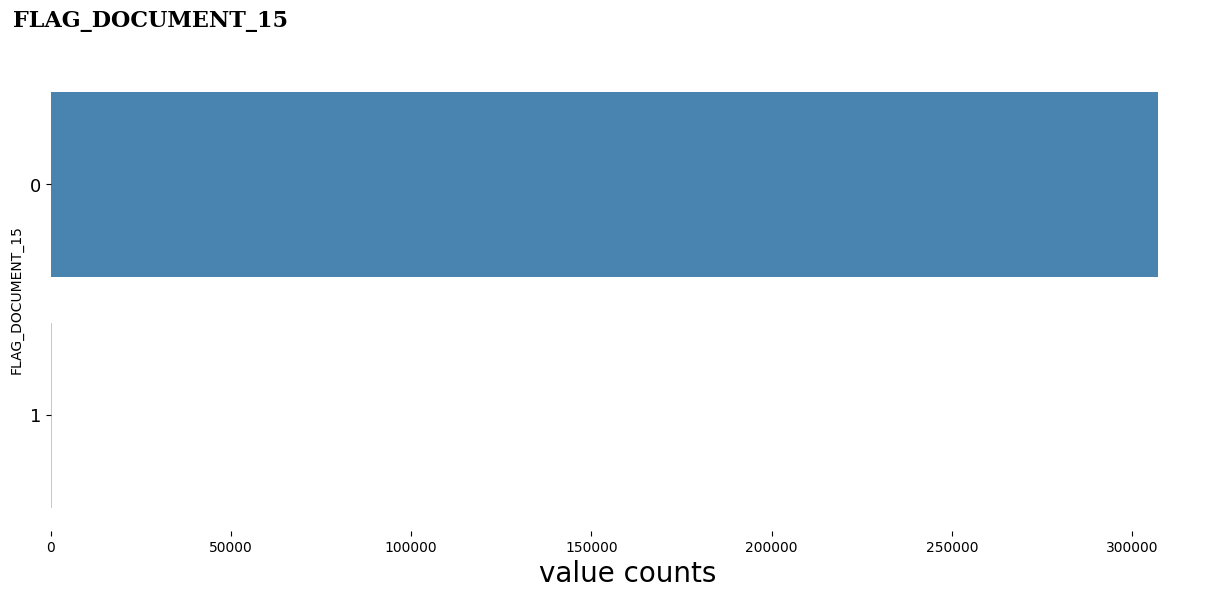

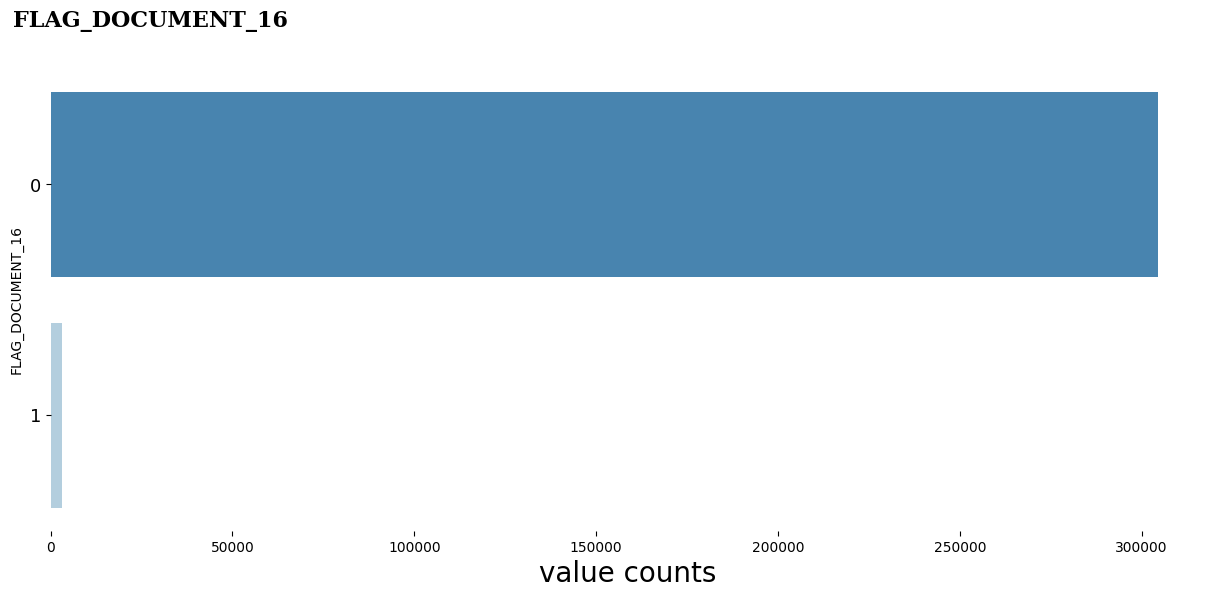

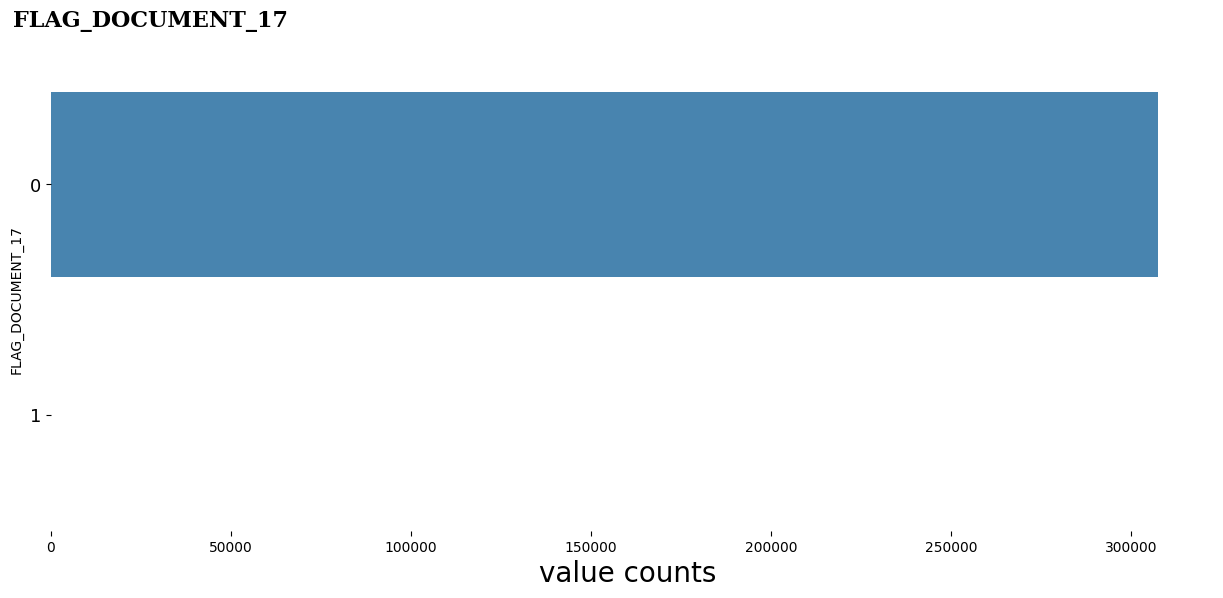

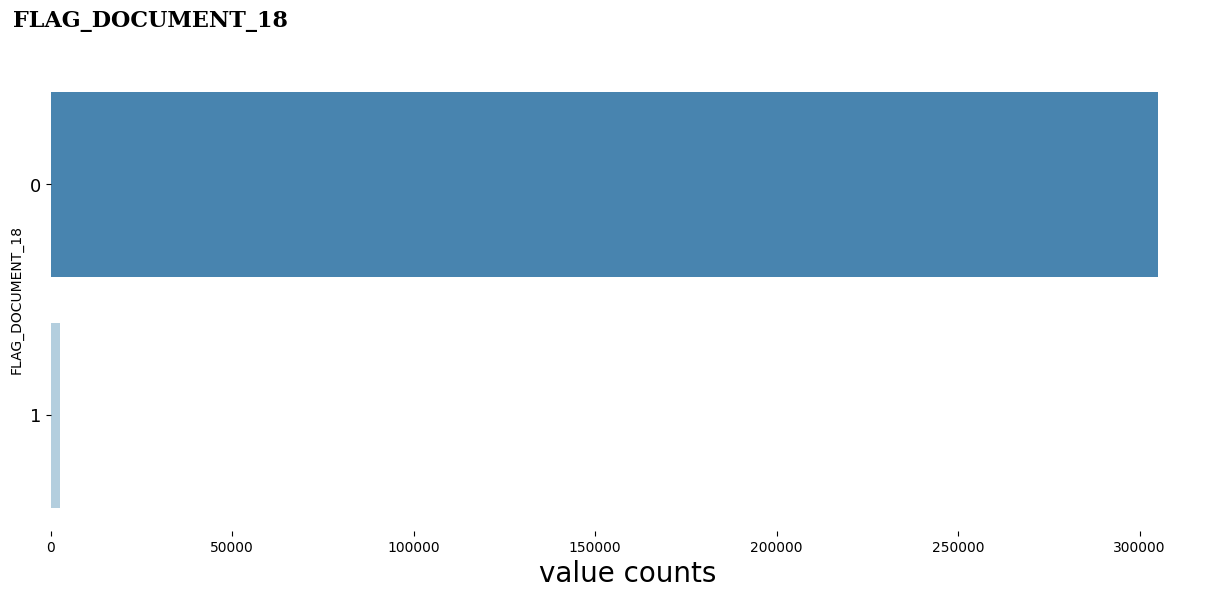

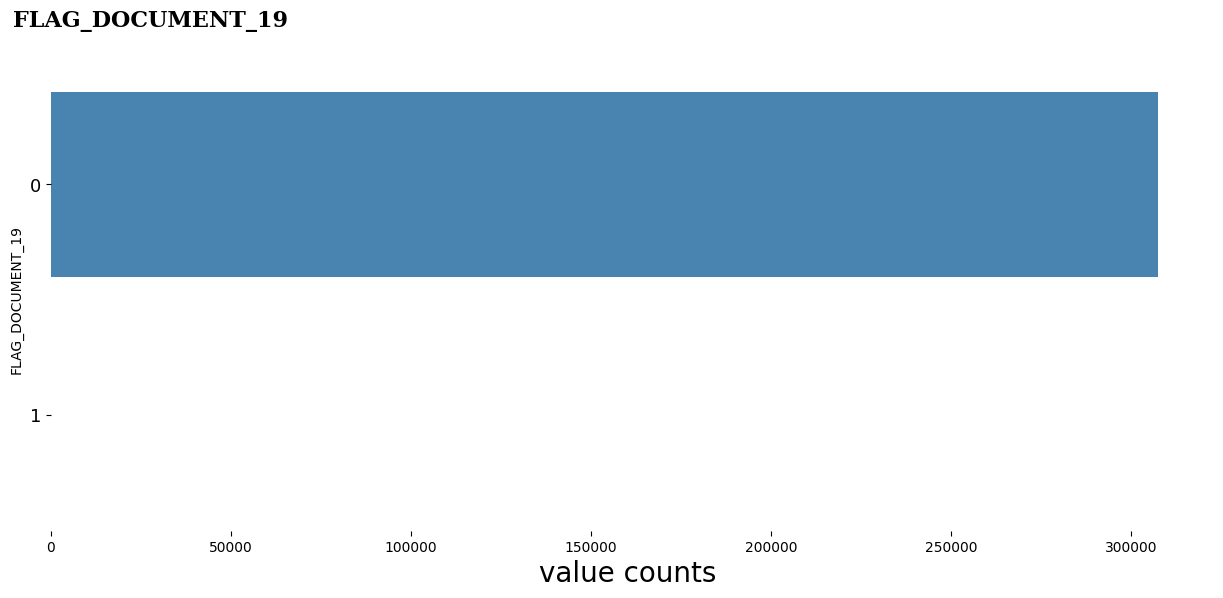

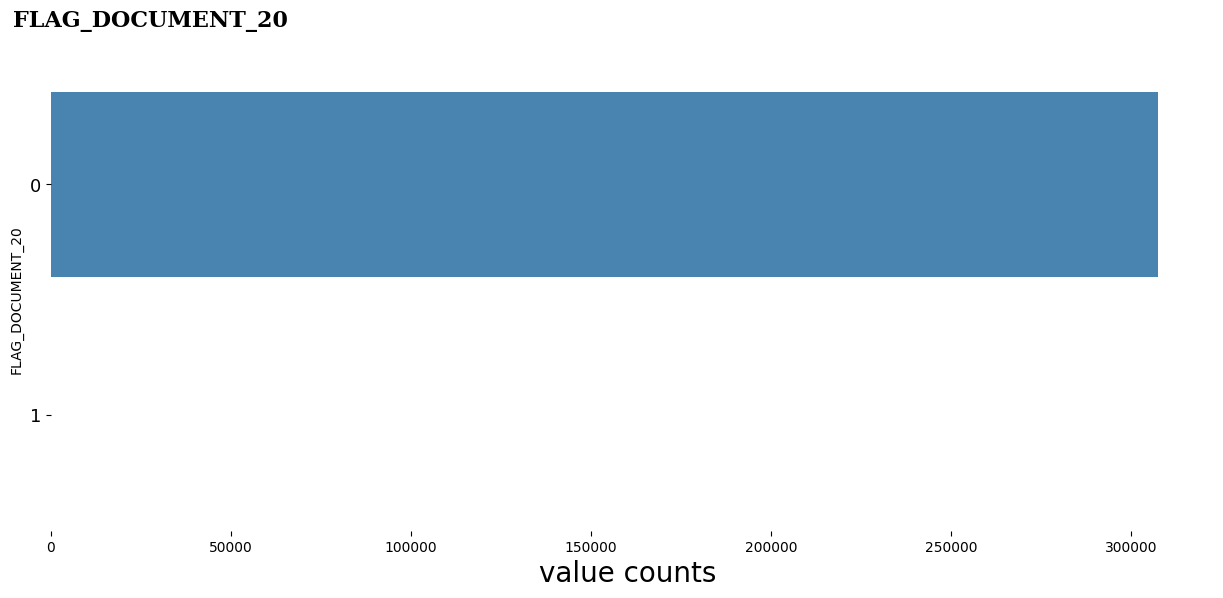

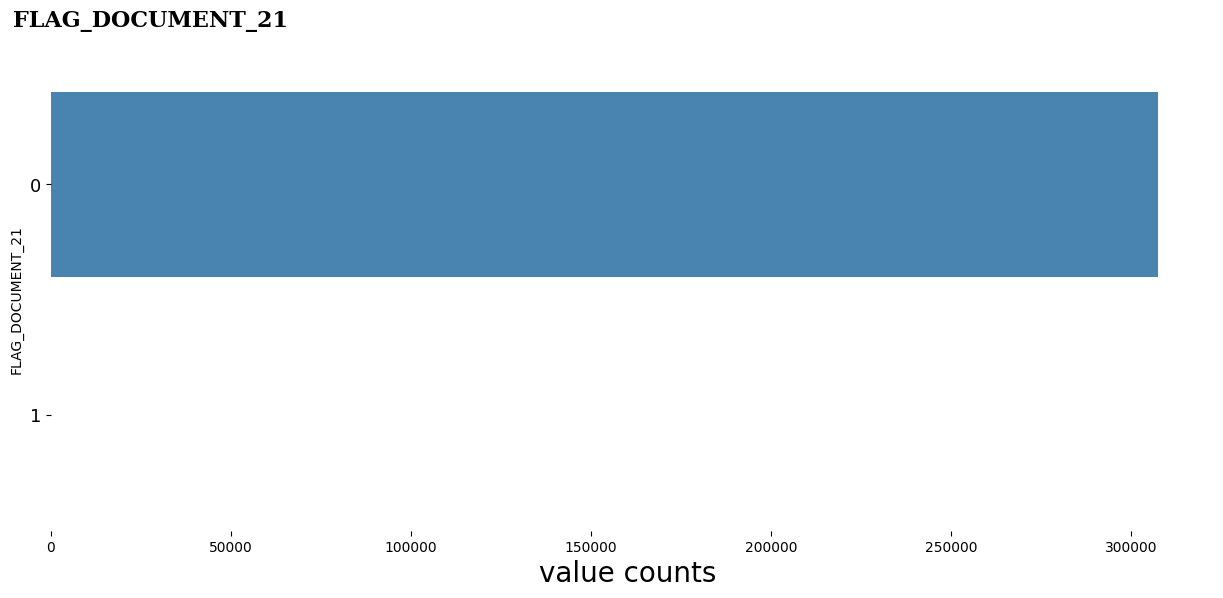

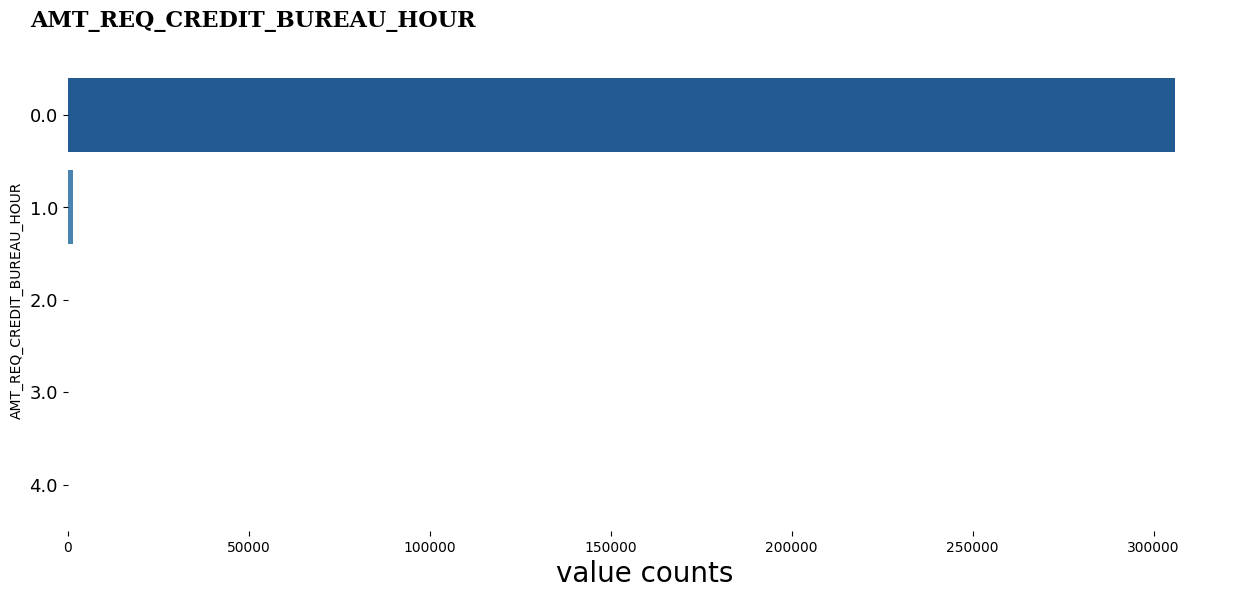

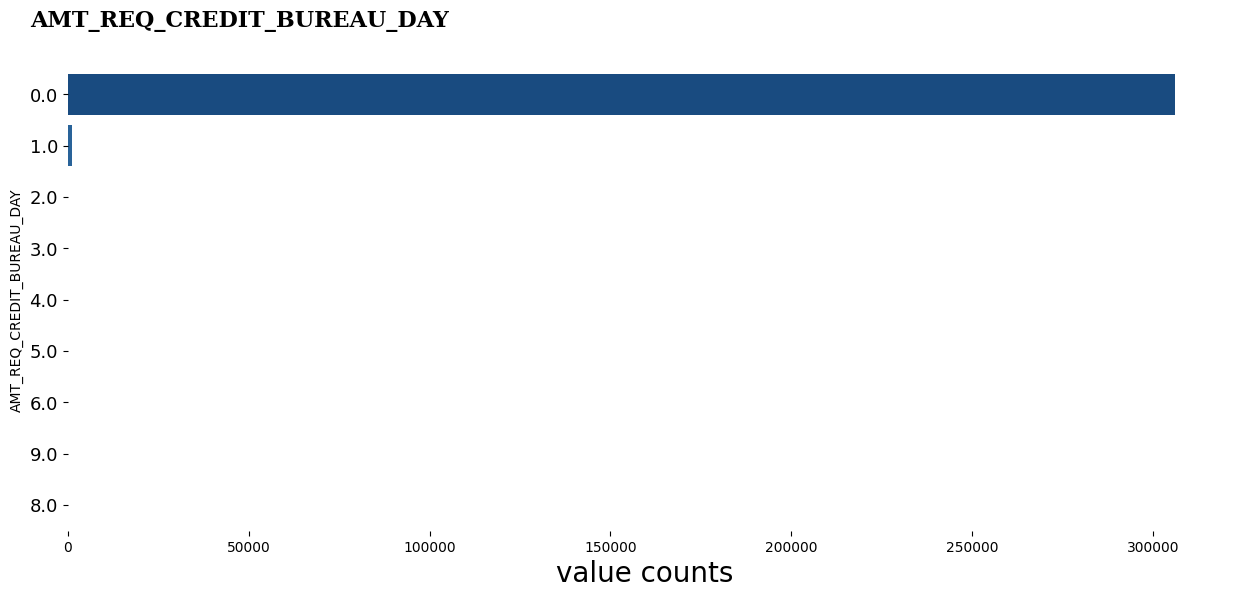

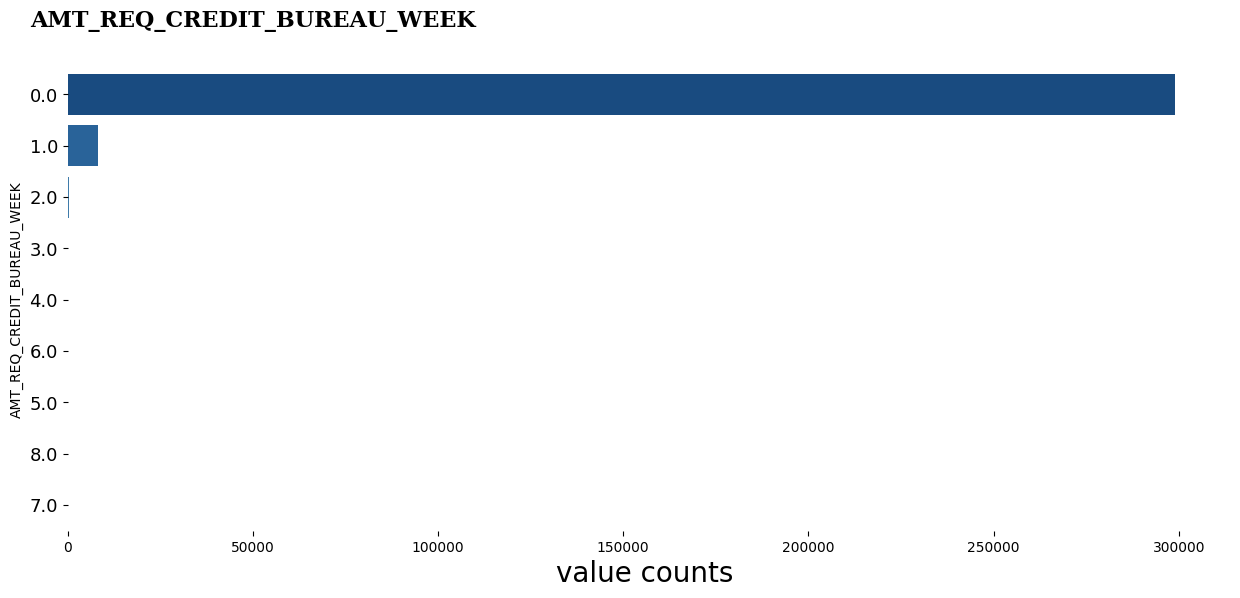

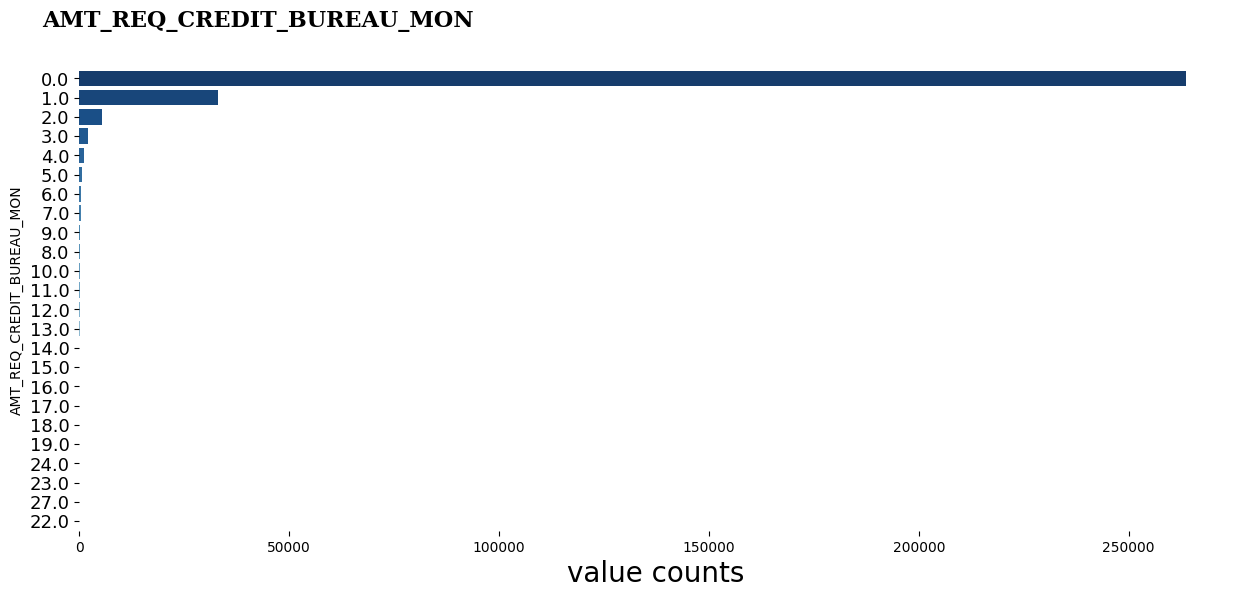

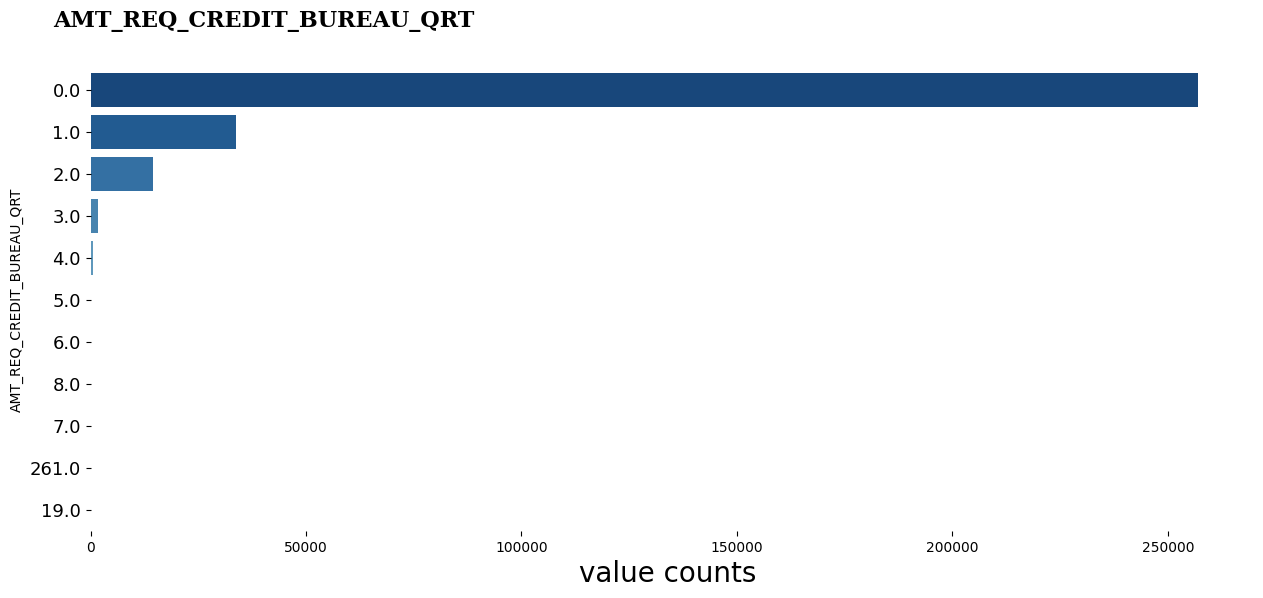

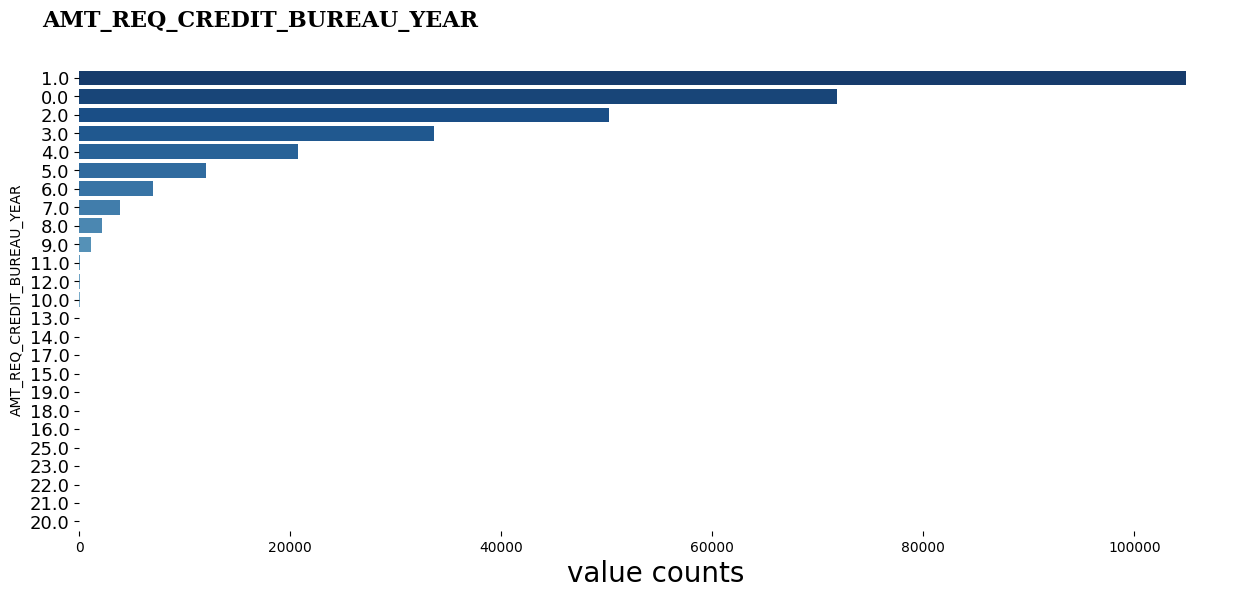

In [29]:
#Impresion de histogramas de columnas con menos de 100 valores únicos
for i in e1:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = app_train[i][1:],data=app_train.iloc[1:], order=app_train[i][1:].value_counts().index, palette='Blues_r')
  fig.text(0.1, 0.95, f'{i}', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel('value counts ', fontsize=20)
  plt.ylabel(f'{i}')
  plt.yticks(fontsize=13)
  plt.box(False)

In [30]:
#Transfomacion de columnas de tipo objeto Df app_test en valores numéricos
l = LabelEncoder()
for q in app_test.describe(include='object').columns:
    app_test[q]=l.fit_transform(app_test[q])
app_test

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100001                   0            0             0   
1          100005                   0            1             0   
2          100013                   0            1             1   
3          100028                   0            0             0   
4          100038                   0            1             1   
...           ...                 ...          ...           ...   
48739      456221                   0            0             0   
48740      456222                   0            0             0   
48741      456223                   0            0             1   
48742      456224                   0            1             0   
48743      456250                   0            0             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    1             0          135000.0    568800.0   
1                    1             0           99000.0    222768.0   
2                    1             0          202500.0    663264.0   
3                    1             2          315000.0   1575000.0   
4                    0             1          180000.0    625500.0   
...                ...           ...               ...         ...   
48739                1             0          121500.0    412560.0   
48740                0             2          157500.0    622413.0   
48741                1             1          202500.0    315000.0   
48742                0             0          225000.0    450000.0   
48743                0             0          135000.0    312768.0   

       AMT_ANNUITY  AMT_GOODS_PRICE  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0          20560.5         450000.0  ...                 0                 0   
1          17370.0         180000.0  ...                 0                 0   
2          69777.0         630000.0  ...                 0                 0   
3          49018.5        1575000.0  ...                 0                 0   
4          32067.0         625500.0  ...                 0                 0   
...            ...              ...  ...               ...               ...   
48739      17473.5         270000.0  ...                 0                 0   
48740      31909.5         495000.0  ...                 0                 0   
48741      33205.5         315000.0  ...                 0                 0   
48742      25128.0         450000.0  ...                 0                 0   
48743      24709.5         270000.0  ...                 0                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                     0                 0                         0.0   
1                     0                 0                         0.0   
2                     0                 0                         0.0   
3                     0                 0                         0.0   
4                     0                 0                         0.0   
...                 ...               ...                         ...   
48739                 0                 0                         0.0   
48740                 0                 0                         0.0   
48741                 0                 0                         0.0   
48742                 0                 0                         0.0   
48743                 0                 0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
48739                        0.0                         0.0   

In [48]:
#Transformacion de las etiquetas categóricas en valores numéricos enteros del DF app_train
categorical_columns = app_train.select_dtypes(include='object').columns.tolist()
l = LabelEncoder()
for p in categorical_columns:
    app_train[p] = l.fit_transform(app_train[p])
app_train

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   0            1             0   
1           100003       0                   0            0             0   
2           100004       0                   1            1             1   
3           100006       0                   0            0             0   
4           100007       0                   0            1             0   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   0            1             0   
307507      456252       0                   0            0             0   
307508      456253       0                   0            0             0   
307509      456254       1                   0            0             0   
307510      456255       0                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                0             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0           24700.5  ...                 0                 0   
1           35698.5  ...                 0                 0   
2            6750.0  ...                 0                 0   
3           29686.5  ...                 0                 0   
4           21865.5  ...                 0                 0   
...             ...  ...               ...               ...   
307506      27558.0  ...                 0                 0   
307507      12001.5  ...                 0                 0   
307508      29979.0  ...                 0                 0   
307509      20205.0  ...                 0                 0   
307510      49117.5  ...                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      0                 0                         0.0   
1                      0                 0                         0.0   
2                      0                 0                         0.0   
3                      0                 0                         0.0   
4                      0                 0                         0.0   
...                  ...               ...                         ...   
307506                 0                 0                         0.0   
307507                 0                 0                         0.0   
307508                 0                 0                         1.0   
307509                 0                 0                         0.0   
307510                 0                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        0.0                         0.0   
307507                        0.0                   

In [50]:
#generacion de nuevos DF en x copiando el DF app_train sin las ccolumnas Target y SK_ID_CURR, y creando un nuevo DF "y" ccon la ccolumna Target
x=app_train.drop(['TARGET','SK_ID_CURR'],axis=1)

print(x)
y=app_train['TARGET']
print(y)

        NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                        0            1             0                1   
1                        0            0             0                0   
2                        1            1             1                1   
3                        0            0             0                1   
4                        0            1             0                1   
...                    ...          ...           ...              ...   
307506                   0            1             0                0   
307507                   0            0             0                1   
307508                   0            0             0                1   
307509                   0            0             0                1   
307510                   0            0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    40

In [34]:
# Entrenamiento en x_train y y_train
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=.30,random_state=1)

In [35]:
x_test=app_test.drop(['SK_ID_CURR'],axis=1)

In [36]:
#Modelo de Regresion Logística
lr = LogisticRegression(max_iter=2500)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_valid)

lr_train_score = lr.score(x_train, y_train)
lr_test_score= lr.score(x_valid, y_valid)


lr_acc = accuracy_score(y_pred_lr,y_valid)

pred_lr=lr.predict(x_test)
print(pred_lr)
print('LogisticRegressionModel Train Score is : ' , lr_train_score)
print('LogisticRegressionModel Test Score is : ' , lr_test_score)
print('LogisticRegressionModel accuracy is : ', lr_acc)

[0 0 0 ... 0 0 0]
LogisticRegressionModel Train Score is :  0.9193522161880915
LogisticRegressionModel Test Score is :  0.9190495805059943
LogisticRegressionModel accuracy is :  0.9190495805059943


In [51]:
#Modelo de árbol de decisión
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_valid)

dt_train_score = dt.score(x_train, y_train)
dt_test_score= dt.score(x_valid, y_valid)


dt_acc = accuracy_score(y_pred_dt,y_valid)


pred_dt=dt.predict(x_test)
print(pred_dt)


print('DecisionTreeClassifier Train Score is : ' , dt_train_score)
print('DecisionTreeClassifier Test Score is : ' , dt_test_score)
print('DecisionTreeClassifier accuracy is : ', dt_acc)

[0 0 1 ... 1 0 0]
DecisionTreeClassifier Train Score is :  1.0
DecisionTreeClassifier Test Score is :  0.8499468857718907
DecisionTreeClassifier accuracy is :  0.8499468857718907


In [52]:
#Modelo RandomForestClassifier
rf= RandomForestClassifier(n_estimators = 200, random_state = 50, verbose = 1, n_jobs = -1)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_valid)

rf_train_score = rf.score(x_train, y_train)
rf_test_score= rf.score(x_valid, y_valid)


rf_acc = accuracy_score(y_pred_rf,y_valid)


pred_rf=rf.predict(x_test)
print(pred_rf)


print('RandomForestClassifier Train Score is : ' , rf_train_score)
print('RandomForestClassifier Test Score is : ' , rf_test_score)
print('RandomForestClassifier accuracy is : ', rf_acc)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    9.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    9.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   19.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   19.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.2s
[Parallel(n_jobs=2)]: Done 196 tasks   

[0 0 0 ... 0 0 0]
RandomForestClassifier Train Score is :  1.0
RandomForestClassifier Test Score is :  0.91919049580506
RandomForestClassifier accuracy is :  0.91919049580506


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    3.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.3s finished


In [54]:
#Comparacion de Modelos
modelos = ['LogisticRegression'  , 'DecisionTree','RandomForest']
modelos_data = [lr_acc  , dt_acc, rf_acc ]
cols = ["accuracy_score"]
compara=pd.DataFrame(data=model_data , index= models , columns= cols)
compara.sort_values(ascending= False , by = ['accuracy_score'])

accuracy_score
RandomForest              0.919190
LogisticRegression        0.919050
DecisionTree              0.849947

In [40]:
fig=px.bar(compare, x=models, y="accuracy_score")
fig.update_layout(
    template="plotly_dark")

In [61]:
Prediccion  = pd.DataFrame({ 'SK_ID_CURR': app_test['SK_ID_CURR'],
                            'TARGET': pred_rf })
Prediccion.to_csv("Prediccion.csv", index=False)

In [62]:
Prediccion

SK_ID_CURR  TARGET
0          100001       0
1          100005       0
2          100013       0
3          100028       0
4          100038       0
...           ...     ...
48739      456221       0
48740      456222       0
48741      456223       0
48742      456224       0
48743      456250       0

[48744 rows x 2 columns]